## Problema a Ser Resolvido:
A CerreiraFosta Ltda. precisa de sua ajuda para entender os fatores que influenciam o sucesso das vendas e identificar oportunidades de melhoria.




Neste notebook, realizaremos a **Análise Exploratória de Dados (EDA)** deste projeto, com o objetivo de extrair insights relevantes solicitados pela CerreiraFosta Ltda.

## Importando as Bibliotecas

In [1]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando a Base de Dados que será utilizada

base = pd.read_csv('/content/drive/MyDrive/PTA - IDFin 2024.2/bases + colab/base_dados_final.csv')

<ipython-input-3-2a05b8027501>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  base = pd.read_csv('/content/drive/MyDrive/PTA - IDFin 2024.2/bases + colab/base_dados_final.csv')


### Dicionário dos Dados


---

- **Store:** um ID exclusivo para cada loja;
- **DayOfWeek:** Dia da semana (1 = segunda-feira, 7 = domingo);
- **Sales:** Total de vendas realizadas na loja nesse dia;
- **Customers:** Número de clientes que visitaram a loja nesse dia;
- **Open:** Indicador se a loja estava aberta (1 = aberta, 0 = fechada);
- **Promo:** Indicador se havia uma promoção naquele dia (1 = sim, 0 = não);
- **StateHoliday:** Indicador de feriado estadual (a = feriado, b = feriado de Páscoa, c = Natal, 0 = Nenhum);
- **SchoolHoliday:** Indicador de feriado escolar (1 = feriado escolar, 0 = não feriado escolar).
- **StoreType:** diferencia entre 4 modelos de loja diferentes: a, b, c, d;
- **Assortment:** descreve um nível de sortimento: a = básico, b = extra, c = estendido;
- **CompetitionDistance:** distância em metros até a loja concorrente mais próxima;
- **CompetitionOpenSince[Month/Year]:** fornece o ano e o mês aproximados da abertura do concorrente mais próximo;
- **Promo2:** Promo2 é uma promoção contínua e consecutiva para algumas lojas: 0 = loja não está participando, 1 = loja está participando;
- **Promo2Since[Year/Week]:** descreve o ano e a semana do calendário em que a loja começou a participar do Promo2;
- **PromoInterval:** descreve os intervalos consecutivos em que o Promo2 é iniciado, nomeando os meses em que a promoção é iniciada novamente. Por exemplo, "fev, mai, ago, nov" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para aquela loja.
- **Year**: fornece o ano da data da venda
- **Month**: fornece o mês da data da venda
- **Day**: fornece o dia da data da venda


---

## Análise Exploratória dos Dados

Agora, iniciaremos a análise exploratória dos dados, dividindo o processo em etapas. A primeira será dedicada a uma visão geral do case, buscando identificar insights iniciais. As demais etapas focarão em aspectos mais específicos, como o impacto dos produtos, as particularidades das empresas e o perfil dos clientes. Ao final de cada seção, utilizaremos gráficos para aprofundar a compreensão do case e extrair informações adicionais.

In [ ]:
# Analisando o tamanho da tabela
base.shape


(1017209, 22)

In [ ]:
# Verificando a base de dados

base.head()

Unnamed: 0  Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           0      1          5  2015-07-31   5263        555     1      1   
1           1      2          5  2015-07-31   6064        625     1      1   
2           2      3          5  2015-07-31   8314        821     1      1   
3           3      4          5  2015-07-31  13995       1498     1      1   
4           4      5          5  2015-07-31   4822        559     1      1   

  StateHoliday  SchoolHoliday  ... CompetitionDistance  \
0            0              1  ...              1270.0   
1            0              1  ...               570.0   
2            0              1  ...             14130.0   
3            0              1  ...               620.0   
4            0              1  ...             29910.0   

  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                       9.0                    2008.0       0   
1                      11.0                    2007.0       1   
2                      12.0                    2006.0       1   
3                       9.0                    2009.0       0   
4                       4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year Month  Day  
0              NaN              NaN              NaN  2015     7   31  
1             13.0           2010.0  Jan,Apr,Jul,Oct  2015     7   31  
2             14.0           2011.0  Jan,Apr,Jul,Oct  2015     7   31  
3              NaN              NaN              NaN  2015     7   31  
4              NaN              NaN              NaN  2015     7   31  

[5 rows x 22 columns]

In [ ]:
# Excluindo a coluna desnecessária: "Unnamed:0"

base = base.drop(base.columns[0], axis=1)

In [ ]:
# Conferindo a exclusão

base.head(1)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   

   SchoolHoliday StoreType  ... CompetitionDistance  \
0              1         c  ...              1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  Year  Month  Day  
0              NaN              NaN            NaN  2015      7   31  

[1 rows x 21 columns]

In [ ]:
# Verificando dados duplicados

base.duplicated().sum()

0

In [ ]:
# Verificando informações da base

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  int64  
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1014567 non-null  float64
 13  CompetitionO

In [ ]:
# Analisando estatísticas gerais da base

base.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.014567e+06   
mean   3.815145e-01   1.786467e-01         5.430086e+03   
std    4.857586e-01   3.830564e-01         7.715324e+03   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         7.100000e+02   
50%    0.000000e+00   0.000000e+00         2.330000e+03   
75%    1.000000e+00   0.000000e+00         6.890000e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear        Promo2  \
count              693861.000000             693861.000000  1.017209e+06   
mean                    7.222866               2008.690228  5.005638e-01   
std                     3.211832                  5.992644  4.999999e-01   
min                     1.000000               1900.000000  0.000000e+00   
25%                     4.000000               2006.000000  0.000000e+00   
50%                     8.000000               2010.000000  1.000000e+00   
75%                    10.000000               2013.000000  1.000000e+00   
max                    12.000000               2015.000000  1.000000e+00   

       Promo2SinceWeek  Promo2SinceYear          Year         Month  \
count    509178.000000    509178.000000  1.017209e+06  1.017209e+06   
mean         23.269093      2011.752774  2.013832e+03  5.846762e+00   
std          14.095973         1.662870  7.773960e-01  3.326097e+00   
min           1.000000      2009.000000  2.013000e+03  1.000000e+00   
25%          13.000000      2011.000000  2.013000e+03  3.000000e+00   
50%          22.000000      2012.000000  2.014000e+03  6.000000e+00   
75%          37.000000      2013.000000  2.014000e+03  8.000000e+00   
max          50.000000      2015.000000  2.015000e+03  1.200000e+01   

                Day  
count  1.017209e+06  
mean   1.570279e+01  
std    8.787638e+00  
min    1.000000e+00  
25%    8.000000e+00  
50%    1.600000e+01  
75%    2.300000e+01  
max    3.100000e+01

In [ ]:
# Teste para análise dos dados nulos
missing_data = base.isnull().sum()
missing_data

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Day                               0
dtype: int64

## Análise das Variáveis Numéricas

### Matriz de Correlação

Podemos criar uma matriz de correlação para identificar a relação entre as variáveis numéricas do conjunto de dados. Essa matriz nos permite visualizar como as variáveis estão associadas entre si, utilizando valores que variam entre -1 e 1:



1.   **Correlação positiva** (próxima de 1): Indica que, à medida que uma variável aumenta, a outra tende a aumentar também.
2.   **Correlação negativa** (próxima de -1): Indica que, à medida que uma variável aumenta, a outra tende a diminuir.
3.   **Correlação próxima de 0**: Sinaliza pouca ou nenhuma relação linear entre as variáveis.


A matriz é especialmente útil para **identificar padrões, colinearidades ou possíveis redundâncias entre variáveis**
, o que pode ajudar na seleção de features para a interpretação dos dados.

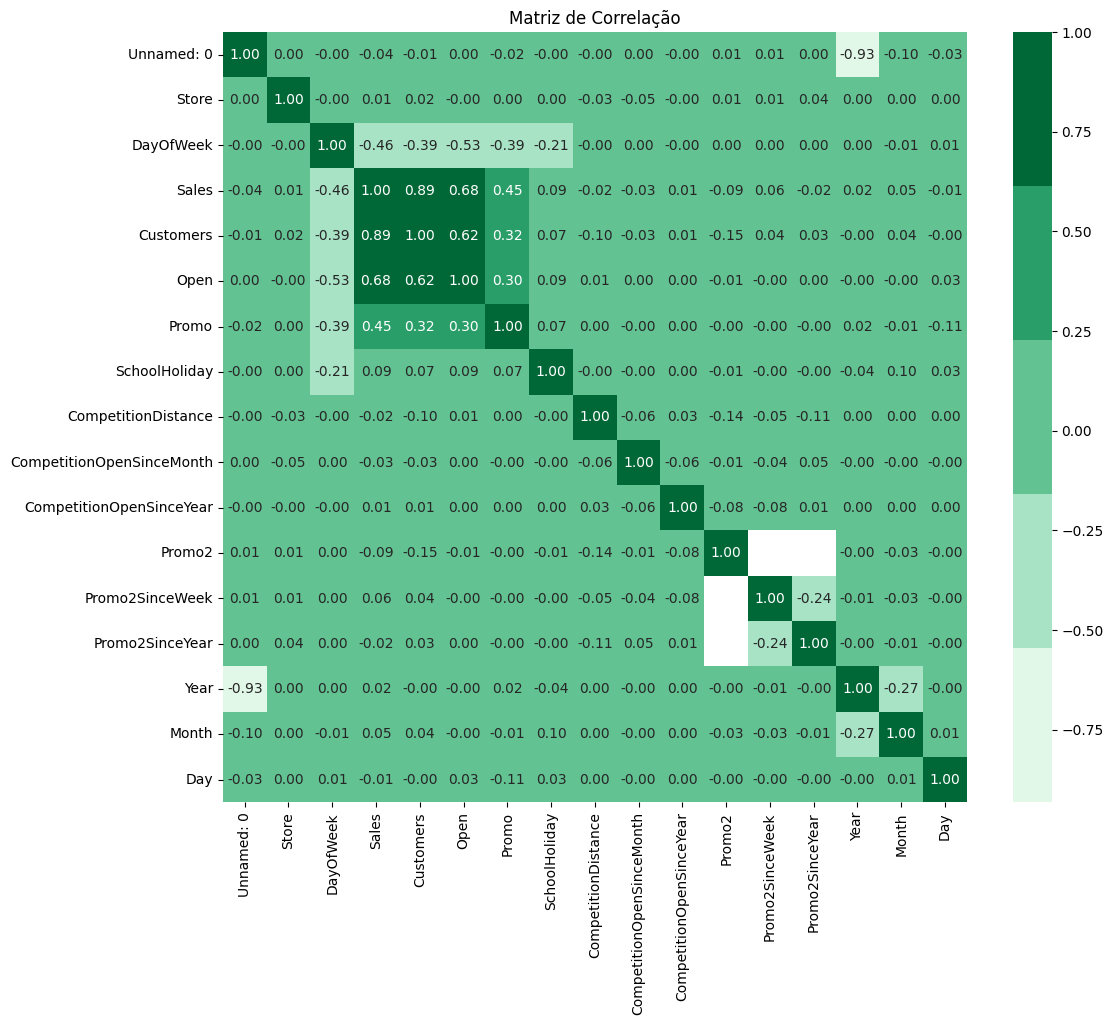

In [ ]:
# Seleciona apenas colunas numéricas
base_numeric = base.select_dtypes(include='number')

# Calculando a matriz de correlação
correlation_matrix = base_numeric.corr()

# Selecionando uma nova paleta de cores em tons de verde com maior contraste
cmap = sns.color_palette([
    "#e1f7e7",  # Cor 1
    "#a8e3c6",  # Cor 2
    "#62c292",  # Cor 3
    "#2a9e69",  # Cor 4
    "#006837"   # Cor 5
], as_cmap=True)

# Exibe a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, cbar=True)
plt.title("Matriz de Correlação")
plt.show()

#### Observações sobre a matriz de correlação exibida:

**Correlações Positivas**

1. `Sales` e `Customers` (0.89):
  - **Relação muito forte**: Quanto mais clientes, maiores as vendas. Faz sentido, já que o número de clientes diretamente impacta o volume de vendas.

2. `Open` e `Sales` (0.68):

  - **Relação forte**: Estar aberto aumenta as vendas (intuitivo, já que as lojas fechadas não vendem).

3. `Promo` e `Sales` (0.45):
  - **Correlação moderada**: Promoções aumentam as vendas, o que reflete o efeito esperado de campanhas promocionais.

4. `Promo` e `Customers` (0.32):
  - **Correlação moderada**: Promoções também atraem mais clientes.


**Correlações Negativas**

1. `DayOfWeek` e `Sales` (-0.46):

  - **Relação moderada negativa**: Dias específicos da semana têm vendas menores.
Isso sugere que dias úteis ou horários podem afetar negativamente o volume de vendas.

2. `DayOfWeek` e `Customers` (-0.39):

  - **Correlação moderada negativa**: Certos dias da semana atraem menos clientes. Pode estar relacionado ao comportamento do consumidor em dias úteis ou finais de semana.

3. `DayOfWeek` e `Open` (-0.53):
  - **Relação moderada negativa**: Certos dias da semana têm maior probabilidade de as lojas estarem fechadas, impactando negativamente as operações e, indiretamente, as vendas. Isso pode refletir estratégias para reduzir custos em dias de menor movimento.

### **Variável 'Sales' - Correlação de moderada a alta**

Primeiro, vamos analisar as variáveis que tem correlação de moderada a alta.

#### Verificando a presença de outliers




In [ ]:
# Criando o gráfico de boxplot na horizontal, com as lojas ordenadas
fig = px.box(base, x='Customers', y='StoreType',
             title="Distribuição de Clientes por Tipo de Loja",
             labels={"Customers": "Número de Clientes", "StoreType": "Tipo de Loja"},
             color='StoreType', color_discrete_sequence=["#62c292", "#31bc6a", "#009648", "#004f17"],
             category_orders={"StoreType": ['a', 'b', 'c', 'd']})  # Definindo a ordem das lojas

# Exibindo o gráfico
fig.show()

Observamos a presença de outliers na variável "Customers". Para entender melhor o impacto desses valores extremos, vamos verificar a média e a mediana dessa variável considerando os outliers.

In [ ]:
mediana_clientes = base['Customers'].median()
media_clientes = base['Customers'].mean()

print(f"Mediana de Clientes: {mediana_clientes}")
print(f"Média de Clientes: {media_clientes.round(2)}")

Mediana de Clientes: 609.0
Média de Clientes: 633.15


Agora, vamos ver a porcentagem de outliers nessa coluna e removê-los para analisar a média e a mediana após essa ação.

In [ ]:
# Calcular o primeiro e o terceiro quartil (Q1 e Q3)
Q1 = base['Customers'].quantile(0.25)
Q3 = base['Customers'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir os limites para os outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover os outliers
base_no_outliers = base[(base['Customers'] >= lower_bound) & (base['Customers'] <= upper_bound)]

# Calcular a média e a mediana após a remoção dos outliers
mean_customers_no_outliers = base_no_outliers['Customers'].mean()
median_customers_no_outliers = base_no_outliers['Customers'].median()

# Mostrar a média e a mediana
print(f"Mediana de Clientes após remoção dos outliers: {median_customers_no_outliers}")
print(f"Média de Clientes após remoção dos outliers: {mean_customers_no_outliers.round(2)}")

Observamos que a presença de outliers não causa uma alteração significativa nem na média nem na mediana dos valores de "Customers". Contudo, a mediana apresenta uma mudança mais leve, com valores consideravelmente menores. Dado que a mediana é menos sensível a valores extremos, é recomendável utilizá-la para análise, pois ela reflete de maneira mais robusta o comportamento central da variável, sem ser distorcida pelos outliers.

**Agora, vamos verificar os outliers da variável "Sales"**

In [ ]:
# Criando o gráfico de boxplot
fig = px.box(base, x='Sales', y='StoreType',
             title="Distribuição de Vendas por Tipo de Loja",
             labels={"Sales": "Vendas", "StoreType": "Tipo de Loja"},
             color='StoreType', color_discrete_sequence=["#62c292", "#31bc6a", "#009648", "#004f17"],
             category_orders={"StoreType": ['a', 'b', 'c', 'd']})  # Definindo a ordem das lojas

# Exibindo o gráfico
fig.show()

Identificamos a presença de outliers também na variável "Sales". Para avaliar como esses valores extremos influenciam a distribuição, vamos examinar a média e a mediana da variável, incluindo os outliers.

In [ ]:
mediana_vendas = base['Sales'].median()
media_vendas = base['Sales'].mean()

print(f"Mediana de Vendas: {mediana_vendas}")
print(f"Média de Vendas: {media_vendas.round(2)}")

Agora, vamos remover os outliers da variável e realizar uma nova análise para observar como essa exclusão impacta a distribuição dos dados.

In [ ]:
# Calcular o primeiro e o terceiro quartil (Q1 e Q3)
Q1 = base['Sales'].quantile(0.25)
Q3 = base['Sales'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir os limites para os outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover os outliers
base_no_outliers_sales = base[(base['Sales'] >= lower_bound) & (base['Sales'] <= upper_bound)]

# Calcular a média e a mediana após a remoção dos outliers
mean_sales_no_outliers = base_no_outliers['Sales'].mean()
median_sales_no_outliers = base_no_outliers['Sales'].median()

# Mostrar a média e a mediana
print(f"Mediana de Vendas após remoção dos outliers: {median_sales_no_outliers}")
print(f"Média de Vendas após remoção dos outliers: {mean_sales_no_outliers.round(2)}")


Observamos que a presença de outliers não gera uma alteração significativa na média nem na mediana dos valores de "Sales". No entanto, a mediana altera valores consideravelmente menores. Como oberservado, a mediana é menos sensível aos valores extremos, então é recomendável utilizá-la na análise, pois ela representa de maneira mais robusta o comportamento central da variável, sem ser influenciada pelos outliers.


---



A partir das análises realizadas, vamos agora focar nas variáveis que apresentam correlação moderada a forte, tanto positiva quanto negativa. Essas correlações são essenciais para entender como diferentes fatores estão inter-relacionados e como podem influenciar o desempenho da empresa.

#### Vendas x Clientes

Podemos analisar a relação vendas x clientes com o filtro de lojas.

In [ ]:

data = base.copy()

# Lista dos tipos de loja únicos na base
tipos_de_loja = data['StoreType'].dropna().unique()

# Dicionário de cores para cada tipo de loja
cores = {
    'a': 'blue',
    'b': 'green',
    'c': 'red',
    'd': 'orange'
}

# Criando gráficos individuais para cada tipo de loja
for tipo in sorted(tipos_de_loja):
    loja_data = data[data['StoreType'] == tipo]
    fig = px.scatter(
        loja_data,
        x='Customers',
        y='Sales',
        title=f'Relação entre Clientes e Vendas - Tipo de Loja {tipo}',
        labels={'Customers': 'Número de Clientes', 'Sales': 'Total de Vendas'},
        template='plotly_white',
        opacity=0.7,
        color_discrete_sequence=[cores.get(tipo, 'gray')]
    )
    fig.update_layout(
        title_font_size=20,
        xaxis=dict(title='Número de Clientes'),
        yaxis=dict(title='Total de Vendas'),
    )
    fig.show()

# Criando o gráfico combinado com todos os tipos de loja
fig_combinado = px.scatter(
    data,
    x='Customers',
    y='Sales',
    color='StoreType',
    title='Relação entre Clientes, Vendas e Tipos de Loja',
    labels={'Customers': 'Número de Clientes', 'Sales': 'Total de Vendas', 'StoreType': 'Tipo de Loja'},
    template='plotly_white',
    opacity=0.7,
    category_orders={'StoreType': sorted(tipos_de_loja)}, # Ordenando a legenda de A a D
    color_discrete_map=cores
)
fig_combinado.update_layout(
    title_font_size=20,
    xaxis=dict(title='Número de Clientes'),
    yaxis=dict(title='Total de Vendas'),
    legend_title_text='Tipo de Loja'
)
fig_combinado.show()


Output hidden; open in https://colab.research.google.com to view.

**Insight:**

Com base no gráfico, podemos confirmar o que foi identificado na matriz de correlação: existe uma relação positiva clara entre o número de clientes e o total de vendas. Isso significa que, quanto maior o fluxo de clientes, maior tende a ser o volume de vendas.
Dessa forma, uma estratégia eficaz seria investir em ações de marketing direcionadas para atrair um maior número de clientes. Isso pode incluir campanhas promocionais, programas de fidelidade e publicidade segmentada para diferentes perfis de consumidores, adaptadas ao tipo de loja (A, B, C ou D). Ao aumentar o tráfego de clientes, espera-se impulsionar o crescimento das vendas e melhorar o desempenho financeiro das lojas.

#### Open x Vendas

In [ ]:
# Selecionando as linhas com a loja aberta e fechada
avg_sales_open = base[base['Open'] == 1]['Sales'].mean()
avg_sales_closed = base[base['Open'] == 0]['Sales'].mean()

# Verificando registros de vendas quando a loja está fechada para confirmar a ausência de anomalias
closed_sales = base[(base['Open'] == 0) & (base['Sales'] > 0)]

# Exibindo os resultados na tela
print(f"Média de vendas (loja aberta): {avg_sales_open}")
print(f"Média de vendas (loja fechada): {avg_sales_closed}")

# Condição que faz com que o programa mostre apenas a opção que condiz com o resultado da análise
if not closed_sales.empty:
    print("Atenção! Há registros de vendas quando a loja está fechada:")
    print(closed_sales)
else:
    print("Não há registros de vendas quando a loja está fechada, o que representa o comportamento esperado.  ")

In [ ]:
# Selecionando apenas as lojas abertas
open_base = base[base['Open'] == 1]

# Configurando o detalhes do gráfico
plt.figure(figsize=(10, 6))
plt.hist(open_base['Sales'], bins=30, edgecolor='k', color='#a8e3c6')
plt.title('Distribuição de Vendas - Lojas Abertas', fontsize=16)
plt.xlabel('Vendas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)


Distribuição de Vendas - Lojas Abertas


Assimetria na Distribuição:


A distribuição de vendas é altamente assimétrica à direita, com a maioria das lojas registrando vendas abaixo de 10.000.
Isso indica que a maior parte das lojas gera vendas modestas, enquanto poucas têm vendas excepcionalmente altas.
Concentração de Lojas:

A maior frequência de vendas está em torno de valores próximos a 5.000, sugerindo que este é o desempenho típico das lojas.


Oportunidades de Melhoria:


Lojas com vendas baixas podem ser foco de estratégias específicas, como promoções direcionadas ou treinamentos.

##### Promo e vendas

<ipython-input-72-ceaad57fa9a9>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




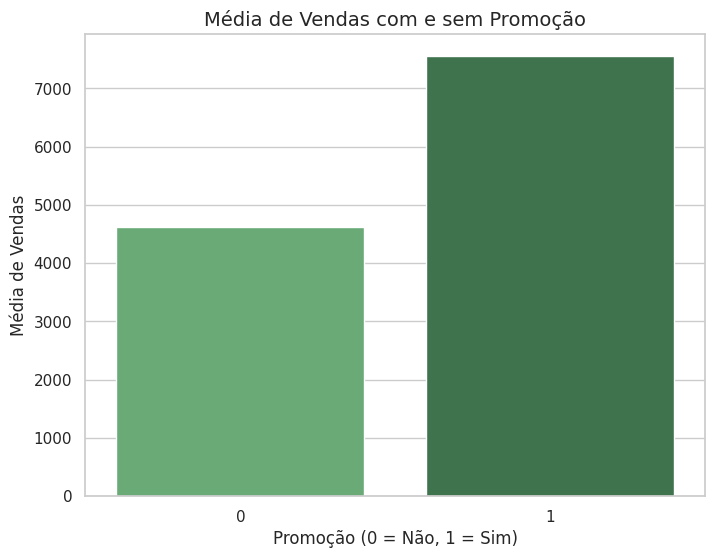

In [ ]:
# Selecionando os intervalos de análise
data = {
    "Sales": [5000, 7000, 8000, 4000, 9000, 3000],
    "Promo": [1, 0, 1, 0, 1, 0]
}

# Cálculo da média de vendas com e sem promoção
sales_by_promo = base.groupby("Promo")["Sales"].median().reset_index()

# Configurando o estilo do seaborn
sns.set_theme(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x="Promo", y="Sales", data=sales_by_promo, palette="Greens_d", dodge=False)

# Configurando os rót

plt.xlabel("Promoção (0 = Não, 1 = Sim)", fontsize=12)
plt.ylabel("Média de Vendas", fontsize=12)
plt.title("Média de Vendas com e sem Promoção", fontsize=14)

# Exibindo o gráfico
plt.show()


 Média de Vendas com e sem Promoção

Eficácia da Promoção:
Promoções aumentam significativamente as vendas, indicando que são uma ferramenta eficaz para impulsionar o desempenho.

Estratégias Futuras:
Empresas podem priorizar campanhas promocionais para maximizar as receitas, especialmente em produtos de maior margem.

O histograma indica que a maioria das lojas apresenta vendas concentradas entre 0 e 10.000, com poucos casos de vendas muito altas (acima de 20.000).

##### date e vendas

In [ ]:
# Agrupando os dados por tipo temporalidade e somando as vendas
vendas_anuais =  base.groupby('Year')['Sales'].sum()
# Calculando a média das vendas
vendas_mensais = base.groupby('Month')['Sales'].mean()
vendas_diarias = base.groupby('Day')['Sales'].mean()
# Exibindo o resulatdo na tela
print("Tendências Temporais:")
print("Vendas Anuais:")
print(vendas_anuais)
print("\nVendas Mensais:")
print(vendas_mensais)
print("\nVendas Diárias:")
print(vendas_diarias)

Tendências Temporais:
Vendas Anuais:
Year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64

Vendas Mensais:
Month
1     5465.395529
2     5645.253150
3     5784.578871
4     5738.866916
5     5489.639973
6     5760.964375
7     6064.915711
8     5693.016554
9     5570.246033
10    5537.037419
11    6008.111821
12    6826.611377
Name: Sales, dtype: float64

Vendas Diárias:
Day
1     4658.450603
2     6973.664895
3     5811.044109
4     6818.008362
5     6357.150246
6     5886.054621
7     6014.050679
8     5665.783784
9     5253.768165
10    5406.580947
11    5476.275616
12    5203.584321
13    5741.517605
14    5381.010303
15    5831.355980
16    6378.768673
17    6124.261341
18    6370.260326
19    5826.518113
20    5839.835986
21    5454.107989
22    5470.293743
23    5674.454263
24    4975.415350
25    4823.639809
26    4837.208541
27    5801.549321
28    5881.821622
29    5876.384837
30    7297.266656
31    6235.653178
Name: Sales, dtype: float64


**Análise de Tendências Temporais de Vendas**

1. **Vendas Anuais** : As vendas anuais mostram uma tendência de queda ao longo dos anos analisados:

  - **2013:** 2.302.876.084

  - **2014**: 2.180.804.896

  - **2015**: 1.389.499.643

  **Observação:** A redução pode indicar mudanças no mercado, queda na demanda ou problemas internos de operação.

2. **Vendas Mensais**: A análise média das vendas mensais sugere uma sazonalidade:

  - **Picos de Vendas:** Dezembro (6.826,61) e Julho (6.064,92).

  - **Meses com Menores Vendas**: Janeiro (5.465,40) e Outubro (5.537,04).

  **Observação:** O aumento em dezembro pode estar relacionado às compras de fim de ano.

3. **Vendas Diárias**: A média de vendas diárias mostra variações significativas:

  - Melhores dias: Dia 30 (7.297,27) e Dia 2 (6.973,66).

  - Dias mais fracos: Dia 25 (4.823,64) e Dia 26 (4.837,21).

  **Observação:** Os altos valores no dia 30 podem ser atribuídos a promoções de fim de mês.

4. **Resumo Geral**: A tendência geral das vendas sugere:

  - **Queda Anual**: Investigar os motivos para a redução nas vendas anuais.

  - **Sazonalidade Mensal**: Alavancar campanhas promocionais em dezembro e ajustar a estratégia para meses mais fracos.

  - **Vendas Diárias**: Planejar promoções em dias específicos para aumentar o fluxo em dias com menor volume.



##### SchoolHolliday x Vendas

Média de vendas com e sem feriados escolares:
SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64


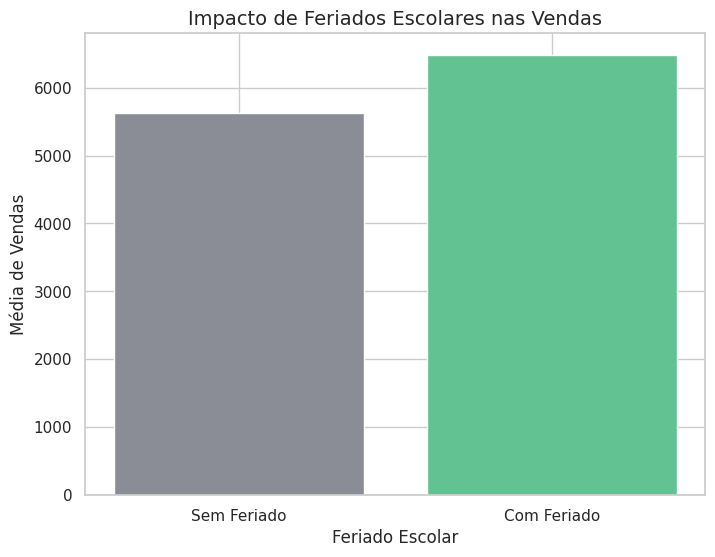

In [ ]:
# Calculando a média de vendas
media_vendas_feriados = base.groupby('SchoolHoliday')['Sales'].mean()
# Exibindo na tela o resultado
print("Média de vendas com e sem feriados escolares:")
print(media_vendas_feriados)

# Configurando o gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(
    media_vendas_feriados.index,
    media_vendas_feriados.values,
    color=["#8a8c96", "#62c292"]
)
plt.title("Impacto de Feriados Escolares nas Vendas", fontsize=14)
plt.xlabel("Feriado Escolar")
plt.ylabel("Média de Vendas")
plt.xticks(ticks=[0, 1], labels=["Sem Feriado", "Com Feriado"])
plt.show()


Análise do Impacto dos Feriados Escolares nas Vendas

Sem Feriado Escolar:

A média de vendas foi de 5.620,98, indicando um desempenho consistente em períodos normais.

Com Feriado Escolar:

A média de vendas aumentou para 6.476,52, mostrando um incremento significativo durante os feriados escolares.

Tendência Positiva:

Os feriados escolares parecem impulsionar as vendas, possivelmente devido a maior disponibilidade de tempo dos consumidores, como pais e estudantes, para realizar compras.

Potencial Estratégico:

Promoções Sazonais: Investir em campanhas específicas durante os feriados escolares pode alavancar ainda mais as vendas.
Estoques e Operações: Garantir estoque adequado e promoções atrativas para atender à alta demanda durante esses períodos.

##### Vendas por ano

Text(0, 0.5, 'Total de Vendas')

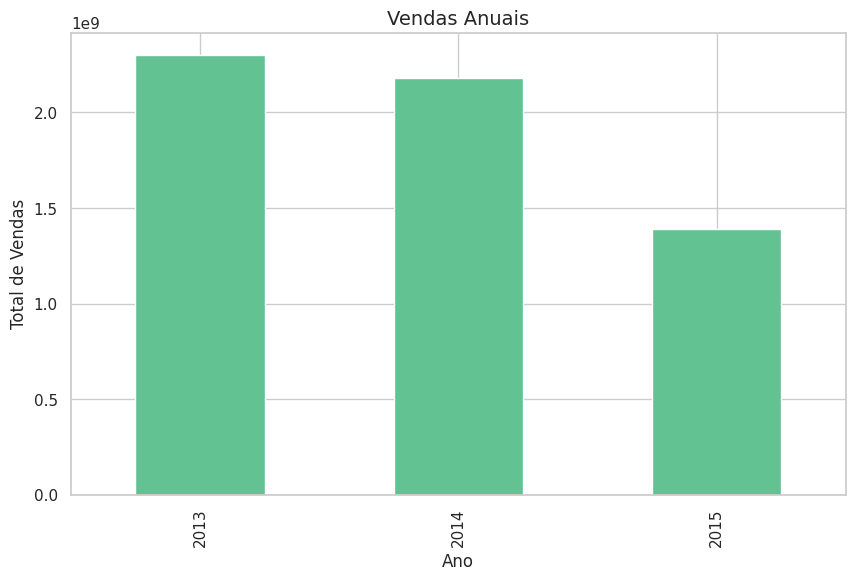

In [ ]:
# Configurando os detlahes do gráfico de vendas anuais
plt.figure(figsize=(10, 6))
vendas_anuais.plot(kind='bar', color="#62c292")
plt.title("Vendas Anuais", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Total de Vendas")

Vendas Anuais

Tendência de Queda: As vendas diminuíram de 2.302.876.084 em 2013 para 1.389.499.643 em 2015, indicando desafios crescentes no mercado ou na operação.

##### Vendas por mes

In [ ]:
# Configurando os detalhes do gráfico de vendas mensais
plt.figure(figsize=(10, 6))
vendas_mensais.plot(kind='line', marker='o', color="#2a9e69")
plt.title("Média de Vendas Mensais", fontsize=14)
plt.xlabel("Mês")
plt.ylabel("Média de Vendas")


Vendas Mensais

Sazonalidade Evidente: Picos de vendas ocorrem em dezembro e julho, enquanto os meses de janeiro e outubro apresentam os menores volumes de vendas.

##### Vendas por dia

In [ ]:
# Configurando os detalhes do gráfico de vendas diárias
plt.figure(figsize=(10, 6))
vendas_diarias.plot(kind='line', marker='o', color="#006837")
plt.title("Média de Vendas Diárias", fontsize=14)
plt.xlabel("Dia")
plt.ylabel("Média de Vendas")


Vendas Diárias

Variações Diárias Significativas: Os dias 2 e 30 do mês registram os maiores volumes de vendas, possivelmente devido a promoções e fechamento de mês, enquanto os dias 25 e 26 têm os menores valores.


#### Vendas x promoção

##### Análise geral do número e mediana de vendas com e sem promoção

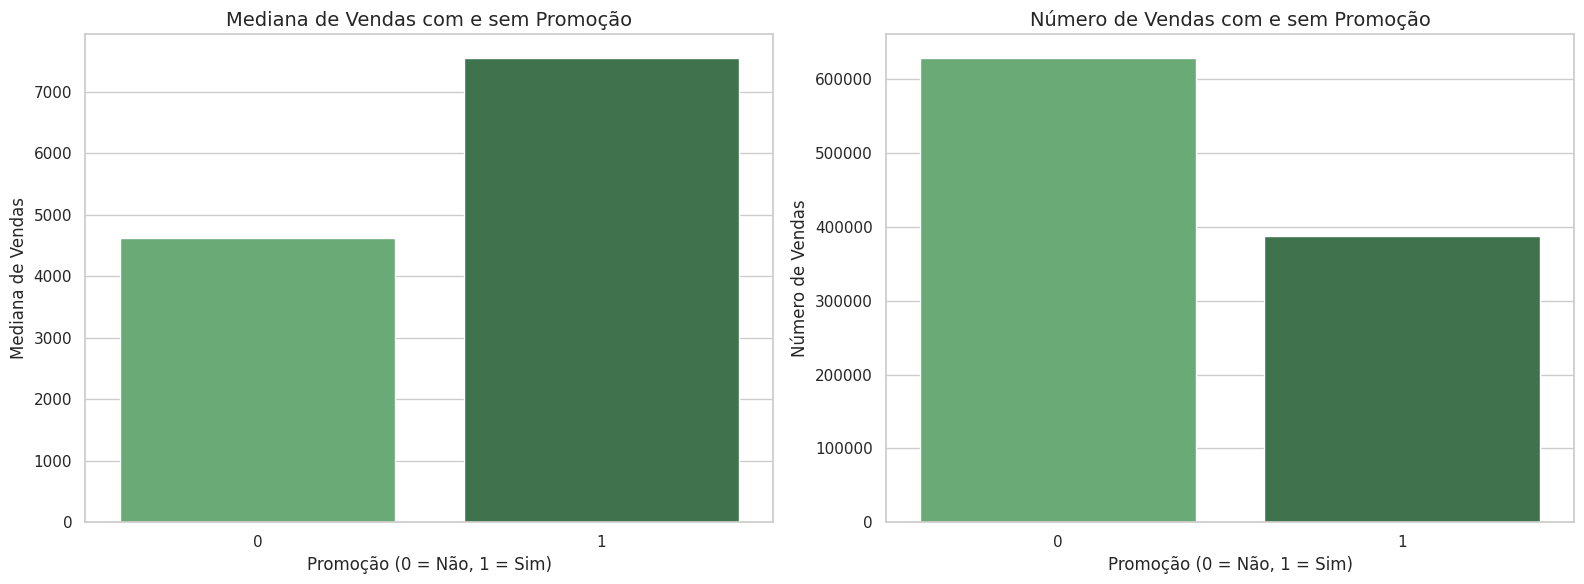

In [ ]:
# Cálculo da mediana de vendas com e sem promoção
sales_by_promo = base.groupby('Promo')["Sales"].median().reset_index()

# Cálculo do número de vendas com e sem promoção
count_by_promo = base.groupby('Promo')["Sales"].count().reset_index()
count_by_promo.rename(columns={"Sales": "Count"}, inplace=True)

# Configurando o estilo do seaborn
sns.set_theme(style="whitegrid")

# Criando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras para mediana de vendas
sns.barplot(ax=axes[0], x="Promo", y="Sales", hue="Promo", data=sales_by_promo, palette="Greens_d", dodge=False)
axes[0].set_xlabel("Promoção (0 = Não, 1 = Sim)", fontsize=12)
axes[0].set_ylabel("Mediana de Vendas", fontsize=12)
axes[0].set_title("Mediana de Vendas com e sem Promoção", fontsize=14)
axes[0].get_legend().remove()

# Gráfico de barras para número de vendas
sns.barplot(ax=axes[1], x="Promo", y="Count", hue="Promo", data=count_by_promo, palette="Greens_d", dodge=False)
axes[1].set_xlabel("Promoção (0 = Não, 1 = Sim)", fontsize=12)
axes[1].set_ylabel("Número de Vendas", fontsize=12)
axes[1].set_title("Número de Vendas com e sem Promoção", fontsize=14)
axes[1].get_legend().remove()

# Ajustando o layout
plt.tight_layout()
plt.show()

**Conclusões**

Se a média de vendas com Promo = 1 (com promoção) é maior que a mediana de vendas com Promo = 0 (sem promoção), mas o número de vendas com Promo = 0 é maior que o número de vendas com Promo = 1, podemos interpretar isso da seguinte maneira:

- Promoções são eficazes: um aumento nas vendas em dias com promoções indica que as promoções geram mais vendas por dia.

- Promoções são menos frequentes: o menor número de vendas com Promo = 1 sugere que as promoções são realizadas em uma fração menor do tempo.

- Vendas regulares ainda são significativas: embora as promoções aumentem a média de vendas por dia, a maior frequência de dias sem promoções significa que as vendas regulares (sem promoções) continuam a ser uma parte importante do negócio. Isso pode indicar que a estratégia atual prioriza vendas regulares.

**Insights**

- Se as promoções aumentam substancialmente as vendas médias, pode haver espaço para explorar sua frequência ou ajustar estratégias para maximizar o impacto em dias sem promoção. Mas é importante verificar se o aumento de vendas compensa o custo da promoção (descontos, publicidade, etc.)



#####Análise da relação entre promos e clientes

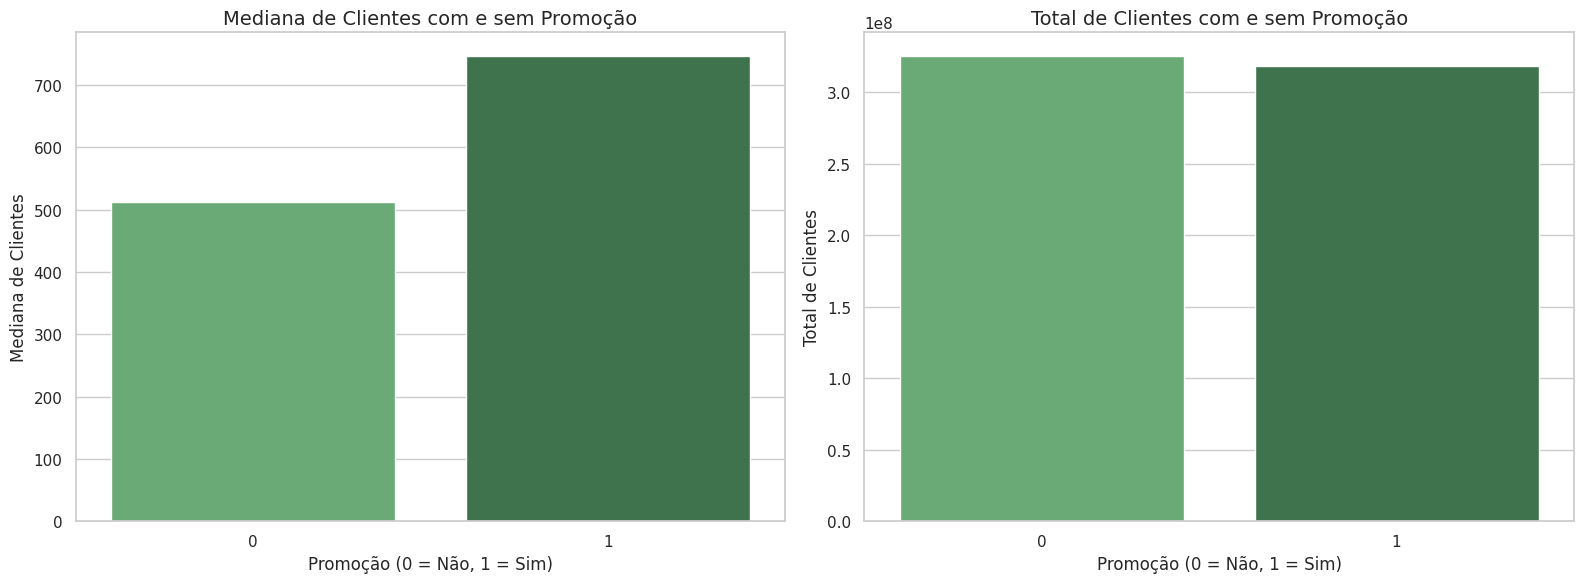

In [ ]:
# Cálculo da mediana de clientes com e sem promoção
customers_by_promo = base.groupby('Promo')["Customers"].median().reset_index()

# Cálculo do número total de clientes com e sem promoção
count_customers_by_promo = base.groupby('Promo')["Customers"].sum().reset_index()
count_customers_by_promo.rename(columns={"Customers": "TotalCustomers"}, inplace=True)

# Configurando o estilo do seaborn
sns.set_theme(style="whitegrid")

# Criando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras para média de clientes
sns.barplot(ax=axes[0], x="Promo", y="Customers", hue="Promo", data=customers_by_promo, palette="Greens_d", dodge=False)
axes[0].set_xlabel("Promoção (0 = Não, 1 = Sim)", fontsize=12)
axes[0].set_ylabel("Mediana de Clientes", fontsize=12)
axes[0].set_title("Mediana de Clientes com e sem Promoção", fontsize=14)
axes[0].get_legend().remove()

# Gráfico de barras para número total de clientes
sns.barplot(ax=axes[1], x="Promo", y="TotalCustomers", hue="Promo", data=count_customers_by_promo, palette="Greens_d", dodge=False)
axes[1].set_xlabel("Promoção (0 = Não, 1 = Sim)", fontsize=12)
axes[1].set_ylabel("Total de Clientes", fontsize=12)
axes[1].set_title("Total de Clientes com e sem Promoção", fontsize=14)
axes[1].get_legend().remove()

# Ajustando o layout
plt.tight_layout()
plt.show()


**Conclusões**

- Promoções atraem mais clientes por dia, embora o número total de clientes seja similar com o caso de Promo = 0. Isso pode indicar que as promoções têm um impacto imediato em aumentar o fluxo de clientes.

- Dias com promoção concentram a demanda, sendo possível que os clientes estejam planejando suas visitas para coincidir com os dias em que há promoções, em vez de espalharem suas visitas uniformemente ao longo do tempo.

- Eficiência das promoções, visto que as promoções estão sendo eficazes em atrair um volume maior de clientes por dia, o que pode gerar maior receita e engajamento em curto prazo.

**Insights**

- Clientes que recebem promoção tendem a comprar mais (em média), mas a maior parte das vendas ainda ocorre sem promoção, sugerindo que há um grande número de clientes que não estão sendo impactados pela promoção.

- Explorar ajustes nas promoções (como maior frequência, tipos de descontos ou promoções personalizadas) poderia aumentar a adesão e a quantidade de vendas com promoções, aproveitando o comportamento positivo observado entre os clientes que já compram com promoções.

#####Análise da relação entre promo e sortimento

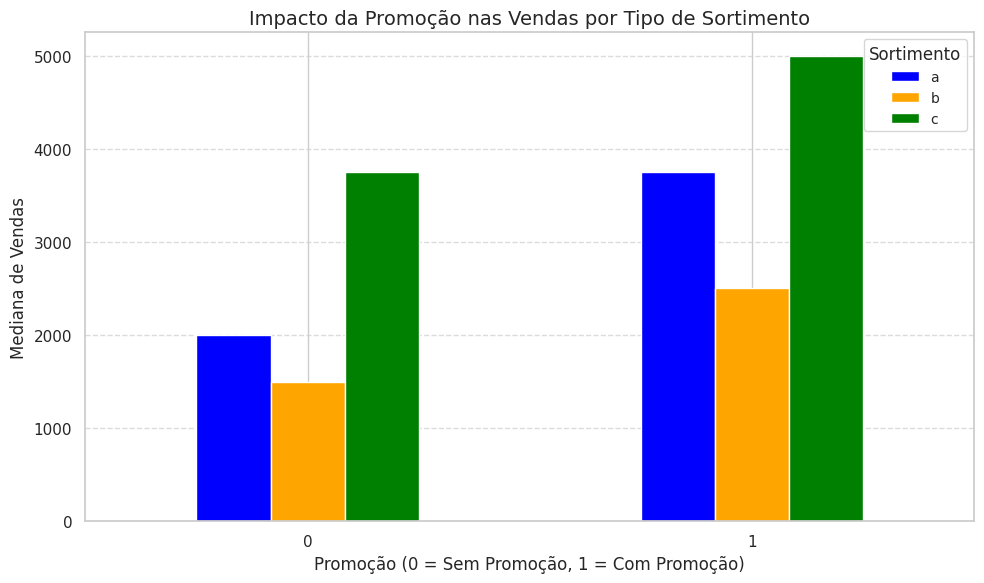

In [ ]:
# Criando uma cópia da base
df = base.copy()

# Definindo as variáveis a serem analisadas
data = {
    'Promo': [0, 1, 0, 1, 0, 1, 0, 1],
    'Assortment': ['a', 'a', 'b', 'b', 'c', 'c', 'c', 'a'],
    'Sales': [2000, 3000, 1500, 2500, 4000, 5000, 3500, 4500]
}

# Salvando apenas as colunas com essas variáveis na base-teste
df = pd.DataFrame(data)

# Calcular a média de vendas para cada combinação de Promo e Assortment
promo_assortment_sales = df.groupby(['Promo', 'Assortment'])['Sales'].median().unstack()

# Configurar o gráfico
ax = promo_assortment_sales.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green'])

# Personalizar o gráfico
plt.title('Impacto da Promoção nas Vendas por Tipo de Sortimento', fontsize=14)
plt.xlabel('Promoção (0 = Sem Promoção, 1 = Com Promoção)', fontsize=12)
plt.ylabel('Mediana de Vendas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sortimento', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()


**Conclusões**

- A mediana das vendas aumenta para os três tipos de sortimento quando há promoções (Promoção = 1). Isso demonstra que as promoções têm um impacto positivo e direto sobre as vendas.

- O sortimento tipo C tem o maior aumento na mediana de vendas quando comparado ao estado sem promoção. Isso sugere que o tipo C é o mais sensível às campanhas promocionais.

- O sortimento tipo B apresenta as menores medianas de vendas tanto com quanto sem promoção. Isso indica que, embora a promoção ajude, o tipo B ainda é menos atrativo em relação aos outros sortimentos.

- O sortimento tipo A mostra um aumento consistente na mediana de vendas, mas esse crescimento é menor em comparação ao tipo C.

**Insights**

- Como o sortimento tipo C responde mais intensamente às promoções, campanhas específicas voltadas para esse segmento podem gerar retornos ainda maiores. É recomendável explorar estratégias como descontos maiores ou pacotes promocionais.

- Deve-se reavaliar o sortimento tipo B, porque apesar do impacto positivo das promoções, o tipo B continua tendo o menor desempenho em vendas. Isso pode indicar problemas como baixa demanda, menor adequação ao público-alvo ou necessidade de revisão de preço e qualidade.

- Deve-se considerar fazer promoções estratégicas para o tipo A, já que elas também trazem um impacto positivo no tipo A, o que indica potencial para aumentar ainda mais as vendas. Campanhas que combinem o tipo A o tipo C, numa promoção cruzada, pode impulsionar essas vendas.

#####Análise da relação entre promoção e promo 2

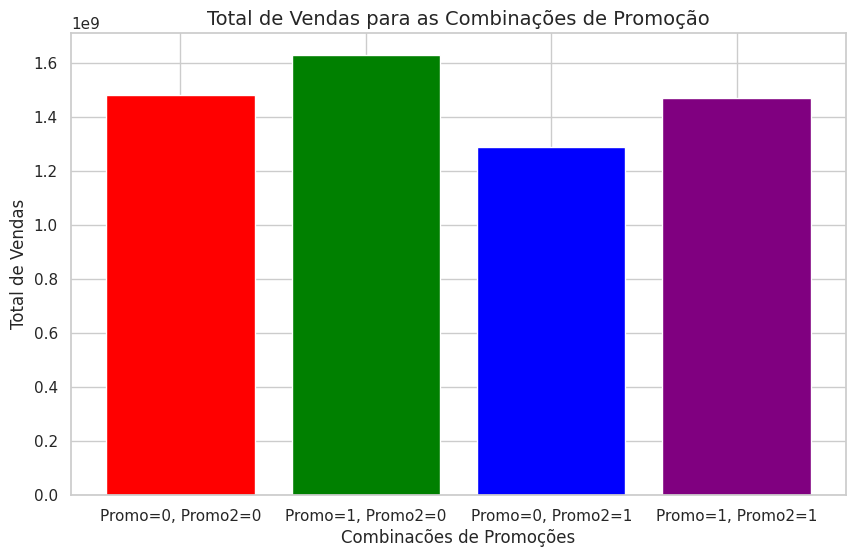

In [ ]:
# Agrupar as vendas com base nas combinações de Promo e Promo2
sales_promo_combinations = base.groupby(['Promo', 'Promo2'])['Sales'].sum().reset_index()

# Definindo as combinações de Promo e Promo2 para as 4 barras
sales_comb_0_0 = sales_promo_combinations[(sales_promo_combinations['Promo'] == 0) & (sales_promo_combinations['Promo2'] == 0)]['Sales'].sum()
sales_comb_1_0 = sales_promo_combinations[(sales_promo_combinations['Promo'] == 1) & (sales_promo_combinations['Promo2'] == 0)]['Sales'].sum()
sales_comb_0_1 = sales_promo_combinations[(sales_promo_combinations['Promo'] == 0) & (sales_promo_combinations['Promo2'] == 1)]['Sales'].sum()
sales_comb_1_1 = sales_promo_combinations[(sales_promo_combinations['Promo'] == 1) & (sales_promo_combinations['Promo2'] == 1)]['Sales'].sum()

# Criando os rótulos e valores para as 4 barras
labels = ['Promo=0, Promo2=0', 'Promo=1, Promo2=0', 'Promo=0, Promo2=1', 'Promo=1, Promo2=1']
sales_values = [sales_comb_0_0, sales_comb_1_0, sales_comb_0_1, sales_comb_1_1]

# Gerando o histograma com 4 barras
plt.figure(figsize=(10, 6))
plt.bar(labels, sales_values, color=['red', 'green', 'blue', 'purple'])

# Adicionando títulos e rótulos
plt.title('Total de Vendas para as Combinações de Promoção', fontsize=14)
plt.xlabel('Combinacões de Promoções', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)

# Exibindo o gráfico
plt.show()

**Conclusões**

- Promoções simples (Promo = 1 e Promo2 = 0) são eficazes e aumentam as vendas, já que as promoções regulares (não contínuas) atraem mais clientes ou aumentam a média de compras.

- Promoções contínuas (Promo2 = 1) têm um impacto negativo ou limitado nas vendas, o que pode sugerir que promoções contínuas não geram um aumento adicional nas vendas. Isso pode ocorrer por diversas razões, como saturação do público-alvo, clientes já habituados a promoções contínuas ou uma falta de novidade nas ofertas.

- Combinando promoções simples e contínuas não resulta em aumento de vendas em comparação com promoções simples isoladas.

**Insights**

- Continuar com promoções simples e eficazes, mas repensar as promoções contínuas (Promo2 = 1), possivelmente ajustando sua frequência ou formato.
Explorar promoções mais segmentadas e temporais para criar uma sensação de urgência e evitar a saturação.

#####Análise da relação entre promoção e distância da concorrência

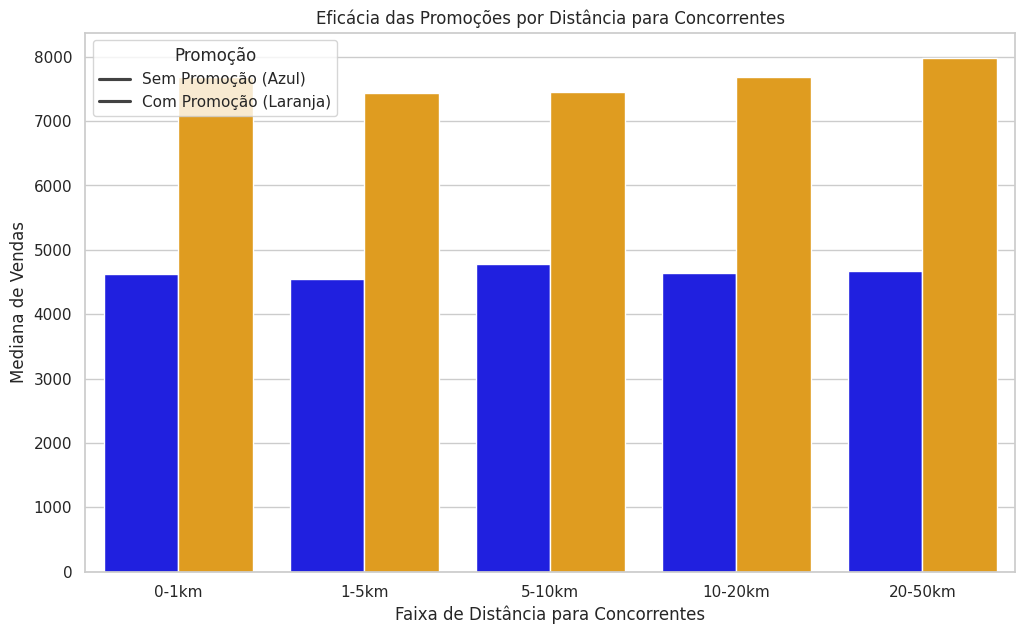

In [ ]:
# Filtrando os dados para considerar promoções ativas (Promo = 1) e sem promoções (Promo = 0)
base_promo_active = base[base['Promo'] == 1]
base_no_promo = base[base['Promo'] == 0]

# Criar faixas de distância para o concorrente (CompetitionDistance)
bins = [0, 1000, 5000, 10000, 20000, 50000]  # Exemplo de faixas de distância
labels = ['0-1km', '1-5km', '5-10km', '10-20km', '20-50km']  # Etiquetas para as faixas

# Adicionar uma coluna 'DistanceCategory' para classificar as lojas em faixas de distância para Promo = 1
base_promo_active['DistanceCategory'] = pd.cut(base_promo_active['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Adicionar uma coluna 'DistanceCategory' para classificar as lojas em faixas de distância para Promo = 0
base_no_promo['DistanceCategory'] = pd.cut(base_no_promo['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Agrupar as vendas por faixas de distância e se há promoção ou não (Promo = 1 ou Promo = 0)
base_distance_promo_active = base_promo_active.groupby(['DistanceCategory', 'Promo'], observed=False)['Sales'].median().reset_index()
base_distance_promo_no = base_no_promo.groupby(['DistanceCategory', 'Promo'], observed=False)['Sales'].median().reset_index()

# Combinar os dois dataframes para facilitar a visualização (Promo = 1 e Promo = 0)
base_distance_promo_combined = pd.concat([base_distance_promo_active, base_distance_promo_no])

# Visualizar a média de vendas por faixa de distância e Promoção
plt.figure(figsize=(12, 7))
sns.barplot(x='DistanceCategory', y='Sales', hue='Promo', data=base_distance_promo_combined, palette={0: 'blue', 1: 'orange'})
plt.title('Eficácia das Promoções por Distância para Concorrentes')
plt.ylabel('Mediana de Vendas')
plt.xlabel('Faixa de Distância para Concorrentes')

# Ajuste explícito da legenda para garantir que as cores apareçam corretamente
plt.legend(title='Promoção', labels=['Sem Promoção (Azul)', 'Com Promoção (Laranja)'])
plt.show()


**Conclusões**

- As promoções têm um impacto robusto nas vendas, independentemente da proximidade dos concorrentes.

- Lojas com promoções atraem mais clientes e geram mais vendas, mesmo em mercados concorridos.

**Conclusões**

- O comportamento observado sugere que manter promoções regulares pode ser uma estratégia eficaz para aumentar as vendas. A consistência das promoções parece gerar uma resposta positiva no volume de vendas em diversos contextos de concorrência.

#####Análise da relação entre promoção e feriados e fechamento de escolas

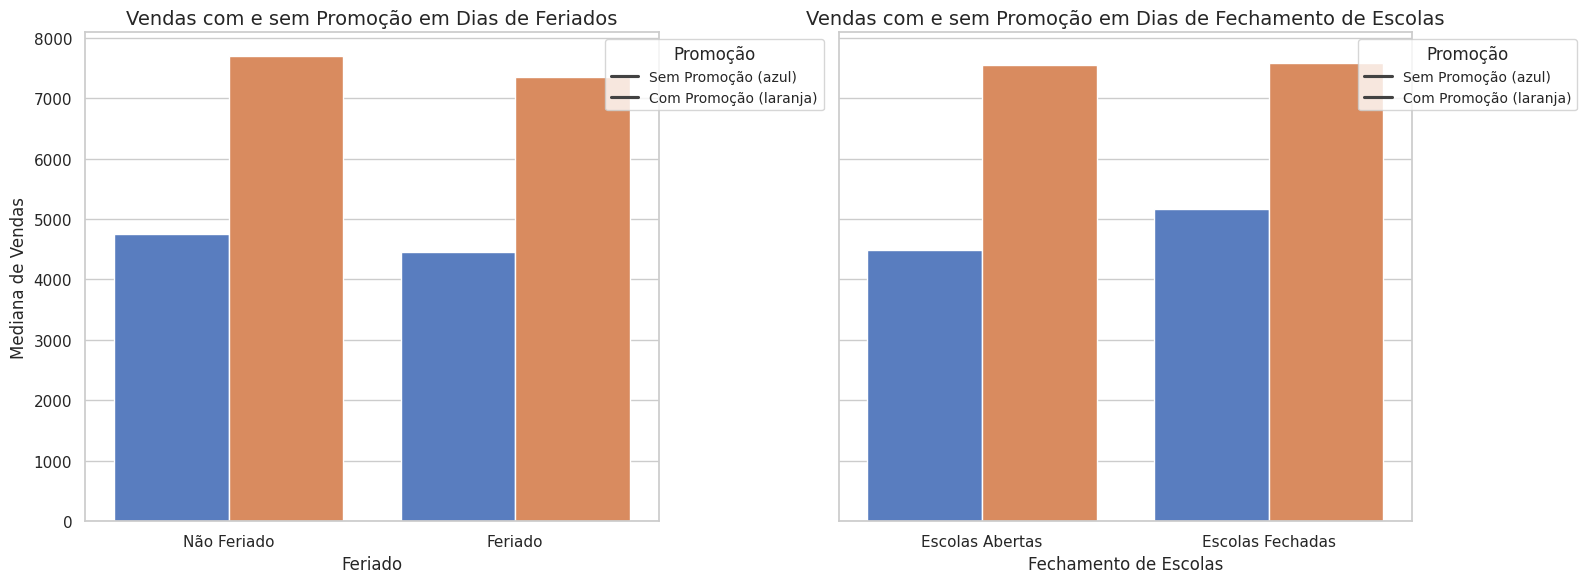

In [ ]:
base_teste = base.copy()

# Criando uma nova coluna para identificar feriados
base_teste['IsHoliday'] = base['StateHoliday'] != "0"

# Agrupando os dados por Promo e IsHoliday para calcular a mediana de vendas
sales_by_promo_holiday = base_teste.groupby(['Promo', 'IsHoliday'])['Sales'].median().reset_index()
sales_by_promo_holiday['IsHoliday'] = sales_by_promo_holiday['IsHoliday'].map({True: 'Feriado', False: 'Não Feriado'})

# Agrupando os dados por Promo e SchoolHoliday para calcular a mediana de vendas
sales_by_promo_school = base_teste.groupby(['Promo', 'SchoolHoliday'])['Sales'].median().reset_index()
sales_by_promo_school['SchoolHoliday'] = sales_by_promo_school['SchoolHoliday'].map({1: 'Escolas Fechadas', 0: 'Escolas Abertas'})

# Configurando o estilo do seaborn
sns.set_theme(style="whitegrid")

# Criando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Gráfico de vendas com e sem promoção em dias de feriados
sns.barplot(ax=axes[0], x="IsHoliday", y="Sales", hue="Promo", data=sales_by_promo_holiday, palette="muted")
axes[0].set_title("Vendas com e sem Promoção em Dias de Feriados", fontsize=14)
axes[0].set_xlabel("Feriado", fontsize=12)
axes[0].set_ylabel("Mediana de Vendas", fontsize=12)
axes[0].legend(title="Promoção", labels=["Sem Promoção (azul)", "Com Promoção (laranja)"], fontsize=10, loc='upper right', bbox_to_anchor=(1.3, 1))

# Gráfico de vendas com e sem promoção em dias de fechamento de escolas
sns.barplot(ax=axes[1], x="SchoolHoliday", y="Sales", hue="Promo", data=sales_by_promo_school, palette="muted")
axes[1].set_title("Vendas com e sem Promoção em Dias de Fechamento de Escolas", fontsize=14)
axes[1].set_xlabel("Fechamento de Escolas", fontsize=12)
axes[1].set_ylabel("")
axes[1].legend(title="Promoção", labels=["Sem Promoção (azul)", "Com Promoção (laranja)"], fontsize=10, loc='upper right', bbox_to_anchor=(1.3, 1))

# Ajustando o layout
plt.tight_layout()
plt.show()


**Conclusões**


- Durante os feriados, as vendas com promoção (barra laranja) são significativamente mais altas do que as sem promoção (barra azul). Isso sugere que, em feriados, as promoções têm um impacto positivo considerável nas vendas, aumentando o volume de vendas quando comparado aos dias sem promoção.

- Nos dias sem feriado, as vendas com promoção continuam sendo mais altas que as sem promoção, mas a diferença não é tão grande quanto nos feriados. Isso indica que a promoção ainda é eficaz, mas o aumento nas vendas não é tão acentuado quanto durante os feriados.

- Quando as escolas estão fechadas, as vendas com promoção são novamente mais altas em comparação com as sem promoção. A promoção tem um efeito positivo, mas a diferença não é tão grande quanto nos feriados.

- Nos dias em que as escolas estão abertas, a diferença entre vendas com promoção e sem promoção continua, com as vendas com promoção sendo mais altas, mas a disparidade não é tão grande quanto nos feriados.

**Insights**

- A promoção aumenta as vendas, independentemente de ser dia de feriado ou fechamento de escolas. A diferença é mais pronunciada durante os feriados, sugerindo que as promoções são mais eficazes em momentos de maior demanda, como feriados.

- O impacto das promoções é mais notável em feriados, onde as vendas com promoção são muito superiores às sem promoção, indicando que os consumidores estão mais propensos a comprar durante feriados se houver um incentivo de promoção.

- Com base nesses dados, uma boa estratégia seria aumentar a promoção em feriados e, em menor escala, durante o fechamento de escolas. Isso pode ser uma forma de maximizar as vendas em períodos com maior tráfego de consumidores.

#####Análise da relação entre promoção e sazonalidade

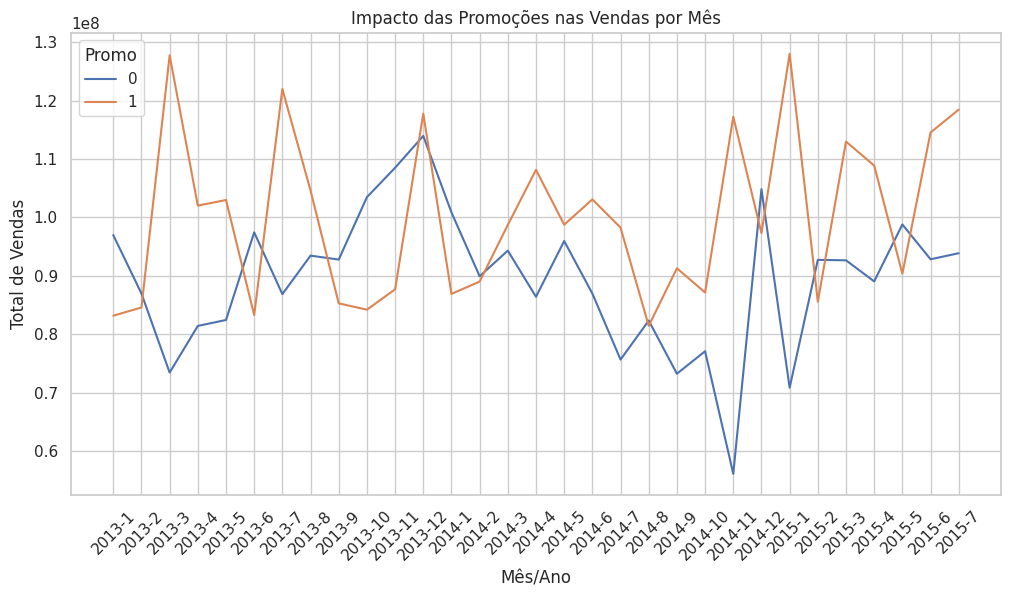

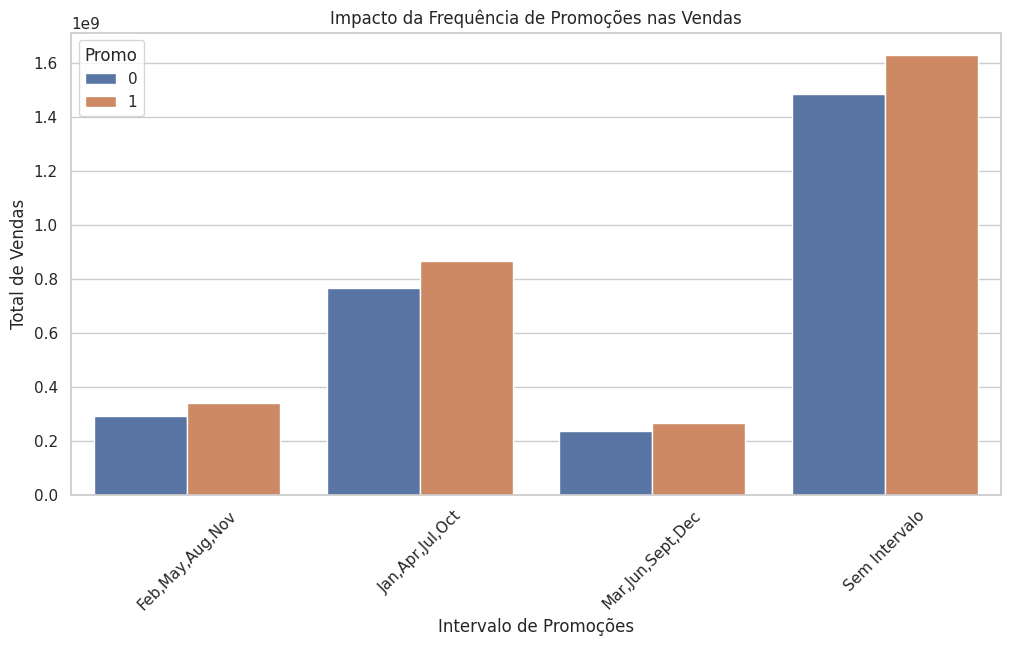

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


# ---------- Passo 1: Análise de Sazonalidade -----------
base['Date'] = pd.to_datetime(base[['Year', 'Month', 'Day']])

# Agrupar as vendas por mês e analisar o impacto de promoções
base_monthly = base.groupby([base['Year'], base['Month'], 'Promo'])['Sales'].sum().reset_index()
base_monthly['Year_Month'] = base_monthly['Year'].astype(str) + '-' + base_monthly['Month'].astype(str)

# Visualizar a sazonalidade das vendas com promoções
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='Sales', hue='Promo', data=base_monthly)
plt.title('Impacto das Promoções nas Vendas por Mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

# ---------- Passo 2: Análise de Frequência (PromoInterval) -----------

# Verificar a repetição de promoções e seu impacto nas vendas
base['PromoInterval'] = base['PromoInterval'].fillna('Sem Intervalo')  # Garantir que não haja valores nulos
base_promo_interval = base.groupby(['PromoInterval', 'Promo'])['Sales'].sum().reset_index()

# Visualizar o impacto da frequência das promoções
plt.figure(figsize=(12, 6))
sns.barplot(x='PromoInterval', y='Sales', hue='Promo', data=base_promo_interval)
plt.title('Impacto da Frequência de Promoções nas Vendas')
plt.xlabel('Intervalo de Promoções')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()


Análise Gráfico 1: **Impacto das Promoções nas Vendas por Mês**

1. Comparação Promoções x Sem Promoções
   - As vendas durante os meses com promoções geralmente são superiores aos meses sem promoções.
   - Há oscilações nos dois casos, mas promoções parecem criar picos claros em períodos específicos.

2. Tendência Temporal
   - Observa-se que as vendas com promoções têm maior volatilidade, o que pode indicar que promoções têm maior impacto sazonal ou em eventos específicos.
   - Meses como o final de ano (novembro/dezembro) têm picos significativos, possivelmente relacionados a promoções sazonais (Black Friday, Natal).

---

Análise Gráfico 2: **Impacto da Frequência de Promoções nas Vendas**

1. Intervalos de Promoções
   - A categoria "Sem Intervalo" (podendo ser promoções contínuas ou recorrentes e/ou dados ausentes) gerou o maior volume de vendas. Não se pode afirmar insights sobre isso devido ao segundo caso (dados ausentes), mas sabemos na análise de promo x promo2 que promoções contínuas tem impacto limitado,  
   - Os meses de Janeiro, Abril, Julho e Outubro (barras laranjas) também apresentaram bom desempenho, sugerindo que promoções estrategicamente planejadas para esses períodos podem ser mais eficazes.

2. Baixo Impacto em Certos Meses
   - Promoções em "Março, Junho, Setembro" tiveram menor impacto, o que pode ser atribuído à sazonalidade ou menor relevância dos períodos para consumidores.

---

**Insights:**
   - Promoções têm impacto positivo nas vendas, mas o sucesso depende de fatores como frequência, sazonalidade e execução.

   - Campanhas devem ser intensificadas nos meses que apresentam histórico de maiores vendas (como Novembro/Dezembro).

   - Promoções em intervalos curtos podem manter o engajamento do consumidor, enquanto promoções espaçadas podem perder relevância.


In [ ]:
# Filtrando os dados para considerar apenas quando Promo = 1 (promoção ativa)
base_promo_active = base[base['Promo'] == 1]
# Filtrando os dados para considerar apenas quando Promo = 0 (sem promoção)
base_no_promo = base[base['Promo'] == 0]

# Agrupar as vendas diárias com promoções ativas
base_promo_active_daily = base_promo_active.groupby('Date')['Sales'].sum().reset_index()
# Agrupar as vendas diárias sem promoções
base_no_promo_daily = base_no_promo.groupby('Date')['Sales'].sum().reset_index()

# Realizar decomposição sazonal para identificar tendências e padrões (para Promo = 1)
# Ajustar o período para corresponder à frequência dos dados disponíveis
decomposition_promo = seasonal_decompose(base_promo_active_daily['Sales'], model='additive', period=180) #mudar o periodo para um valor que seja no minimo a metade do tamanho do dataset.
# Realizar decomposição sazonal para identificar tendências e padrões (para Promo = 0)
# Ajustar o período para corresponder à frequência dos dados disponíveis
decomposition_no_promo = seasonal_decompose(base_no_promo_daily['Sales'], model='additive', period=180) #mudar o periodo para um valor que seja no minimo a metade do tamanho do dataset.

# Visualizar a decomposição sazonal (tendência, sazonalidade e resíduos) para Promo = 1 (promoções ativas) e Promo = 0 (sem promoções)
plt.figure(figsize=(16, 12))

# Vendas Totais
plt.subplot(4, 2, 1)
plt.plot(base_promo_active_daily['Date'], base_promo_active_daily['Sales'], label='Vendas com Promoção Ativa', color='blue')
plt.title('Vendas Totais com Promoção Ativa')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(4, 2, 2)
plt.plot(base_no_promo_daily['Date'], base_no_promo_daily['Sales'], label='Vendas Sem Promoção', color='red')
plt.title('Vendas Totais Sem Promoção')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Tendência das Vendas
plt.subplot(4, 2, 3)
plt.plot(base_promo_active_daily['Date'], decomposition_promo.trend, label='Tendência com Promoção Ativa', color='green')
plt.title('Tendência das Vendas com Promoção Ativa')
plt.xlabel('Data')
plt.ylabel('Tendência')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(4, 2, 4)
plt.plot(base_no_promo_daily['Date'], decomposition_no_promo.trend, label='Tendência Sem Promoção', color='purple')
plt.title('Tendência das Vendas Sem Promoção')
plt.xlabel('Data')
plt.ylabel('Tendência')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Sazonalidade das Vendas
plt.subplot(4, 2, 5)
plt.plot(base_promo_active_daily['Date'], decomposition_promo.seasonal, label='Sazonalidade com Promoção Ativa', color='orange')
plt.title('Sazonalidade das Vendas com Promoção Ativa')
plt.xlabel('Data')
plt.ylabel('Sazonalidade')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(4, 2, 6)
plt.plot(base_no_promo_daily['Date'], decomposition_no_promo.seasonal, label='Sazonalidade Sem Promoção', color='yellow')
plt.title('Sazonalidade das Vendas Sem Promoção')
plt.xlabel('Data')
plt.ylabel('Sazonalidade')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


**Conclusões**

1. Vendas Totais com e sem Promoção

-Com Promoção
  - As vendas apresentam alta volatilidade, com picos regulares.
  - O impacto das promoções é evidente nos picos, indicando que elas impulsionam o volume de vendas significativamente em períodos específicos.

-Sem Promoção
  - As vendas são mais estáveis e menos voláteis em comparação com as vendas com promoções.
  - Embora não haja picos significativos, as vendas "base" sem promoções são consistentes.

**Insight:** Promoções claramente impulsionam as vendas, mas o padrão volátil sugere dependência de fatores externos, como sazonalidade ou condições econômicas.

---

2. Tendência das Vendas com e sem Promoção
-Com Promoção
  - Há uma tendência de queda prolongada nas vendas com promoção a partir de meados de 2013, atingindo o ponto mais baixo em meados de 2014.
  - Um leve aumento no final de 2014 sugere recuperação.

-Sem Promoção
  - Apresenta uma tendência oposta: crescimento até meados de 2014, seguido por uma leve queda, mas com recuperação em 2015.

**Insights**
- A dependência de promoções pode ter causado desgaste ao longo do tempo, reduzindo sua eficácia.
- Vendas sem promoções apresentam uma base sólida e recuperação consistente, sugerindo um público-alvo diferente ou fidelidade do cliente.

---

3. Sazonalidade das Vendas com e sem Promoção
-Com Promoção
  - Sazonalidade forte, com oscilações marcantes ao longo do ano.
  - Os picos sugerem períodos específicos (ex.: fim de ano ou datas comemorativas) em que promoções são mais eficazes.

-Sem Promoção
  - Sazonalidade menos acentuada, mas ainda presente. As flutuações são mais moderadas.

**Insights**
- As promoções são mais impactantes em períodos específicos de alta sazonalidade.
- A sazonalidade sem promoções, embora menor, indica que fatores externos (ex.: estações do ano, feriados) também afetam vendas base.

---

**Conclusões/Insights Gerais**:
1. **Eficácia das Promoções**:
   - Promoções geram picos de vendas, mas sua eficácia parece estar diminuindo ao longo do tempo (como mostrado pela tendência decrescente).
   - Isso pode indicar saturação ou menor percepção de valor pelos consumidores.

2. **Importância da Base de Vendas Sem Promoções**:
   - As vendas sem promoções apresentam uma base sólida, menos volátil e com tendência de crescimento.
   - Investir na experiência do cliente e valor do produto pode ajudar a sustentar essa base.

3. **Sazonalidade Estratégica**:
   - As promoções são mais eficazes em períodos sazonais específicos. Concentrar esforços promocionais nesses períodos pode maximizar o ROI.



### **Variável 'Customers' - Correlação de moderada a alta**

#### Promo x Clientes

##### Análise do levantamento de clientes em dias com e sem promoção


In [ ]:
# Gráfico analisando correlação promo e vendas
# Análise 1: Relação entre Promoções e Número de Clientes
promo_customers = base.groupby('Promo')['Customers'].median().reset_index()
print(promo_customers)

# Visualização 1: Gráfico de rosca da média de clientes por promoção
fig1 = px.pie(promo_customers, values='Customers', names='Promo', title='Mediana de Clientes por Promoção', hole=0.4)
fig1.update_traces(marker=dict(colors=['#00FF00', '#008000']))
fig1.show()

   Promo  Customers
0      0      512.0
1      1      747.0


In [ ]:
# Análise 1: Relação entre Promoções e Número de Clientes, considerando Promo e Promo2
promo_customers = base.groupby(['Promo', 'Promo2'])['Customers'].median().reset_index()
print(promo_customers)

   Promo  Promo2  Customers
0      0       0      568.0
1      0       1      470.0
2      1       0      823.0
3      1       1      679.0


**Insight:**

Os dias de promoção apresentam uma mediana de vendas relativamente maior, conforme o esperado. Isso evidencia que as promoções são eficazes para atrair mais clientes, demonstrando que os consumidores valorizam esses períodos promocionais. Esse comportamento reforça a importância de continuar investindo em estratégias promocionais para alavancar as vendas em dias específicos, otimizando o engajamento dos clientes e o desempenho financeiro.

##### IVerificação do impacto causado pelas promoções no número de clientes ao lngos dos meses


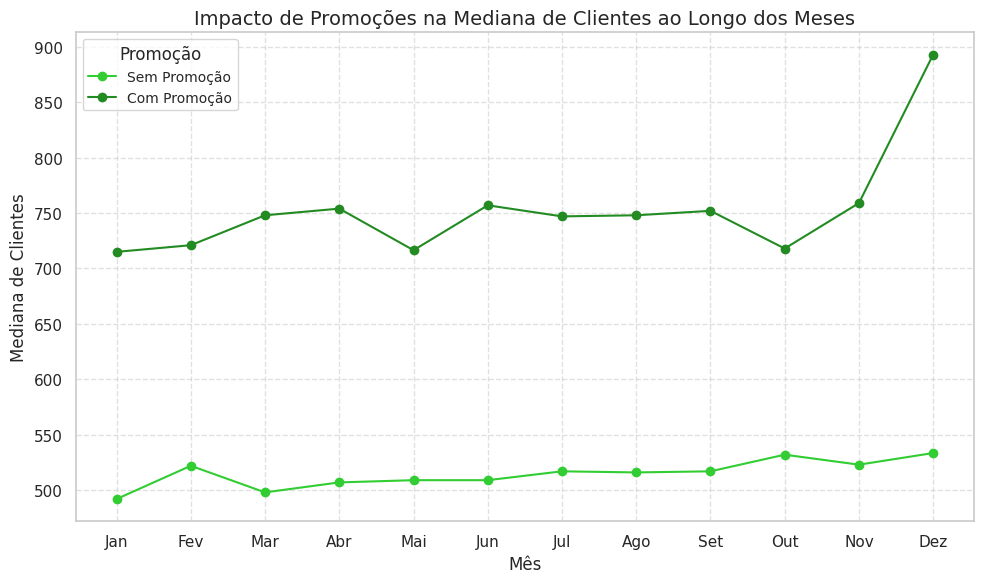

Month     1      2      3      4      5      6      7      8      9      10  \
Promo                                                                         
0      492.0  522.0  498.0  507.0  509.0  509.0  517.0  516.0  517.0  532.0   
1      715.0  721.0  748.0  754.0  716.5  757.0  747.0  748.0  752.0  718.0   

Month     11     12  
Promo                
0      523.0  533.5  
1      759.0  893.0

In [ ]:
# Selecionar apenas as colunas necessárias para a análise atual
relevant_data = base[['Promo', 'Date', 'Customers']].copy()

# Converter a coluna 'Date' para datetime e extrair o mês
relevant_data['Date'] = pd.to_datetime(relevant_data['Date'])
relevant_data['Month'] = relevant_data['Date'].dt.month

# Agrupar os dados pela presença de promoção e pelo mês
promo_monthly = relevant_data.groupby(['Promo', 'Month'])['Customers'].median().unstack()

# Criar o gráfico de linha para visualizar o impacto ao longo dos meses
plt.figure(figsize=(10, 6))
for promo, label, color in zip([0, 1], ['Sem Promoção', 'Com Promoção'], ['limegreen', 'forestgreen']):
    plt.plot(promo_monthly.columns, promo_monthly.loc[promo], marker='o', label=label, color=color)

plt.title('Impacto de Promoções na Mediana de Clientes ao Longo dos Meses', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Mediana de Clientes', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title='Promoção', fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

promo_monthly

Podemos notar que existe uma diferença consistente entre os meses com promoções ativas (Promo = 1) e sem promoções (Promo=0). Ainda em algumas épocas do ano, como época de fim de ano, de novembro a dezembro as vendas crescem drasticamente, apresentando variações maiores, devido a sazonalidade e estratégias promocionais específicas

##### Investigação das 10 lojas com mais clientes em dias de promoção


In [ ]:
# Filtrar os dados para considerar apenas os dias com promoção
promo_data = base[base['Promo'] == 1]

# Agrupar por loja (considerando que a coluna 'Store' identifica as lojas)
top_stores_promo = promo_data.groupby('Store')['Customers'].median().sort_values(ascending=False)

# Exibir as 10 lojas com mais clientes em dias de promoção
top_10_stores = top_stores_promo.head(10)
print(top_10_stores)

# Criar um gráfico de barras para visualizar as lojas com mais clientes (colunas verdes)
plt.figure(figsize=(12, 6))
top_10_stores.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 Lojas com Mais Clientes em Dias de Promoção', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Total de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

As lojas 733, 817 e 562 são líderes em número de clientes durante dias de promoção, sugerindo que elas têm maior capacidade de atrair tráfego com promoções. Isso pode estar relacionado a fatores como localização, tamanho ou perfil do público.

Existe uma diferença significativa entre as lojas do topo (por exemplo loja 733) e as do final da lista (loja 259). Essa discrepância pode indicar que algumas lojas aproveitam promoções de forma mais eficiente, ou que possuem uma base de clientes maior.

##### Análise geral das promoções pelo tipo das lojas


In [ ]:
# Agrupar os dados por tipo de loja e presença de promoção, somando o número de clientes
storetype_promo = base.groupby(['StoreType', 'Promo'])['Customers'].median().unstack()

# Criar um gráfico de barras agrupadas para comparar o impacto de promoções por tipo de loja
storetype_promo.plot(kind='bar', figsize=(10, 6), color=['limegreen', 'forestgreen'], alpha=0.85, width=0.7)
plt.title('Impacto de Promoções por Tipo de Loja', fontsize=14)
plt.xlabel('Tipo de Loja', fontsize=12)
plt.ylabel('Mediana dos Clientes', fontsize=12)
plt.legend(title='Promoção', labels=['Sem Promoção', 'Com Promoção'], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

storetype_promo

Tipo de Loja "b":

Possui o maior mediana de clientes, tanto em dias com quanto sem promoções, destacando-se como o tipo de loja mais movimentado. As promoções têm um impacto significativo, mas a diferença entre dias com e sem promoção é relativamente menor.

Tipo de Loja "d":

Apresenta o menor volume total de clientes, e os dias sem promoções atraem ainda menos clientes do que os dias com promoções. Isso pode indicar menor eficácia das promoções para este tipo de loja, ou um perfil de cliente menos sensível a promoções.

Tipos de Loja "a" e "c":

Têm um volume de clientes intermediário, com "a" e "c" apresentando uma diferenã consideravel entre dias com e sem promoção. As promoções parecem ser menos eficazes para o tipo "d" em termos de impacto relativo.

### Variável 'DayOfWeek' - Correlações Negativas

#### DayOfWeek x Vendas

In [ ]:
# Agrupar as vendas por dia da semana
sales_by_day = base.groupby('DayOfWeek')['Sales'].sum().reset_index()

# Criar gráfico de barras
fig_sales_by_day = px.bar(
    sales_by_day,
    x='DayOfWeek',
    y='Sales',
    title='Distribuição de Vendas por Dia da Semana',
    labels={'Sales': 'Total de Vendas', 'DayOfWeek': 'Dia da Semana'},
    color='Sales',
    color_continuous_scale="Viridis")

# Mudar os valores do eixo x para os nomes dos dias da semana
fig_sales_by_day.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7],
        ticktext=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']))

fig_sales_by_day.update_layout(xaxis_title='Dia da Semana', yaxis_title='Vendas Totais')
fig_sales_by_day.show()

**Insight:**

O gráfico evidencia que a segunda-feira é o principal dia de vendas, com um volume aproximadamente 100 milhões maior do que o registrado na terça-feira, que ocupa a segunda posição em totalização de vendas.

Por outro lado, o domingo se destaca negativamente como o dia com menor volume de vendas, apresentando uma diferença superior a 1 bilhão em comparação à segunda-feira.

Para compreender melhor o comportamento das vendas ao longo da semana, analisaremos o próximo gráfico, que considera a mediana das vendas por dia da semana. Essa abordagem nos ajudará a identificar possíveis variações e padrões mais consistentes, eliminando distorções causadas por valores extremos.

In [ ]:
median_sales = base.groupby('DayOfWeek')['Sales'].median().reset_index()

fig = px.bar(
    median_sales,
    x='DayOfWeek',
    y='Sales',
    title='Mediana de Vendas por Dia da Semana',
    labels={'DayOfWeek': 'Dia da Semana', 'Sales': 'Mediana de Vendas'},
    color='Sales',
    color_continuous_scale="Viridis"
)

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7],
        ticktext=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']))

fig.update_layout(xaxis_title='Dia da Semana', yaxis_title='Mediana de Vendas')
fig.show()

**Insight:**

Com a análise da mediana, podemos observar que o domingo apresenta uma mediana de 0 vendas, o que pode estar relacionado ao fechamento das lojas nesse dia. Essa hipótese será explorada no próximo tópico, onde investigaremos a relação entre o status de abertura das lojas e o volume de vendas.

A segunda-feira continua sendo o dia com a maior mediana de vendas, reforçando a recomendação de investir em estratégias de marketing específicas para atrair mais clientes nesse dia. Por exemplo, ações promocionais podem ser anunciadas no domingo para incentivar o público a realizar compras na segunda-feira.

Na próxima etapa, analisaremos a mediana das vendas por dia da semana, aplicando um filtro para separar os dados com base nos diferentes tipos de loja. Isso permitirá uma visão mais segmentada e estratégica.

##### DayOfWeek x Vendas x StoreType

In [ ]:
# Calculando a mediana de vendas por dia da semana e tipo de loja
median_sales_by_store = base.groupby(['DayOfWeek', 'StoreType'])['Sales'].median().reset_index()

# Criando o gráfico de barras diferenciando por tipo de loja
fig = px.bar(
    median_sales_by_store,
    x='DayOfWeek',
    y='Sales',
    color='StoreType',
    title='Mediana de Vendas por Dia da Semana e Tipo de Loja',
    labels={'DayOfWeek': 'Dia da Semana', 'Sales': 'Mediana de Vendas', 'StoreType': 'Tipo de Loja'},
    barmode='group',  # Barras lado a lado para comparação
    color_discrete_sequence=px.colors.qualitative.Set2  # Paleta de cores
)

# Ajustando os rótulos dos dias da semana
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7],
        ticktext=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
    ),
    xaxis_title='Dia da Semana',
    yaxis_title='Mediana de Vendas'
)

# Exibindo o gráfico
fig.show()


**Insight:**

- É possível observar que, embora as distribuições de vendas sejam semelhantes entre os tipos de lojas, a Loja A apresenta uma queda significativa nas vendas aos sábados, destoando do comportamento esperado. Esse padrão pode indicar fatores específicos impactando negativamente o desempenho, como mudanças no comportamento dos clientes, falta de promoções atrativas ou desafios operacionais. É essencial investigar essas possíveis causas para corrigir essa discrepância.

- Para as Lojas A, C e D, é recomendável explorar estratégias para potencializar o desempenho nos dias úteis, aproveitando a estabilidade observada. Além disso, seria interessante avaliar a possibilidade de abrir aos domingos, considerando que a Loja B apresenta um desempenho expressivo nesse dia, evidenciando uma oportunidade para atrair mais clientes e aumentar as vendas.

In [ ]:
# Calculando a mediana de vendas por dia da semana, tipo de loja, Promo e Promo2
median_sales_by_promo = base.groupby(['DayOfWeek', 'StoreType', 'Promo', 'Promo2'])['Sales'].median().reset_index()

# Criando o gráfico de barras agrupado
fig = px.bar(
    median_sales_by_promo,
    x='DayOfWeek',
    y='Sales',
    color='StoreType',
    facet_col='Promo',
    facet_row='Promo2',
    title='Mediana de Vendas por Dia da Semana, Tipo de Loja e Promoções',
    labels={
        'DayOfWeek': 'Dia da Semana',
        'Sales': 'Mediana de Vendas',
        'StoreType': 'Tipo de Loja',
        'Promo': 'Promo',
        'Promo2': 'Promo2'
    },
    barmode='group',  # Barras lado a lado para cada StoreType
    color_discrete_sequence=px.colors.qualitative.Set2  # Paleta de cores
)

# Ajustando os rótulos dos dias da semana
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7],
        ticktext=['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']
    ),
    xaxis_title='Dia da Semana',
    yaxis_title='Mediana de Vendas'
)

# Exibindo o gráfico
fig.show()


**Insight:**

A Promo1 tem um impacto significativo nas vendas, especialmente quando não é combinada com a Promo2. Isso indica que promover a Promo1 de forma isolada pode ser uma estratégia mais eficaz. Além disso, promoções pontuais demonstram ser mais vantajosas do que promoções contínuas, uma vez que geram um pico de vendas sem diluir a percepção de valor ao longo do tempo. Considerando o sucesso dessa promoção durante a semana, uma extensão da Promo1 para os sábados poderia aumentar ainda mais o volume de vendas, aproveitando o potencial de demanda não atendida nos finais de semana.

#### DayOfWeek x Clientes

##### Análise geral da mediana de clientes por dias da semana

---



In [ ]:
# Análise da mediana de clientes por dia da semana e ano
median_customers_by_day_year = base.groupby(['Year', 'DayOfWeek'])['Customers'].median().reset_index()

# Obter os anos únicos na base de dados
years = median_customers_by_day_year['Year'].unique()

# Plotar gráficos separados para cada ano com Plotly Express
for year in years:
    data = median_customers_by_day_year[median_customers_by_day_year['Year'] == year]
    fig = px.bar(data, x='DayOfWeek', y='Customers', title=f'Mediana de Clientes por Dia da Semana - Ano {year}',
                 labels={'DayOfWeek': 'Dia da Semana', 'Customers': 'Mediana de Clientes'})
    fig.update_layout(
        xaxis_title='Dia da Semana',
        yaxis_title='Mediana de Clientes',
        title={
            'text': f'Mediana de Clientes por Dia da Semana - Ano {year}',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        template='plotly_dark'
    )
    fig.show()

sales_customers = base.groupby('DayOfWeek')[['Sales', 'Customers']].median().reset_index()
fig = px.scatter(sales_customers, x='Customers', y='Sales', color='DayOfWeek',
                 title='Relação entre Clientes e Vendas por Dia da Semana',
                 labels={'Customers': 'Mediana de Clientes', 'Sales': 'Mediana de Vendas'})
fig.update_layout(template='plotly_dark')
fig.show()

promo_customers = base.groupby(['DayOfWeek', 'Promo'])['Customers'].median().reset_index()
fig = px.bar(promo_customers, x='DayOfWeek', y='Customers', color='Promo',
             title='Mediana de Clientes por Dia da Semana e Promoção',
             labels={'DayOfWeek': 'Dia da Semana', 'Customers': 'Mediana de Clientes', 'Promo': 'Promoção'})
fig.update_layout(template='plotly_dark')
fig.show()

É possível compreendermos os gráficos e tirarmos algumas respostas, foi possível identificar onde os dias da semana são 7 = Domingo. A mediana dos clientes mantém se em 0, para tentarmos entender esse fator, criamos outra análise, agora abordando a relação entre o número dos clientes com a vendas em dias da semana, o que foi visto é que esse número em dias da semana = 7 até mesmo quando analisamos pelos dias em promoção esse valor permanece. O que dá a entender é que as lojas não abrem aos domingos nem ao menos em dias de promoções. Entretanto vamos averiguar se é isso que ocorre.

Além disso, podemos verificar que existe uma forte tendência das vendas serem mais presentes nas segundas feiras (DayOfWeek = 1), que pode ser que as lojas possuam planos de marketing voltados para início de semana e nas sextas, onde as vendas voltam novamente a subir, em todos os anos a mediana de clientes se manteve estável.

##### Análise da relação entre os clientes pelo tipo de loja e dias da semana

In [ ]:
# Análise da mediana de clientes por dia da semana e tipo de loja
median_customers_by_day_store_type = base.groupby(['DayOfWeek', 'StoreType'])['Customers'].median().reset_index()

# Plotar o gráfico com Plotly Express
fig = px.bar(median_customers_by_day_store_type, x='DayOfWeek', y='Customers', color='StoreType',
             title='Mediana de Clientes por Dia da Semana e Tipo de Loja',
             labels={'DayOfWeek': 'Dia da Semana', 'Customers': 'Mediana de Clientes', 'StoreType': 'Tipo de Loja'})

# Estilizar o gráfico com Plotly Express
fig.update_layout(
    xaxis_title='Dia da Semana',
    yaxis_title='Mediana de Clientes',
    title={
        'text': 'Mediana de Clientes por Dia da Semana e Tipo de Loja',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    template='plotly_dark'
)

fig.show()

sales_customers_store_type = base.groupby(['DayOfWeek', 'StoreType'])[['Sales', 'Customers']].median().reset_index()
fig = px.scatter(sales_customers_store_type, x='Customers', y='Sales', color='StoreType',
                 title='Relação entre Clientes e Vendas por Tipo de Loja',
                 labels={'Customers': 'Mediana de Clientes', 'Sales': 'Mediana de Vendas'})
fig.update_layout(template='plotly_dark')
fig.show()

Aqui conseguimos notar que as lojas de tipo **"B"** abrem aos domingos e logo em seguida vemos que elas tem ótimos números de vendas, o que demonstra que as lojas de tipo **"B"** possuem um atrativo melhor para clientes

Existe ainda uma certa equivalência entre as lojas de tipo **"A"** e **"C"**

##### Análise do número de lojas que são abertas aos domingos

In [ ]:
# Verificar a coluna 'Open' aos domingos
sundays_open = base[base['DayOfWeek'] == 7]['Open'].value_counts()

# Transformar o gráfico de barras em um gráfico de rosca
fig = px.pie(sundays_open, values=sundays_open.values, names=sundays_open.index, hole=0.4,
             title='Lojas Abertas aos Domingos')

# Estilizar o gráfico com Plotly Express
fig.update_layout(
    title={
        'text': 'Lojas Abertas aos Domingos',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    template='plotly_dark'
)
fig.show()

Podemos ver o números de lojas que são abertas aos domingos, essas todas sendo do tipo de loja **"B"**

##### Análise da ligação entre clientes e distância da concorrência

In [ ]:
# Filtrar os dados para dias de semana (excluindo domingos)
weekday_data = base[base['DayOfWeek'] != 7]

# Análise da mediana de clientes por distância da concorrência
median_customers_by_competition_distance = weekday_data.groupby('CompetitionDistance')['Customers'].median().reset_index()

# Plotar o gráfico com Plotly Express
fig = px.scatter(median_customers_by_competition_distance, x='CompetitionDistance', y='Customers', title='Mediana de Clientes por Distância da Concorrência em Dias de Semana',
                 labels={'CompetitionDistance': 'Distância da Concorrência', 'Customers': 'Mediana de Clientes'})
fig.update_layout(
    xaxis_title='Distância da Concorrência',
    yaxis_title='Mediana de Clientes',
    title={
        'text': 'Mediana de Clientes por Distância da Concorrência',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    template='plotly_dark'
)
fig.show()



A análise pode revelar como a proximidade de concorrentes afeta o número de clientes. Por exemplo, lojas mais próximas de concorrentes podem ter menos clientes devido à competição direta, mas aqui, não é o caso, as lojas se beneficiam de lojas de concorrentes próximos.

##### Análise do levantamento de clientes entra dias da semana e mês para cada ano

In [ ]:
# Análise da mediana de clientes por dia da semana e mês para cada ano
median_customers_by_day_month_year = base.groupby(['Year', 'Month', 'DayOfWeek'])['Customers'].median().reset_index()

# Obter os anos únicos na base de dados
years = median_customers_by_day_month_year['Year'].unique()

# Plotar gráficos separados para cada ano com Plotly Express
for year in years:
    data = median_customers_by_day_month_year[median_customers_by_day_month_year['Year'] == year]
    fig = px.line(data, x='Month', y='Customers', color='DayOfWeek', title=f'Mediana de Clientes por Dia da Semana e Mês - Ano {year}',
                  labels={'Month': 'Mês', 'Customers': 'Mediana de Clientes', 'DayOfWeek': 'Dia da Semana'})
    fig.update_layout(
        xaxis_title='Mês',
        yaxis_title='Mediana de Clientes',
        title={
            'text': f'Mediana de Clientes por Dia da Semana e Mês - Ano {year}',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        template='plotly_dark'
    )
    fig.show()



#### DayOfWeek x Open

Análise de lojas abertas e fechadas por dia da semana

In [ ]:
# Fazendo a contagem das lojas abertas por dia da semana
df_grouped = base.groupby('DayOfWeek')['Open'].value_counts().unstack()
# Configurando os detalhes do gráfico
df_grouped.plot(kind='bar',color=['#7ff641', '#1da900'])
# Exibindo o resultado
plt.title('Contagem de Lojas Abertas e Fechadas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Contagem', fontsize=12)

Média de lojas abertas com promoção durante os feriados escolares

In [ ]:
# Descobrindo a média de lojas abertas com promoção durantes os feriados escolares
proportion_open_promo = base[base['Promo'] == 1]['Open'].mean()
proportion_open_school_holiday = base[base['SchoolHoliday'] == 1]['Open'].mean()
# Exibindo o resultado
print('Proporção de lojas abertas durante promoções:', proportion_open_promo)
print('Proporção de lojas abertas durante feriados escolares:', proportion_open_school_holiday)

Proporção de lojas abertas durante promoções: 0.9711811997526283
Proporção de lojas abertas durante feriados escolares: 0.8994942796924956


In [ ]:
# Calculando a média
proportion_open_by_day_promo = base[base['Promo'] == 1].groupby('DayOfWeek')['Open'].mean()
proportion_open_by_day_school_holiday = base[base['SchoolHoliday'] == 1].groupby('DayOfWeek')['Open'].mean()
proportion_open_by_day_state_holiday = base[base['StateHoliday'] != 1].groupby('DayOfWeek')['Open'].mean()


# Exibindo os resultados
print("Proporção de lojas abertas durante promoções por dia da semana:")
print(proportion_open_by_day_promo)

print("\nProporção de lojas abertas durante feriados escolares por dia da semana:")
print(proportion_open_by_day_school_holiday)

print("\nProporção de lojas abertas durante feriados do estado por dia da semana:")
print(proportion_open_by_day_state_holiday)


Proporção de lojas abertas durante promoções por dia da semana:
DayOfWeek
1    0.993351
2    0.994045
3    0.982947
4    0.955440
5    0.930072
Name: Open, dtype: float64

Proporção de lojas abertas durante feriados escolares por dia da semana:
DayOfWeek
1    0.907780
2    0.968001
3    0.934375
4    0.868593
5    0.876749
6    0.998164
7    0.030103
Name: Open, dtype: float64

Proporção de lojas abertas durante feriados do estado por dia da semana:
DayOfWeek
1    0.950459
2    0.988309
3    0.974400
4    0.923199
5    0.950598
6    0.995357
7    0.024826
Name: Open, dtype: float64


In [ ]:
# Calculando a mediana de lojas abertas durante promoções, feriados escolares e feriados do estado por dia da semana
median_open_by_day_promo = base[base['Promo'] == 1].groupby('DayOfWeek')['Open'].median()
median_open_by_day_school_holiday = base[base['SchoolHoliday'] == 1].groupby('DayOfWeek')['Open'].median()
median_open_by_day_state_holiday = base[base['StateHoliday'] != 1].groupby('DayOfWeek')['Open'].median()

# Exibindo os resultados
print("Mediana de lojas abertas durante promoções por dia da semana:")
print(median_open_by_day_promo)

print("\nMediana de lojas abertas durante feriados escolares por dia da semana:")
print(median_open_by_day_school_holiday)

print("\nMediana de lojas abertas durante feriados estaduais por dia da semana:")
print(median_open_by_day_state_holiday )

**Conclusões**

1. Promoções e Abertura de Lojas:


- A mediana de lojas abertas durante promoções sugere que, para a maioria dos dias da semana, as promoções têm um impacto positivo na abertura das lojas.
Esse padrão indica que promoções são consistentes em atrair movimento, justificando estratégias de marketing regulares.


2. Feriados Escolares e Abertura de Lojas:


- A mediana de lojas abertas durante feriados escolares é menor do que durante promoções, indicando que feriados escolares podem influenciar negativamente a abertura de lojas.
Possivelmente, isso se deve a uma menor movimentação de clientes em regiões onde há maior dependência de famílias com crianças em idade escolar.


3. Feriados Estaduais e Abertura de Lojas:


- A mediana de lojas abertas durante feriados estaduais é ainda menor em alguns casos, sugerindo que esses períodos têm impacto negativo mais acentuado.
Pode-se inferir que lojas em áreas mais dependentes de atividades comerciais locais são mais impactadas.

4. Dias da Semana:

- A relação entre dias da semana e a abertura de lojas é consistente:
Segunda a sexta-feira mostram maior mediana de abertura, reforçando que os dias úteis têm maior fluxo de operação das lojas.
Nos finais de semana, as aberturas caem, especialmente em feriados.

**Estratégias Baseadas nos Dados**

- Promoções: Incrementar promoções em períodos de menor movimento, como feriados estaduais e finais de semana, para estimular a abertura e a movimentação de lojas.

- Planejamento Regional: Identificar regiões mais impactadas por feriados estaduais e escolares para implementar campanhas específicas, como descontos direcionados ou eventos temáticos.

- Gestão de Operações: Considerar fechar lojas em regiões com baixíssima movimentação durante feriados, otimizando custos.


Mediana e Proporção de Lojas Abertas Durante Feriados Estaduais por Dia da Semana


Proporção de Lojas Abertas Durante Feriados Estaduais:

A proporção de lojas abertas varia entre os dias da semana:

Segunda-feira (1): 95.05%
Terça-feira (2): 98.83%
Quarta-feira (3): 97.44%
Quinta-feira (4): 92.32%
Sexta-feira (5): 95.06%
Sábado (6): 99.54%
Domingo (7): 2.48%

Durante a semana (segunda a sábado), há uma alta proporção de lojas abertas, variando entre 92% e 99%, com destaque para sábados, onde quase todas as lojas permanecem abertas.
Aos domingos, a proporção de lojas abertas cai drasticamente para 2.48%, o que confirma a tendência observada na mediana.


#**Análise do impacto da concorrência para os 4 tipos de loja**

## **Loja A**

###**Análise da relação entre *concorrência* e *vendas***

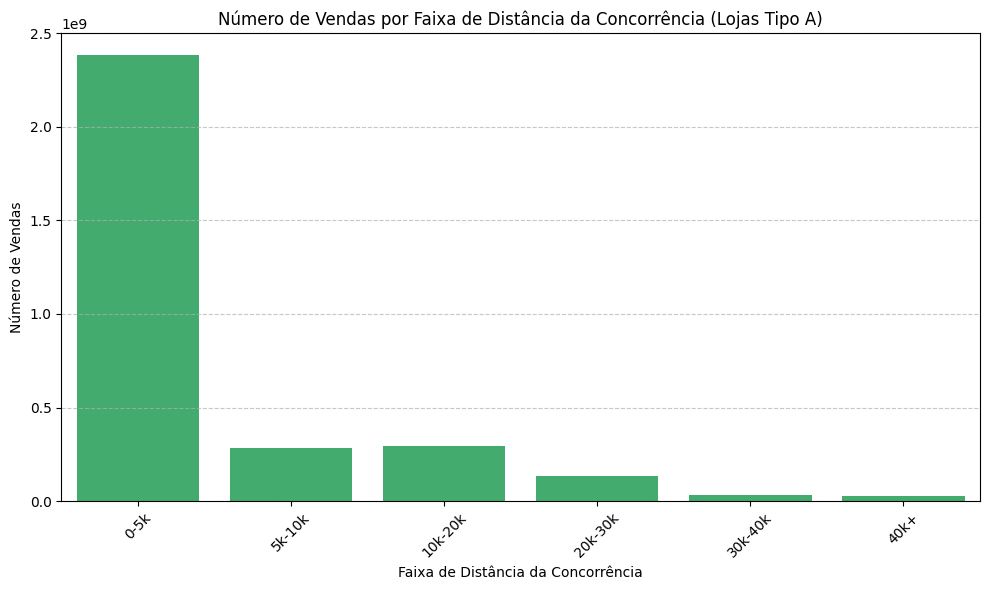

In [ ]:
# Filtra os dados apenas para lojas do tipo 'A'
store_type_a = base[base['StoreType'] == 'a'].copy()

# Converte CompetitionDistance para numérico
store_type_a['CompetitionDistance'] = pd.to_numeric(store_type_a['CompetitionDistance'], errors='coerce')

# Criando faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, store_type_a['CompetitionDistance'].max()]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_a['DistanceGroup'] = pd.cut(
    store_type_a['CompetitionDistance'],
    bins=bins,
    labels=labels,
    right=False
)

# Calculando o número total de vendas por faixa de distância
distance_group_sales = store_type_a.groupby('DistanceGroup', observed=False)['Sales'].sum()

# Criando o gráfico de barras com o número de vendas por faixa de distância
plt.figure(figsize=(10, 6))
sns.barplot(
    x=distance_group_sales.index,
    y=distance_group_sales.values,
    color="#31bc6a"  # Cor verde
)

# Ajustando títulos e rótulos
plt.title("Número de Vendas por Faixa de Distância da Concorrência (Lojas Tipo A)")
plt.xlabel("Faixa de Distância da Concorrência")
plt.ylabel("Número de Vendas")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


**Conclusões:**


1.  Maior número de vendas para lojas com concorrência mais próxima (0-5k):

* As lojas localizadas mais próximas de seus concorrentes apresentam o maior volume de vendas, muito acima das outras faixas de distância.

* Isso indica que concorrência geográfica próxima atrai mais clientes devido à maior concentração de comércio e opções. Além disso, zonas mais próximas a concorrentes podem estar em regiões mais densas ou urbanizadas.

2. Redução significativa de vendas com o aumento da distância:

* Conforme a distância da concorrência aumenta, o número de vendas diminui muito.

* Isso pode indicar que a presença de concorrentes influencia positivamente o tráfego de consumidores para as lojas.

* Em distâncias superiores a 30 km da concorrência, as vendas se tornam muito menores e estabilizam, sugerindo que áreas com pouca competição têm menos demanda.

**Insights**:

1. Proximidade com a Concorrência (0-5 k):

* Embora as vendas totais sejam altas, é importante analisar a rentabilidade, pois a alta competição pode levar a preços mais baixos ou maior investimento em promoções.

* Estratégias de diferenciação (sortimento, promoções, experiência do cliente) são fundamentais.

2. Zonas de Distância Intermediária (20-30 k):

* Estas áreas parecem ser as mais vantajosas para maximizar vendas médias por loja. Para isso, deve-se avaliar abertura de novas lojas em faixas semelhantes para explorar mercados menos saturados.

3. Zonas de distância maiores

* Lojas localizadas em áreas menos competitivas (acima de 20 k) podem precisar de promoções e estratégias de marketing mais agressivas para aumentar as vendas.

* Investir em análise demográfica para entender melhor as dinâmicas de cada região


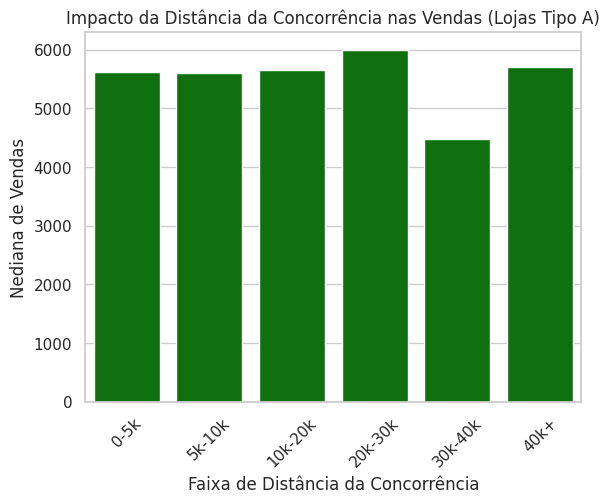

In [ ]:
# Calcula a mediana de vendas por faixa de distância
sales_by_distance = store_type_a.groupby('DistanceGroup', observed=False)['Sales'].median()

# Visualiza o gráfico
sns.barplot(x=sales_by_distance.index, y=sales_by_distance.values, color='green')
plt.title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo A)")
plt.ylabel("Mediana de Vendas")
plt.xlabel("Faixa de Distância da Concorrência")
plt.xticks(rotation=45)
plt.show()

**Conclusões:**

1. Consistência em distâncias curtas e medianas (0-30 km)

* As medianas de vendas são relativamente consistentes nas faixas de distância de 0-5 km, 5-10 km, 10-20 km, e 20-30 km, com valores variando pouco.

* Isso indica que, até 30 km de distância, a presença de concorrentes não influencia tanto a performance mediana por loja.

* Essas lojas podem estar localizadas em áreas com boa densidade populacional e/ou tráfego significativo de clientes.

2. Queda significativa na mediana de vendas entre 30-40 km

* A faixa de 30-40 km apresenta uma queda acentuada na mediana de vendas por loja.

* Possíveis razões:
  * Menor densidade populacional ou menor tráfego de clientes.
  * Áreas mais afastadas com menor atratividade comercial ou logística.
  * Concorrência indireta, como outras opções locais ou regionais.

3. Recuperação nas lojas a mais de 40 km (40+ km)

* A faixa de distância 40+ km apresenta uma recuperação expressiva na mediana de vendas, com valores próximos ou iguais às lojas mais próximas da concorrência (0-5 km).

* Possíveis explicações:
  * Nessas regiões, pode haver menor competição direta, fazendo com que essas lojas sejam as únicas opções disponíveis para os consumidores.
  * Demanda local elevada, mesmo em áreas menos densamente povoadas.

**Insights:**

1. Lojas em distâncias curtas ou medianas (0-30 km) se beneficiam de uma mediana de vendas estável e consistente. Estratégias nessas faixas podem focar em:

* Promoções e marketing para consolidar a competitividade.
* Diferenciação em relação aos concorrentes próximos.


2. Lojas na faixa 30-40 km apresentam a menor mediana de vendas e demandam atenção especial:

* Investimento em marketing e logística para atrair mais clientes.
* Avaliar se a localização ou o sortimento estão alinhados com a demanda local.

3. Lojas a mais de 40 km possuem uma boa mediana de vendas, sugerindo oportunidades para expansão e fidelização:

* Explorar o status de única opção disponível na região.

* Consolidar a base de clientes com programas de fidelidade ou promoções locais.


###**Análise da relação entre *concorrência*, *vendas* e *clientes***

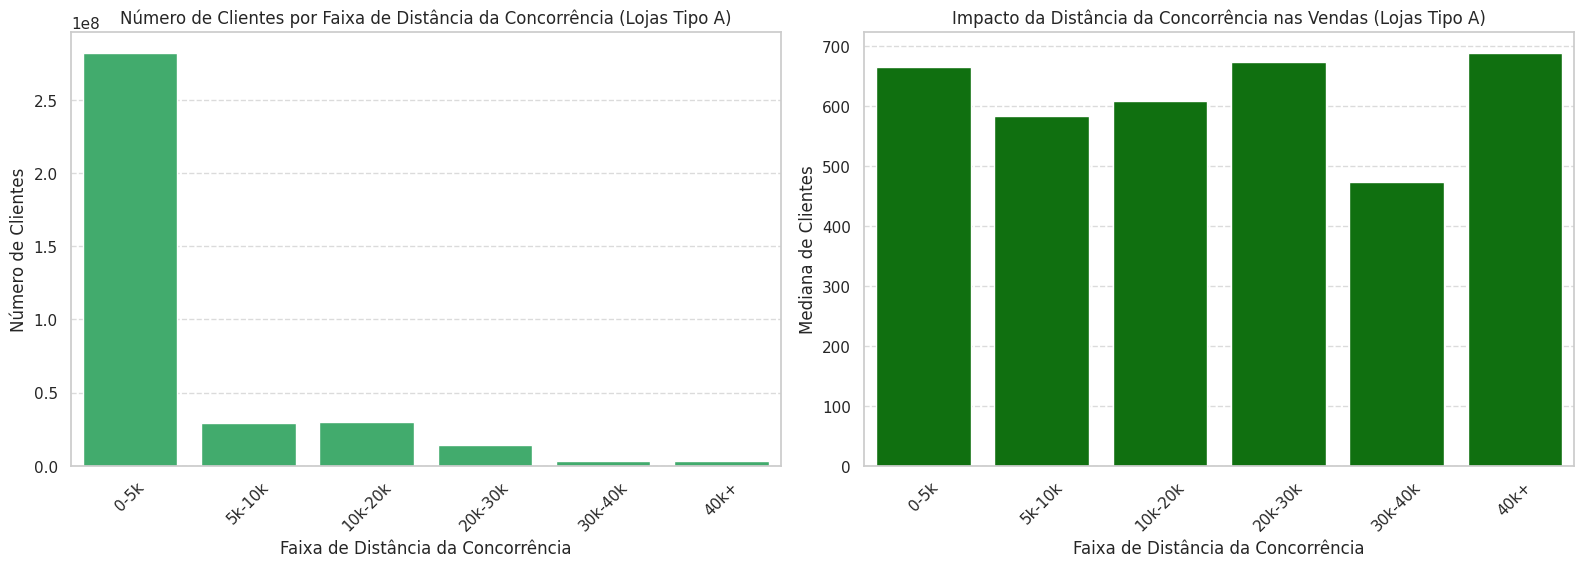

In [ ]:
# Filtra os dados apenas para lojas do tipo 'A'
store_type_a = base[base['StoreType'] == 'a'].copy()

# Converte CompetitionDistance para numérico
store_type_a['CompetitionDistance'] = pd.to_numeric(store_type_a['CompetitionDistance'], errors='coerce')

# Criando faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, store_type_a['CompetitionDistance'].max()]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_a['DistanceGroup'] = pd.cut(
    store_type_a['CompetitionDistance'],
    bins=bins,
    labels=labels,
    right=False
)

# Calculando o número total de clientes por faixa de distância
distance_group_customers = store_type_a.groupby('DistanceGroup', observed=False)['Customers'].sum()

# Calcula a mediana de vendas por faixa de distância
sales_by_distance = store_type_a.groupby('DistanceGroup', observed=False)['Customers'].median()

# Criando gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Gráfico 1: Número de clientes por faixa de distância
sns.barplot(
    x=distance_group_customers.index,
    y=distance_group_customers.values,
    color="#31bc6a",
    ax=axes[0]
)
axes[0].set_title("Número de Clientes por Faixa de Distância da Concorrência (Lojas Tipo A)")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].set_ylabel("Número de Clientes")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Mediana de clientes por faixa de distância
sns.barplot(
    x=sales_by_distance.index,
    y=sales_by_distance.values,
    color='green',
    ax=axes[1]
)
axes[1].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo A)")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].set_ylabel("Mediana de Clientes")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustando layout
plt.tight_layout()
plt.show()

**Conclusões**

1. Faixa 0-5 km (Proximidade à Concorrência):

* Número Total de Clientes: A maior concentração de clientes está em lojas nessa faixa, indicando alta densidade populacional e forte movimentação nessas regiões.

* Mediana de Clientes: Apresenta a maior mediana de clientes por loja (cerca de 700), reforçando a atratividade de áreas próximas à concorrência.

2. Faixas Intermediárias (5-20 km):

* Número Total de Clientes: O número de clientes diminui à medida que a distância da concorrência aumenta, mas ainda mantém uma quantidade significativa.

* Mediana de Clientes: As faixas intermediárias apresentam medianas de clientes estáveis (cerca de 600), indicando uma base de consumidores consistente.

3. Faixa 20-30 km:

* Número Total de Clientes: Continua a diminuir em relação às faixas mais próximas.

* Mediana de Clientes: Há uma recuperação nessa faixa, sugerindo que lojas em zonas intermediárias atendem a consumidores leais em áreas de menor densidade de concorrentes.

4. Faixas 30-40 km e 40+ km:

* Número Total de Clientes: Representam as menores concentrações de clientes, refletindo baixa densidade populacional ou menor atratividade comercial.

* mediana de Clientes:
  * 30-40 km: Apresenta a menor mediana de clientes (cerca de 500), sugerindo desafios operacionais ou baixa atratividade.
  
  * 40+ km: Surpreendentemente, há uma recuperação na mediana de clientes (cerca de 700), indicando que essas lojas atendem mercados exclusivos ou são as únicas opções disponíveis para consumidores locais.

**Insights**


1. Regiões Próximas à Concorrência (0-5 km):

* Estratégias de marketing agressivo e diferenciação de produtos podem maximizar o potencial dessas áreas, já que a alta densidade de concorrência não inibe a presença de clientes.

2. Áreas Intermediárias (5-20 km):

* Essas faixas oferecem estabilidade no fluxo de clientes, sendo ideais para expansão de operações.

* Monitorar a densidade populacional e o perfil de consumo local pode revelar oportunidades adicionais.

3. Desafios em Faixas de 30-40 km:

* A baixa mediana de clientes aponta a necessidade de ações para aumentar a atratividade, como campanhas promocionais, ajustes no sortimento ou serviços diferenciados.

* Avaliar a viabilidade de lojas nessa faixa pode ser necessário, dependendo da relação custo-benefício.

4. Oportunidades em Faixas Distantes (40+ km):

* Mercados exclusivos ou comunidades dependentes dessas lojas oferecem potencial para fidelização.

* Explorar um posicionamento estratégico, como atendimento a nichos ou oferta de produtos personalizados, pode aumentar a eficiência operacional.


###**Análise da relação entre *concorrência*, *vendas* e *promoção***


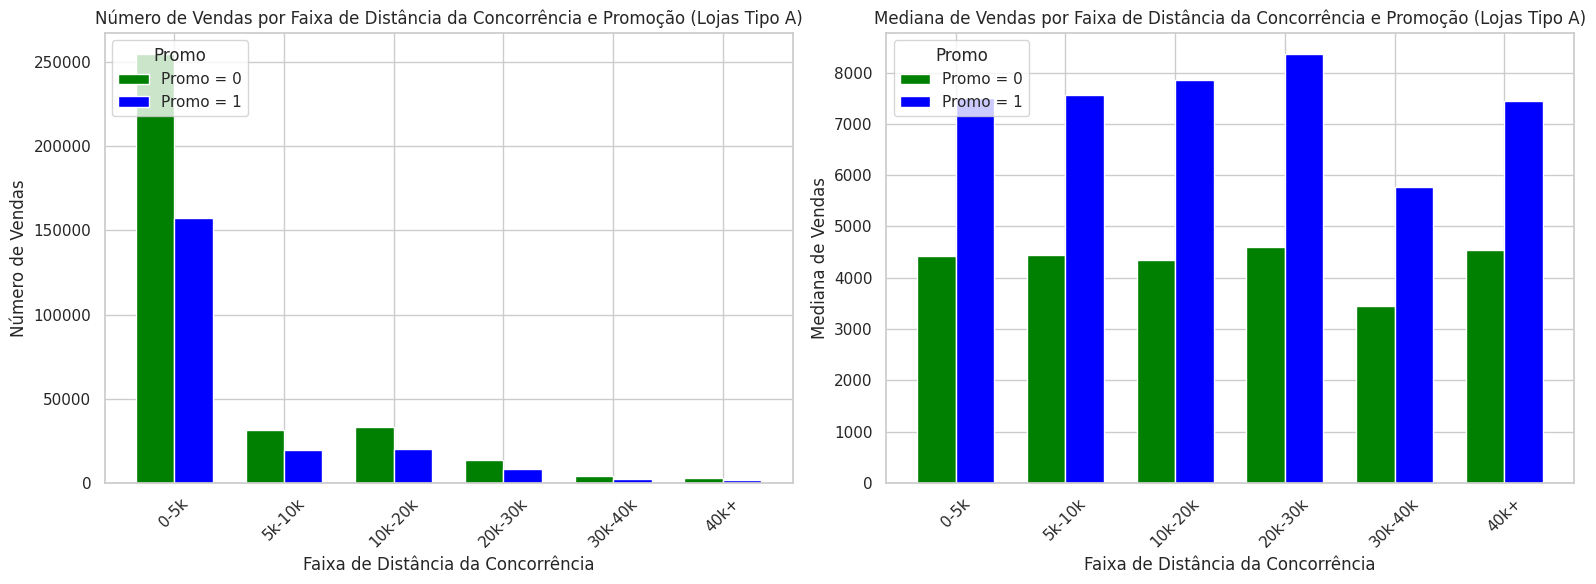

In [ ]:
# Filtra os dados apenas para lojas do tipo 'A'
store_type_a = base[base['StoreType'] == 'a'].copy()

# Converte CompetitionDistance para numérico e preenche valores ausentes com a mediana
store_type_a.loc[:, 'CompetitionDistance'] = pd.to_numeric(store_type_a['CompetitionDistance'], errors='coerce')

# Cria faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, store_type_a['CompetitionDistance'].max()]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_a['DistanceGroup'] = pd.cut(
    store_type_a['CompetitionDistance'],
    bins=bins,
    labels=labels,
    right=False  # Limites dos bins são inclusivos à esquerda
)

# Filtra os dados para Promo = 0 e Promo = 1
store_type_a_promo_0 = store_type_a[store_type_a['Promo'] == 0]
store_type_a_promo_1 = store_type_a[store_type_a['Promo'] == 1]

# Contando o número de vendas por faixa de distância e promoção
sales_count_promo_0_count = store_type_a_promo_0.groupby('DistanceGroup', observed=False)['Sales'].count()
sales_count_promo_1_count = store_type_a_promo_1.groupby('DistanceGroup', observed=False)['Sales'].count()

sales_count_promo_0_mean = store_type_a_promo_0.groupby('DistanceGroup', observed=False)['Sales'].median()
sales_count_promo_1_mean = store_type_a_promo_1.groupby('DistanceGroup', observed=False)['Sales'].median()

# Criando subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Gráfico 1: Número de vendas por faixa de distância e promoção
bar_width = 0.35
index = range(len(sales_count_promo_0_count))

axes[0].bar(index, sales_count_promo_0_count.values, bar_width, label='Promo = 0', color='green')
axes[0].bar([i + bar_width for i in index], sales_count_promo_1_count.values, bar_width, label='Promo = 1', color='blue')
axes[0].set_title("Número de Vendas por Faixa de Distância da Concorrência e Promoção (Lojas Tipo A)")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].set_ylabel("Número de Vendas")
axes[0].set_xticks([i + bar_width / 2 for i in index])
axes[0].set_xticklabels(sales_count_promo_0_count.index, rotation=45)
axes[0].legend(title='Promo', loc='upper left')

# Gráfico 2: Média de vendas por faixa de distância e promoção
index = range(len(sales_count_promo_0_mean))

axes[1].bar(index, sales_count_promo_0_mean.values, bar_width, label='Promo = 0', color='green')
axes[1].bar([i + bar_width for i in index], sales_count_promo_1_mean.values, bar_width, label='Promo = 1', color='blue')
axes[1].set_title("Mediana de Vendas por Faixa de Distância da Concorrência e Promoção (Lojas Tipo A)")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].set_ylabel("Mediana de Vendas")
axes[1].set_xticks([i + bar_width / 2 for i in index])
axes[1].set_xticklabels(sales_count_promo_0_mean.index, rotation=45)
axes[1].legend(title='Promo', loc='upper left')

# Ajustar layout
plt.tight_layout()
plt.show()


**Conclusões**

1. Impacto Geral das Promoções:

* As promoções (Promo = 1) têm um impacto significativo no aumento tanto do número total de vendas quanto da mediana de vendas por loja, independentemente da distância da concorrência.

* Lojas que realizam promoções consistentemente têm um desempenho superior, com uma diferença substancial em relação às lojas sem promoções.

2. Faixa de Distância 0-5 km (Alta Densidade de Concorrência):

* Número Total de Vendas: A maior concentração de vendas ocorre nesta faixa, especialmente para lojas sem promoções (Promo = 0). Isso pode indicar um alto fluxo de consumidores em regiões próximas à concorrência.

* mediana de Vendas: Lojas com promoções nesta faixa apresentam uma mediana de vendas significativamente maior, demonstrando que promoções são cruciais para captar a atenção em um mercado competitivo.

3. Faixas Intermediárias (5-30 km):

* Número Total de Vendas: A participação de vendas diminui progressivamente com o aumento da distância, mas promoções continuam a impulsionar números relevantes.

* mediana de Vendas: A mediana de vendas com promoções mantém-se alta e estável, enquanto as lojas sem promoções apresentam desempenho mais limitado.

4. Faixas Distantes (30-40 km e 40+ km):

* Número Total de Vendas: As vendas são menores em áreas distantes da concorrência, mas promoções ajudam a sustentar um volume relevante.

* mediana de Vendas: Lojas com promoções mantêm uma mediana elevada, chegando a superar áreas mais próximas à concorrência. Isso sugere que promoções são especialmente eficazes em mercados menos competitivos.


**Insights**

1. Promoções como Estratégia Essencial:

* Promoções são um diferencial crítico para aumentar vendas em todas as faixas de distância, especialmente em regiões com maior concorrência direta.

* Investir em promoções pode maximizar o desempenho de lojas em mercados saturados e em regiões distantes, onde a dependência de consumidores locais é maior.

2. Oportunidades em Áreas Distantes:

* Em faixas de distância maiores (30-40 km e 40+ km), promoções podem compensar a baixa densidade de consumidores e reduzir o impacto da concorrência remota.

* Lojas em áreas distantes devem adotar promoções contínuas para fidelizar consumidores e se posicionar como a melhor opção na região.

3. Foco em Mercados Competitivos (0-5 km):

* Promoções são essenciais para se destacar em mercados altamente competitivos, ajudando a captar consumidores que poderiam escolher concorrentes próximos.

4. Estabilidade em Faixas Intermediárias (5-30 km):

* Promoções mantêm o desempenho consistente em faixas intermediárias, indicando que essas regiões podem ser oportunidades de expansão e fortalecimento da marca.

---

####**Análise da relação entre *concorrência*, *vendas*, *promo* e *promo2***

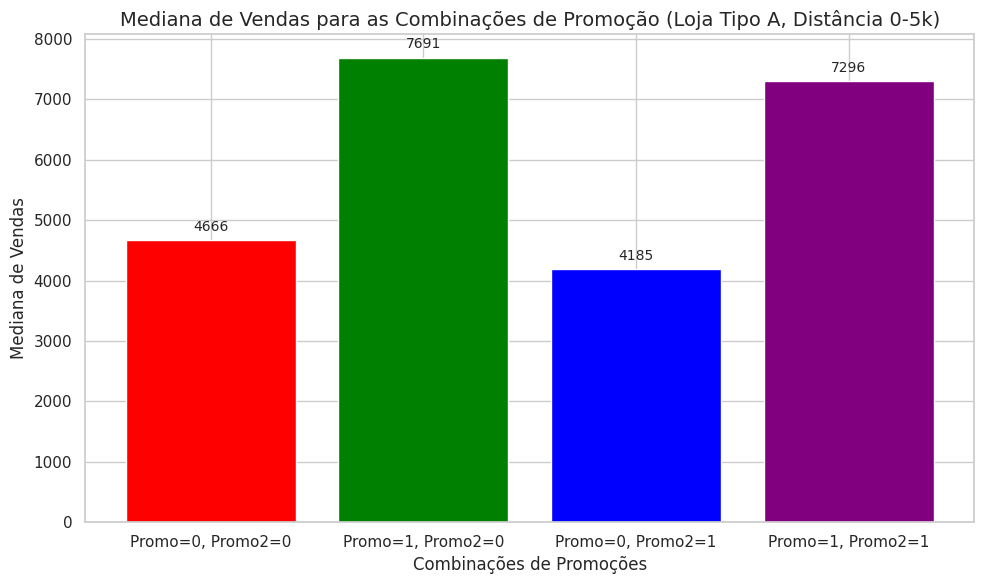

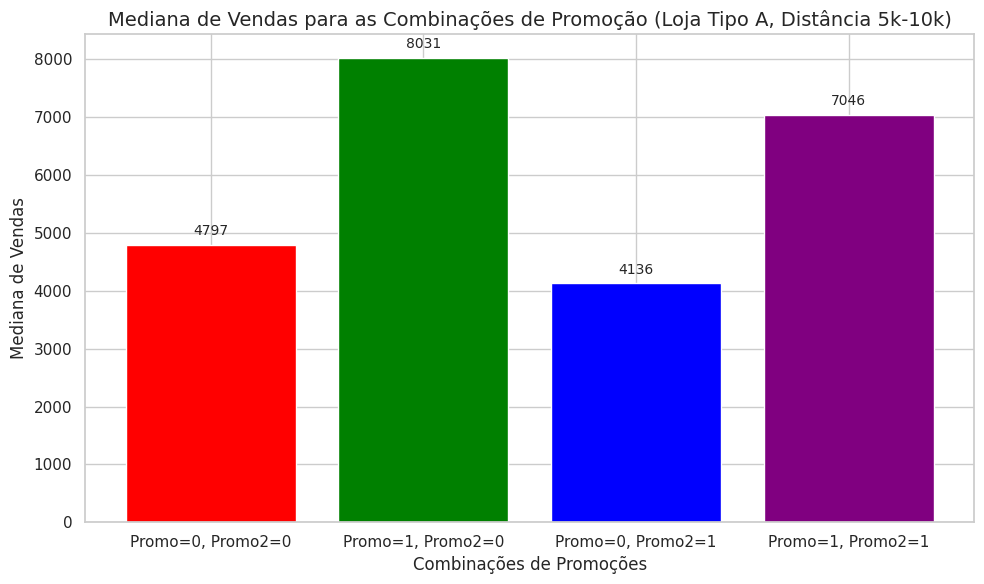

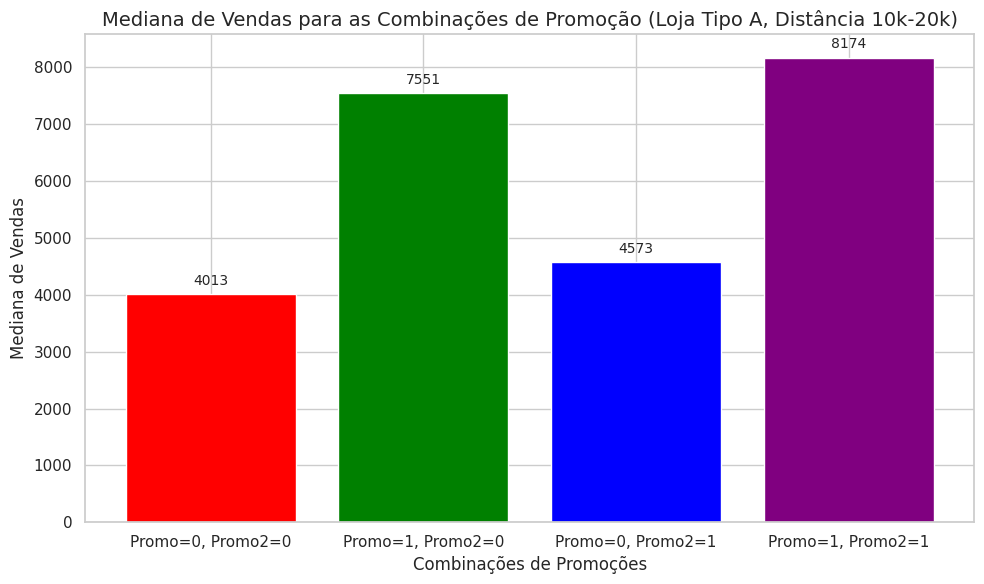

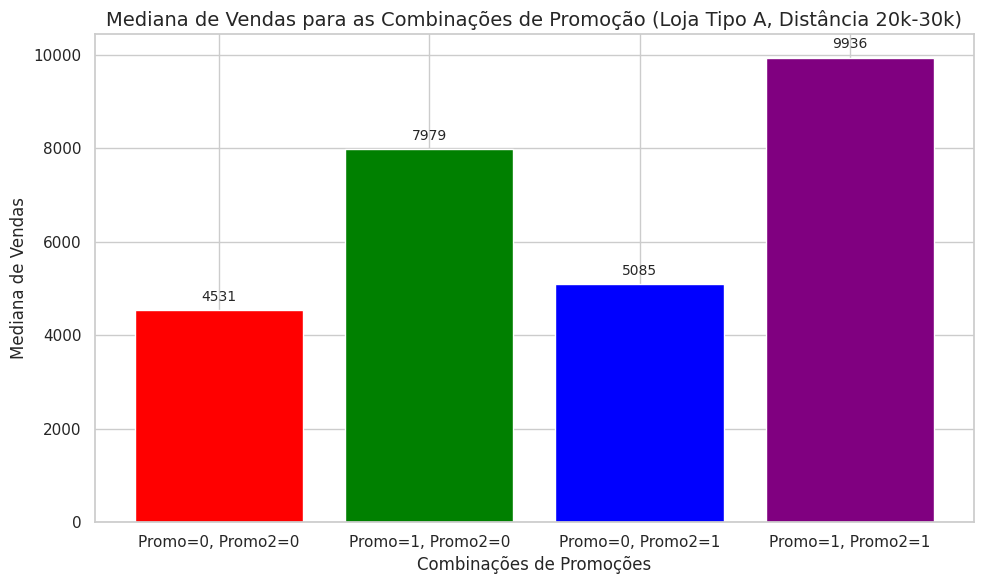

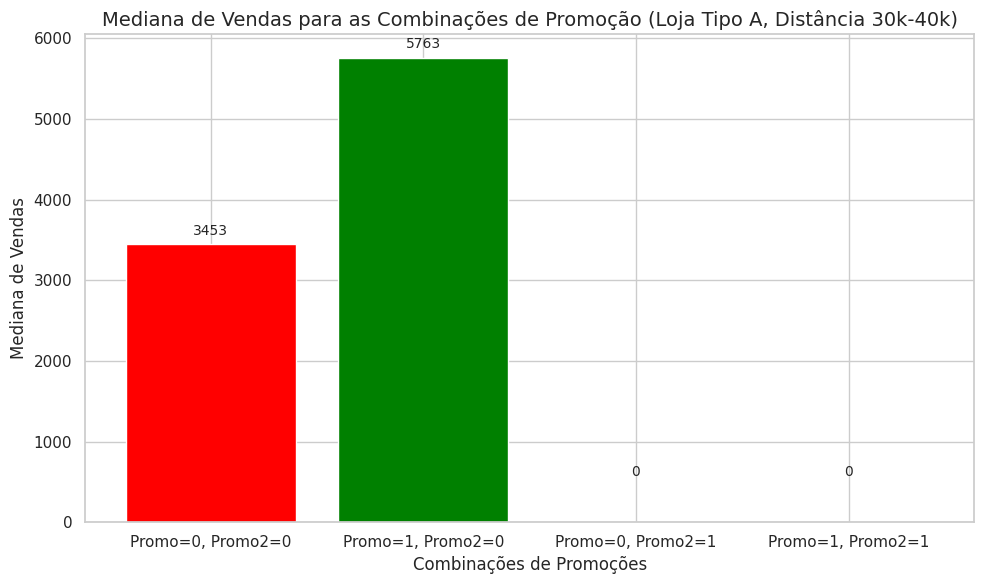

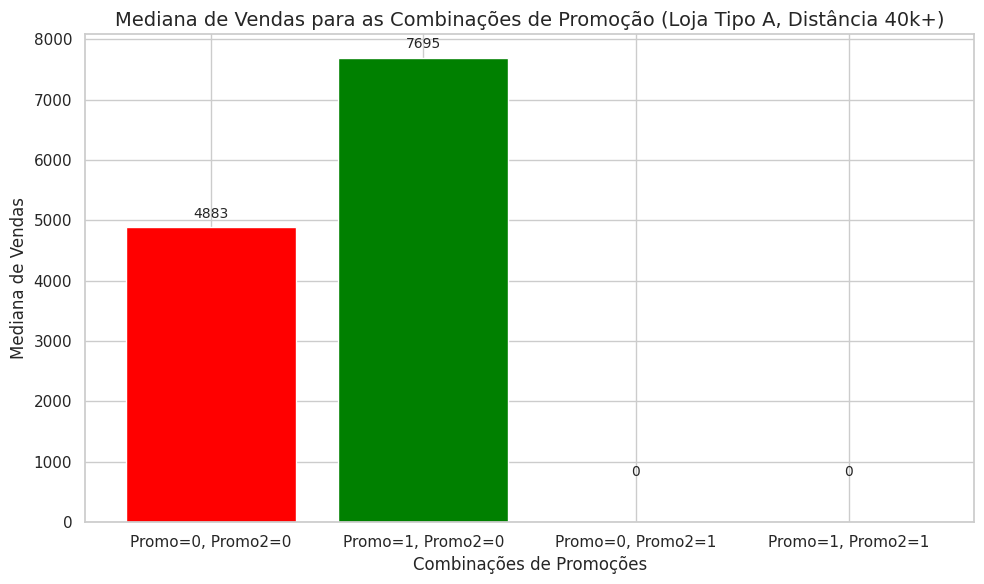

In [ ]:
# Definindo as faixas de distância e seus rótulos
bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

# Filtrando apenas para lojas do tipo A
store_type_a = base[base['StoreType'] == 'a']

# Iterando pelas faixas de distância para gerar gráficos
for distance_label in labels:
    # Filtrando os dados para a faixa de distância atual
    store_type_a_distance = store_type_a[store_type_a['DistanceGroup'] == distance_label]

    # Agrupar as vendas com base nas combinações de Promo e Promo2
    sales_promo_combinations = store_type_a_distance.groupby(['Promo', 'Promo2'])['Sales'].median().reset_index()

    # Garantindo que todas as combinações possíveis de Promo e Promo2 estejam presentes
    combinations = [(0, 0), (1, 0), (0, 1), (1, 1)]
    sales_values = []

    for promo, promo2 in combinations:
        sales_value = sales_promo_combinations[
            (sales_promo_combinations['Promo'] == promo) &
            (sales_promo_combinations['Promo2'] == promo2)
        ]['Sales'].sum()
        sales_values.append(sales_value)

    # Criando os rótulos para as barras
    promo_labels = ['Promo=0, Promo2=0', 'Promo=1, Promo2=0', 'Promo=0, Promo2=1', 'Promo=1, Promo2=1']

    # Gerando o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(promo_labels, sales_values, color=['red', 'green', 'blue', 'purple'])

    # Adicionando títulos e rótulos
    plt.title(f'Mediana de Vendas para as Combinações de Promoção (Loja Tipo A, Distância {distance_label})', fontsize=14)
    plt.xlabel('Combinações de Promoções', fontsize=12)
    plt.ylabel('Mediana de Vendas', fontsize=12)

    # Adicionando os valores acima das barras
    for i, value in enumerate(sales_values):
        plt.text(i, value + max(sales_values) * 0.02 if value > 0 else max(sales_values) * 0.1,
                 str(int(value)), ha='center', fontsize=10)

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

**Conclusões**

- Promoção tradicional (Promo = 1, Promo2 = 0) tem maior impacto em distâncias menores e maiores (0-10k)

- Promoções combinadas (Promo = 1, Promo2 = 1) funcionam melhor em distâncias intermediárias (10k-30k)

- A falta de registros para Promo = 0, Promo2 = 1 e Promo = 1, Promo2 = 1 em faixas de 30k+ pode indicar que, mesmo com promoções, o impacto é reduzido devido à localização muito distante da concorrência.

**Insights**

- Personalização de estratégias promocionais por faixa de distância:

  - Para lojas próximas aos concorrentes (0-10k), investir em promoções pontuais de alto impacto (Promo = 1) pode ser mais eficiente para atrair clientes em áreas onde a concorrência é forte.
  
  - Em áreas intermediárias (10k-30k), combinações de promoções contínuas e pontuais (Promo = 1, Promo2 = 1) são mais eficazes, sugerindo a importância de manter o cliente engajado ao longo do tempo.
  
  - Em áreas distantes dos concorrentes (30k+), promoções contínuas (Promo2 = 1) podem não ser uma boa estratégia. Em vez disso, foco em promoções pontuais. Ainda assim, talvez seja necessário redirecionar esforços para melhorar a experiência local para que as promoções contínuas gerem impacto significativo.

###**Análise da relação entre *concorrência*, *vendas* e *feriados/fechamento de escolas***

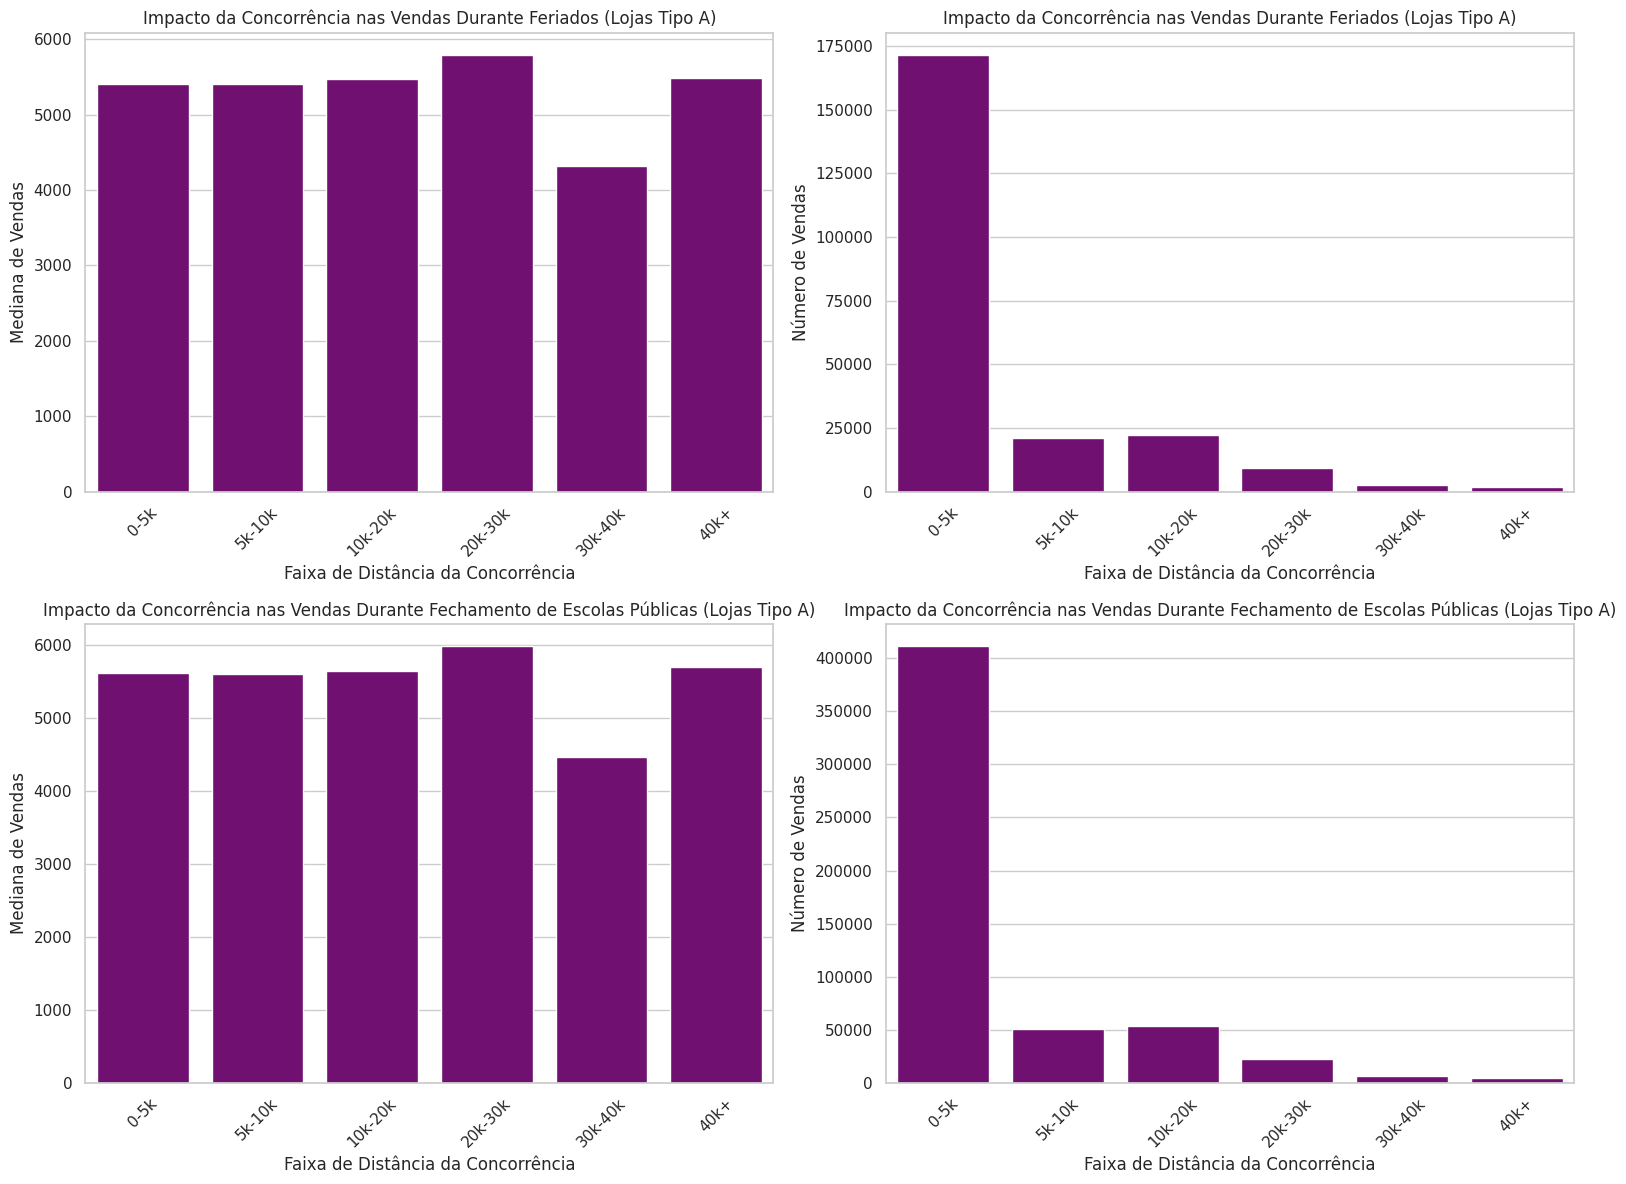

In [ ]:
# Filtra os dados apenas para lojas do tipo 'A' durante feriados estaduais e fechamento de escolas
store_type_a_holiday_state = base[(base['StoreType'] == 'a') & (base['StateHoliday'] != '0')]
store_type_a_holiday_school = base[(base['StoreType'] == 'a') & (base['SchoolHoliday'] != '0')]

# Cria faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, base['CompetitionDistance'].max()]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_a_holiday_state['DistanceGroup'] = pd.cut(store_type_a_holiday_state['CompetitionDistance'], bins=bins, labels=labels, right=False)
store_type_a_holiday_school['DistanceGroup'] = pd.cut(store_type_a_holiday_school['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Gráficos durante feriados estaduais
holiday_sales_state_mean = store_type_a_holiday_state.groupby('DistanceGroup', observed=False)['Sales'].median()
holiday_sales_state_count = store_type_a_holiday_state.groupby('DistanceGroup', observed=False)['Sales'].count()

# Gráficos durante fechamento de escolas públicas
holiday_sales_school_mean = store_type_a_holiday_school.groupby('DistanceGroup', observed=False)['Sales'].median()
holiday_sales_school_count = store_type_a_holiday_school.groupby('DistanceGroup', observed=False)['Sales'].count()

# Criação dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Média de Vendas durante feriados estaduais
sns.barplot(x=holiday_sales_state_mean.index, y=holiday_sales_state_mean.values, color='purple', ax=axes[0, 0])
axes[0, 0].set_title("Impacto da Concorrência nas Vendas Durante Feriados (Lojas Tipo A)")
axes[0, 0].set_ylabel("Mediana de Vendas")
axes[0, 0].set_xlabel("Faixa de Distância da Concorrência")
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Vendas durante feriados estaduais
sns.barplot(x=holiday_sales_state_count.index, y=holiday_sales_state_count.values, color='purple', ax=axes[0, 1])
axes[0, 1].set_title("Impacto da Concorrência nas Vendas Durante Feriados (Lojas Tipo A)")
axes[0, 1].set_ylabel("Número de Vendas")
axes[0, 1].set_xlabel("Faixa de Distância da Concorrência")
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Média de Vendas durante fechamento de escolas públicas
sns.barplot(x=holiday_sales_school_mean.index, y=holiday_sales_school_mean.values, color='purple', ax=axes[1, 0])
axes[1, 0].set_title("Impacto da Concorrência nas Vendas Durante Fechamento de Escolas Públicas (Lojas Tipo A)")
axes[1, 0].set_ylabel("Mediana de Vendas")
axes[1, 0].set_xlabel("Faixa de Distância da Concorrência")
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Número de Vendas durante fechamento de escolas públicas
sns.barplot(x=holiday_sales_school_count.index, y=holiday_sales_school_count.values, color='purple', ax=axes[1, 1])
axes[1, 1].set_title("Impacto da Concorrência nas Vendas Durante Fechamento de Escolas Públicas (Lojas Tipo A)")
axes[1, 1].set_ylabel("Número de Vendas")
axes[1, 1].set_xlabel("Faixa de Distância da Concorrência")
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()
plt.show()


**Conclusões**

1. Lojas Próximas à Concorrência (0-5 km):

* mediana de vendas: As lojas próximas à concorrência (0-5 km) mantêm uma mediana de vendas elevada e estável durante os feriados/fechamento de escolas.

* Número total de vendas: Representam o maior volume absoluto de vendas, indicando maior fluxo de clientes e densidade populacional nessas áreas.

2. Lojas em Distâncias Intermediárias (5-30 km):

* mediana de vendas: As lojas nesta faixa apresentam medianas de vendas consistentes durante os feriados/fechamento de escolas, sem quedas expressivas.

* Número total de vendas: O número total é menor em relação às lojas muito próximas, mas ainda relevante, indicando tráfego moderado de clientes.

3. Lojas em Faixas de 30-40 km:

* mediana de vendas: Há uma queda notável na mediana de vendas, sugerindo dificuldades em atrair clientes ou em competir nessas regiões.

* Número total de vendas: O volume de vendas nessa faixa é baixo, reforçando que essas lojas enfrentam desafios mais significativos.

4. Lojas em Faixas Distantes (40+ km):

* mediana de vendas: As lojas distantes (>40 km) mostram uma recuperação na mediana de vendas, atingindo níveis comparáveis às melhores faixas (20-30 km).

* Número total de vendas: Apesar da recuperação na mediana, o número total de vendas é significativamente menor, indicando menor densidade populacional e tráfego de clientes.

**Insights**

* Durante feriados/fechamento de escolas, lojas próximas à concorrência (especialmente na faixa de 0-5 km) têm vantagens em termos de volume de vendas, provavelmente devido à maior densidade populacional e fluxo de clientes.

* Em regiões mais afastadas (40+ km), as lojas ainda conseguem manter boas medianas de vendas, mas o número total de vendas é menor, indicando menor tráfego de clientes.

* Foco Estratégico por Faixa:
  
  0-5 km:
  * Investir em estratégias promocionais e diferenciação para aproveitar o alto volume de clientes e se destacar da concorrência direta.

  30-40 km:
  * Priorizar ações para impulsionar a demanda, como campanhas de marketing mais agressivas ou ajustes no sortimento e preços, devido à baixa mediana e volume de vendas durante feriados/fechamento de escolas.

  40+ km:
  * Consolidar a presença em áreas isoladas, explorando o menor impacto da concorrência direta e aumentando a fidelização de clientes locais.


###**Análise da relação entre *concorrência*, *vendas* e *sortimento***

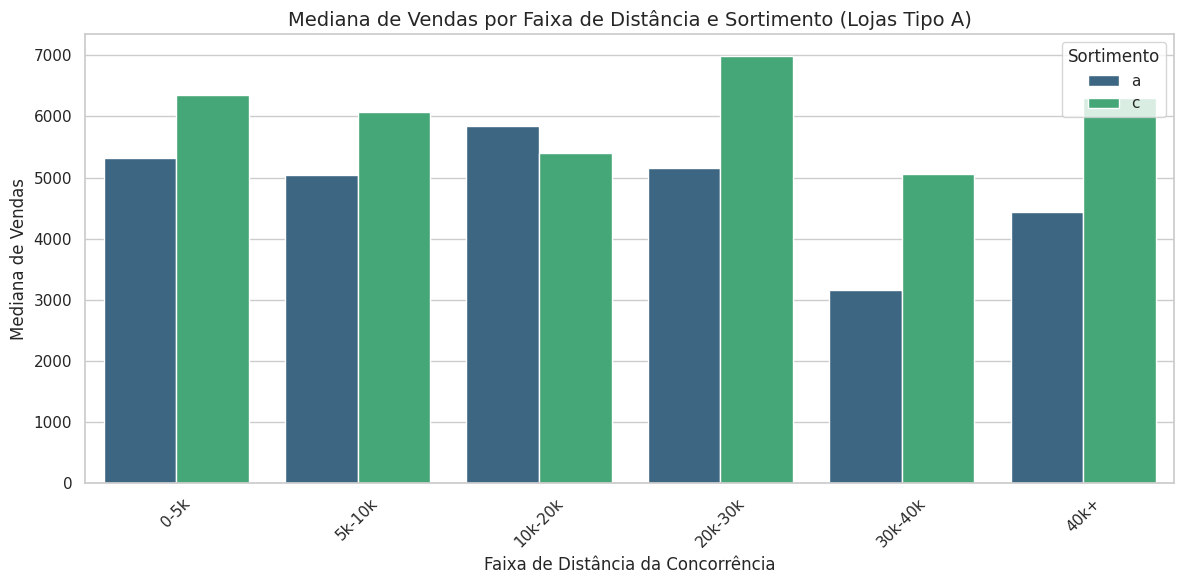

In [ ]:
# Agrupa os dados por faixas de distância e sortimento (Assortment)
distance_assortment_sales = store_type_a.groupby(['DistanceGroup', 'Assortment'], observed=False)['Sales'].median().reset_index()

# Configura os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de barras para a mediana de vendas por faixa de distância e sortimento
sns.barplot(
    data=distance_assortment_sales,
    x='DistanceGroup',
    y='Sales',
    hue='Assortment',
    palette='viridis'
)

# Personaliza o gráfico
plt.title('Mediana de Vendas por Faixa de Distância e Sortimento (Lojas Tipo A)', fontsize=14)
plt.xlabel('Faixa de Distância da Concorrência', fontsize=12)
plt.ylabel('Mediana de Vendas', fontsize=12)
plt.legend(title='Sortimento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()


**Conclusões**

1. Sortimento tipo B

- Não há vendas registradas para o sortimento tipo **B**.
- O sortimento tipo B pode não ser oferecido nas lojas do tipo "A" ou ele pode não atender à demanda dos clientes em áreas onde essas lojas estão localizadas.


2. Sortimento tipo A
- Para o sortimento tipo A, a mediana de vendas permanece relativamente estável em todas as faixas de distância até 30k, mas diminui para distâncias acima disso.
- Clientes próximos (até 30k) podem ser fiéis e preferirem a loja independentemente da concorrência.

- A diminuição acima de 30k sugere que a concorrência ou outros fatores logísticos começam a impactar negativamente as vendas.



3. Sortimento tipo C

- Vendas do sortimento tipo C têm variação não linear com a distância
  - Há um pico de vendas na faixa 20-30k, indicando que essa faixa pode representar uma região com menor concorrência direta ou um público-alvo mais alinhado ao sortimento tipo C.

  - As vendas são menores nas faixas 10-20k e 30-40k, o que pode indicar menor densidade populacional ou menos interesse pelo sortimento tipo C nessas regiões.
  - As vendas retornam a um nível elevado na faixa 40k+, o que pode indicar que os clientes nessas regiões têm poucas alternativas ou que a loja está atendendo áreas rurais ou isoladas

- O sortimento tipo C apresenta medianas de vendas significativamente mais altas do que o tipo A em todas as faixas, o que pode indicar uma maior demanda por esse sortimento em áreas atendidas pelas lojas tipo A.

**Insights**
- As lojas do tipo "A" apresentam características distintas de desempenho relacionadas à faixa de distância e ao tipo de sortimento.
- O **sortimento tipo A** é consistente em vendas até 30k, mas precisa de melhorias para distâncias maiores.
- O **sortimento tipo C** é altamente relevante e estratégico, mas sua performance varia dependendo da distância, indicando a necessidade de análises mais detalhadas de público e localização.
- Verificar a estratégia de sortimento B para lojas tipo A. Talvez seja necessário avaliar se vale a pena introduzir ou promover o sortimento tipo B nessas lojas para diversificar as ofertas.



## **Loja B**

###**Análise da concorrência x vendas**

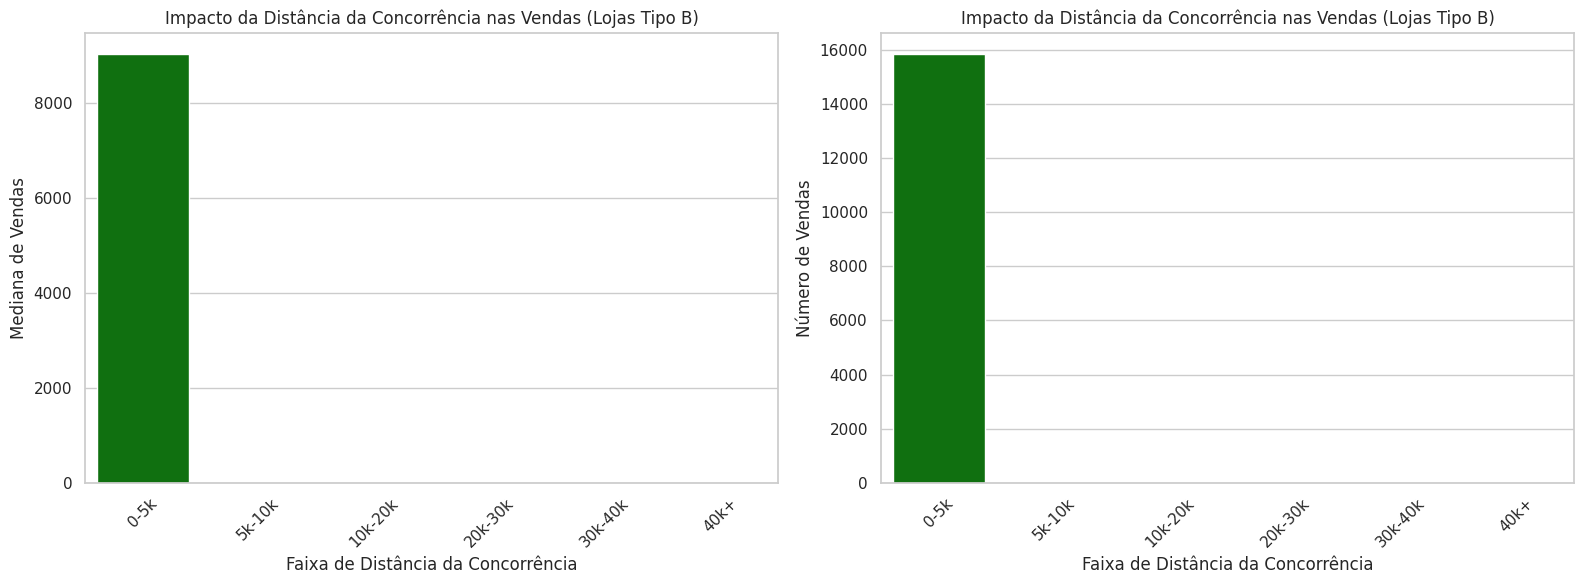

In [ ]:
# Filtra os dados apenas para lojas do tipo 'B'
store_type_b = base[base['StoreType'] == 'b'].copy()

# Exemplo para criar bins e calcular o impacto da distância
# Ensure bins are strictly increasing by adding a small value to the max
max_distance = store_type_b['CompetitionDistance'].max()

# Ajustando os valores dos bins para evitar duplicatas caso existam
bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
# Substitui max_distance + 1 por float('inf') para garantir que o último bin
# inclua todos os valores acima de 40k, evitando potenciais problemas se max_distance já estiver em um dos bins.

labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_b['DistanceGroup'] = pd.cut(store_type_b['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Calcula as métricas de vendas por faixa de distância
distance_sales_mean = store_type_b.groupby('DistanceGroup', observed=False)['Sales'].median()
distance_sales_count = store_type_b.groupby('DistanceGroup', observed=False)['Sales'].count()

# Criar os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Média de Vendas
sns.barplot(x=distance_sales_mean.index, y=distance_sales_mean.values, color='green', ax=axes[0])
axes[0].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo B)")
axes[0].set_ylabel("Mediana de Vendas")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Vendas
sns.barplot(x=distance_sales_count.index, y=distance_sales_count.values, color='green', ax=axes[1])
axes[1].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo B)")
axes[1].set_ylabel("Número de Vendas")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()
plt.show()


**Conclusões:**
1. **Concentração de vendas na menor faixa de distância (0-5k):**
   - Tanto a mediana de vendas quanto o número total de vendas são significativamente maiores na faixa de concorrência mais próxima (0-5k).
   - As demais faixas de distância (5k-10k, 10k-20k, etc.) apresentam vendas negligenciáveis ou inexistentes.

2. **Falta de distribuição uniforme das vendas:**
   - A ausência de dados relevantes para as faixas de distância maiores indica que lojas com concorrentes mais distantes não contribuem significativamente para o volume de vendas ou estão ausentes na análise.

---

**Insights:**
1. **Importância estratégica da proximidade da concorrência:**
   - A proximidade com concorrentes (até 5 km) parece ser um fator crucial para as vendas, sugerindo que as lojas em regiões com alta densidade comercial podem atrair mais clientes.

2. **Necessidade de revisão dos dados ou da segmentação:**
   - A concentração total na faixa 0-5k pode indicar:
     - Uma base de dados desbalanceada (maior número de lojas com concorrentes próximos).
     - A necessidade de verificar se a segmentação das faixas de distância está adequada ou se ajustes são necessários para capturar melhor os impactos.

3. **Foco em estratégias locais:**
   - As lojas podem se beneficiar de estratégias de marketing ou promoções em áreas com alta concentração de concorrentes próximos, visto que é onde as vendas predominam.

4. **Oportunidade de expansão para áreas menos competitivas:**
   - A falta de vendas nas faixas de distância maiores pode sinalizar a possibilidade de expansão em regiões com menor densidade de concorrentes, caso haja demanda latente.

---

###**Análise da concorrência x vendas x clientes**

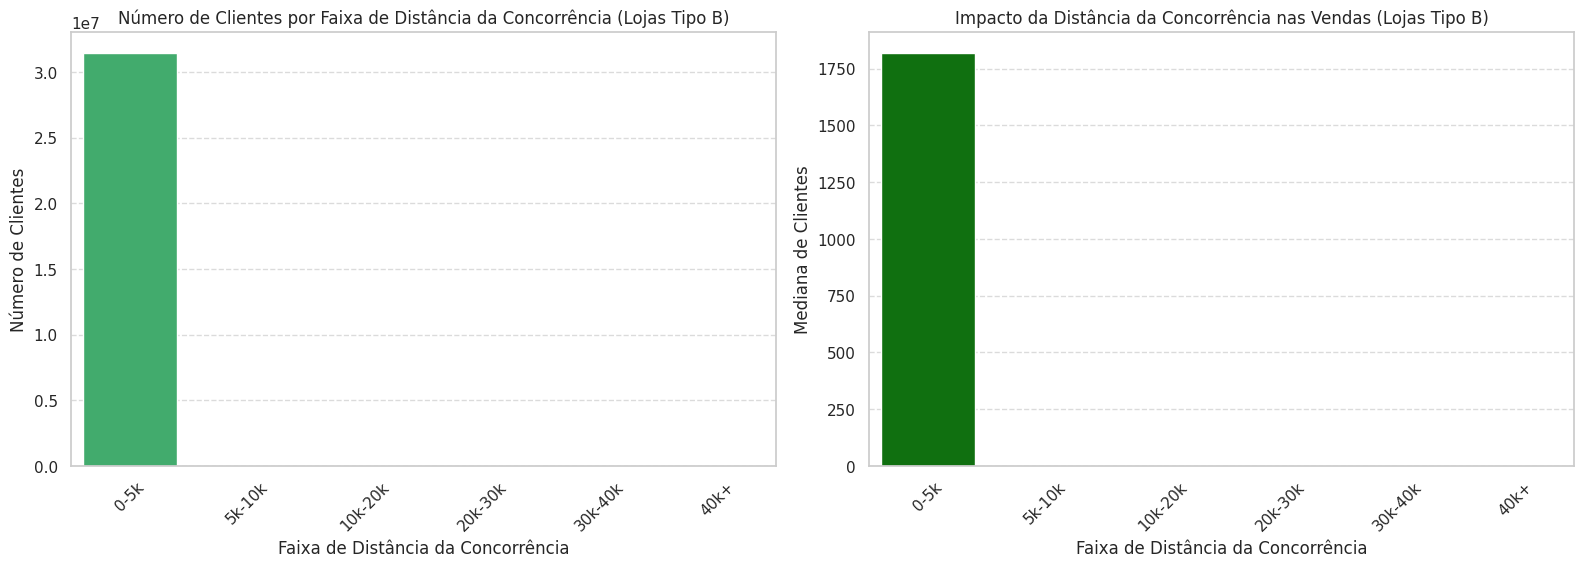

In [ ]:
# Dados já filtrados e processados para lojas do tipo 'B'
store_type_b = base[base['StoreType'] == 'b'].copy()

# Converte CompetitionDistance para numérico
store_type_b['CompetitionDistance'] = pd.to_numeric(store_type_b['CompetitionDistance'], errors='coerce')

# Criando faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_b['DistanceGroup'] = pd.cut(
    store_type_b['CompetitionDistance'],
    bins=bins,
    labels=labels,
    right=False
)

# Calculando o número total de clientes por faixa de distância
distance_group_customers = store_type_b.groupby('DistanceGroup', observed=False)['Customers'].sum()

# Calcula a média de vendas por faixa de distância
sales_by_distance = store_type_b.groupby('DistanceGroup', observed=False)['Customers'].median()

# Configura os subplots para os dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Gráfico 1: Número de Clientes por Faixa de Distância
sns.barplot(
    x=distance_group_customers.index,
    y=distance_group_customers.values,
    color="#31bc6a",  # Cor verde
    ax=axes[0]
)
axes[0].set_title("Número de Clientes por Faixa de Distância da Concorrência (Lojas Tipo B)")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].set_ylabel("Número de Clientes")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Impacto da Distância da Concorrência nas Vendas
sns.barplot(
    x=sales_by_distance.index,
    y=sales_by_distance.values,
    color='green',
    ax=axes[1]
)
axes[1].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo B)")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].set_ylabel("Mediana de Clientes")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta o layout dos gráficos
plt.tight_layout()
plt.show()


**Conclusões:**

1. **Distribuição de Clientes:**
   - A maioria absoluta dos clientes está localizada na faixa de distância de 0 a 5 km da concorrência.  
   - As faixas de distância superiores (5-10 km, 10-20 km, etc.) apresentam números praticamente insignificantes de clientes.

2. **mediana de Clientes por Faixa:**
   - A mediana de clientes nas lojas localizadas na faixa de 0 a 5 km da concorrência é significativamente maior do que nas demais faixas de distância.

---

**Insights Estratégicos para o Negócio:**

1. **Localização Estratégica:**
   - Lojas próximas à concorrência (0-5 km) parecem atrair um número muito maior de clientes. Isso pode ser resultado de maior densidade populacional nessas áreas ou de uma estratégia competitiva de preços e ofertas.

2. **Falta de Relevância de Áreas Mais Distantes:**
   - As lojas em faixas distantes da concorrência (acima de 5 km) apresentam pouca ou nenhuma relevância em termos de número de clientes. Pode ser interessante reavaliar a viabilidade dessas localizações.

3. **Planejamento de Expansão:**
   - Para expandir, seria mais vantajoso abrir novas lojas em áreas próximas a concorrentes, já que isso parece aumentar o fluxo de clientes.

4. **Possível Concorrência Direta:**
   - A proximidade com concorrentes pode indicar um comportamento de "market clustering" (clientes preferem áreas com mais opções próximas para comparar preços ou conveniência).

---

###**Análise concorrência x vendas x promoção**

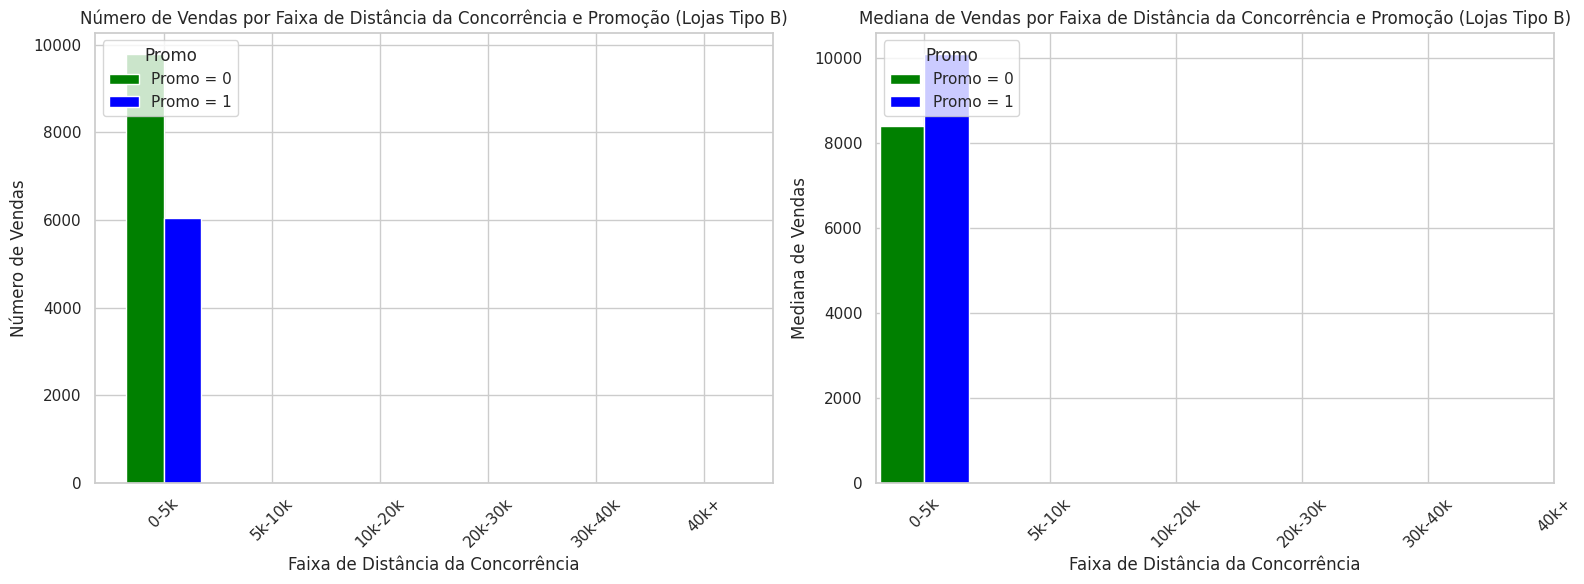

In [ ]:
store_type_b = base[base['StoreType'] == 'b'].copy()

# Converte CompetitionDistance para numérico e preenche valores ausentes com a mediana
store_type_b.loc[:, 'CompetitionDistance'] = pd.to_numeric(store_type_b['CompetitionDistance'], errors='coerce')

# Criando faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']
store_type_b['DistanceGroup'] = pd.cut(
    store_type_b['CompetitionDistance'],
    bins=bins,
    labels=labels,
    right=False
)

# Filtra os dados para Promo = 0 e Promo = 1
store_type_b_promo_0 = store_type_b[store_type_b['Promo'] == 0]
store_type_b_promo_1 = store_type_b[store_type_b['Promo'] == 1]

# Contando o número de vendas por faixa de distância e promoção
sales_count_promo_0 = store_type_b_promo_0.groupby('DistanceGroup', observed=False)['Sales'].count()
sales_count_promo_1 = store_type_b_promo_1.groupby('DistanceGroup', observed=False)['Sales'].count()

# Calculando a mediana de vendas por faixa de distância e promoção
sales_mean_promo_0 = store_type_b_promo_0.groupby('DistanceGroup', observed=False)['Sales'].median()
sales_mean_promo_1 = store_type_b_promo_1.groupby('DistanceGroup', observed=False)['Sales'].median()

# Criando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
bar_width = 0.35  # Largura das barras
index = range(len(sales_count_promo_0))

# Gráfico 1: Número de Vendas
axes[0].bar(index, sales_count_promo_0.values, bar_width, label='Promo = 0', color='green')
axes[0].bar([i + bar_width for i in index], sales_count_promo_1.values, bar_width, label='Promo = 1', color='blue')
axes[0].set_title("Número de Vendas por Faixa de Distância da Concorrência e Promoção (Lojas Tipo B)")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].set_ylabel("Número de Vendas")
axes[0].set_xticks([i + bar_width / 2 for i in index])
axes[0].set_xticklabels(sales_count_promo_0.index, rotation=45)
axes[0].legend(title='Promo', loc='upper left')

# Gráfico 2: mediana de Vendas
axes[1].bar(index, sales_mean_promo_0.values, bar_width, label='Promo = 0', color='green')
axes[1].bar([i + bar_width for i in index], sales_mean_promo_1.values, bar_width, label='Promo = 1', color='blue')
axes[1].set_title("Mediana de Vendas por Faixa de Distância da Concorrência e Promoção (Lojas Tipo B)")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].set_ylabel("Mediana de Vendas")
axes[1].set_xticks([i + bar_width / 2 for i in index])
axes[1].set_xticklabels(sales_mean_promo_0.index, rotation=45)
axes[1].legend(title='Promo', loc='upper left')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()


**Conclusões**

1. **Distribuição de Vendas por Distância:**
   - Assim como nos gráficos anteriores, as vendas estão concentradas quase exclusivamente na faixa de 0 a 5 km da concorrência.
   - Para as demais faixas de distância (5 km ou mais), praticamente não há vendas registradas.

2. **Efeito das Promoções (Promo = 0 vs Promo = 1):**
   - Tanto no número quanto na mediana de vendas, as promoções (Promo = 1) não apresentam um impacto significativo em comparação com os períodos sem promoções (Promo = 0).
   - A diferença entre as barras verdes (Promo = 0) e azuis (Promo = 1) nos gráficos é mínima.

---

**Insights Estratégicos:**

1. **Promoções podem ser irrelevantes sem ajuste estratégico:**
   - Aparentemente, as promoções nas Lojas Tipo B não são eficazes no aumento de vendas. Pode ser necessário revisar o modelo de promoção, considerando ofertas mais atraentes ou estratégias de marketing mais segmentadas.

2. **Manutenção de foco nas áreas próximas à concorrência:**
   - Assim como evidenciado anteriormente, o maior volume de vendas ocorre na faixa de 0 a 5 km da concorrência. Isso reforça a importância de concentrar esforços em regiões próximas a outras lojas concorrentes.

3. **Baixa eficácia em áreas distantes:**
   - Mesmo com promoções, as vendas não aumentam em áreas mais distantes (5 km ou mais). Isso sugere que o fator distância é muito mais relevante do que promoções para o sucesso dessas lojas.

4. **Necessidade de análise complementar:**
   - Considerando o baixo impacto das promoções, pode ser interessante realizar uma análise de comportamento do consumidor, testando variações nas promoções (como descontos maiores, bônus, ou campanhas específicas) para identificar o que realmente estimula as vendas.

---



#####**Análise da relação entre *concorrência*, *vendas*, *promo* e *promo2***

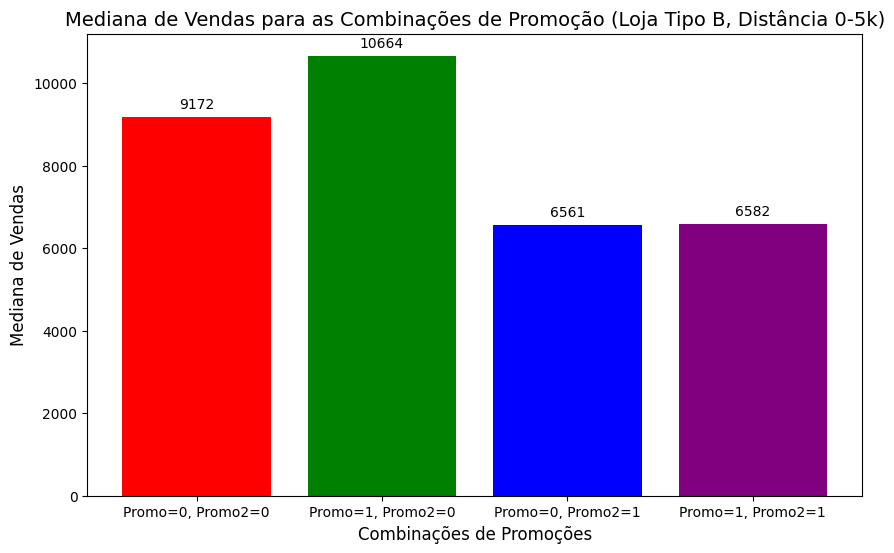

In [ ]:
# Filtrando os dados para a loja do tipo A e distância de 0-5k da concorrência
store_type_b_distance_0_5k = base[
    (base['StoreType'] == 'b') &
    (base['CompetitionDistance'] >= 0) &
    (base['CompetitionDistance'] <= 5000)
]

# Agrupar as vendas com base nas combinações de Promo e Promo2 para a loja do tipo A e distância 0-5k
sales_promo_combinations_b_distance_0_5k = store_type_b_distance_0_5k.groupby(['Promo', 'Promo2'])['Sales'].median().reset_index()

# Garantindo que todas as combinações possíveis de Promo e Promo2 estejam presentes
combinations = [(0, 0), (1, 0), (0, 1), (1, 1)]
sales_values_b_distance_0_5k = []

for promo, promo2 in combinations:
    sales_value = sales_promo_combinations_b_distance_0_5k[
        (sales_promo_combinations_b_distance_0_5k['Promo'] == promo) &
        (sales_promo_combinations_b_distance_0_5k['Promo2'] == promo2)
    ]['Sales'].sum()
    sales_values_b_distance_0_5k.append(sales_value)

# Criando os rótulos para as barras
labels = ['Promo=0, Promo2=0', 'Promo=1, Promo2=0', 'Promo=0, Promo2=1', 'Promo=1, Promo2=1']

# Gerando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(labels, sales_values_b_distance_0_5k, color=['red', 'green', 'blue', 'purple'])

# Adicionando títulos e rótulos
plt.title('Mediana de Vendas para as Combinações de Promoção (Loja Tipo B, Distância 0-5k)', fontsize=14)
plt.xlabel('Combinações de Promoções', fontsize=12)
plt.ylabel('Mediana de Vendas', fontsize=12)

# Adicionando os valores acima das barras
for i, value in enumerate(sales_values_b_distance_0_5k):
    plt.text(i, value + max(sales_values_b_distance_0_5k) * 0.02 if value > 0 else max(sales_values_b_distance_0_5k) * 0.1,
             str(int(value)), ha='center', fontsize=10)

# Exibindo o gráfico
plt.show()


**Conclusões**

- A combinação de uma promoção pontual (Promo = 1) sem promoções contínuas (Promo2 = 0) é a mais eficaz em termos de mediana de vendas, indicando que para lojas tipo B próximas aos concorrentes ações promocionais pontuais têm um impacto mais forte, talvez devido à capacidade de gerar urgência ou chamar atenção imediata.

- A combinação sem promoções (Promo = 0 e Promo2 = 0) apresenta a segunda maior mediana de vendas, o que indica que as lojas tipo B próximas aos concorrentes podem ter uma base de clientes estável e pouco menos dependente de promoções para atrair vendas.

- Combinações que incluem promoções contínuas (Promo2 = 1) geram medianas de vendas relativamente iguais, independentemente de haver ou não promoções pontuais.
Isso sugere que promoções contínuas para lojas tipo B próximas aos concorrentes podem não criar o mesmo apelo ou engajamento em comparação com promoções pontuais.

**Insights**

- Foco em promoções pontuais para lojas próximas aos concorrentes

- Promoções contínuas têm efeito limitado e impacto reduzido

- A base de clientes fiéis permite pouco menos dependência de promoções

- Como as combinações Promo = 0, Promo2 = 1 e Promo = 1, Promo2 = 1 não diferem muito em desempenho, simplificar as campanhas contínuas pode economizar custos sem perda significativa de vendas.

###**Análise concorrência x vendas x feriados/fechamento de escolas**

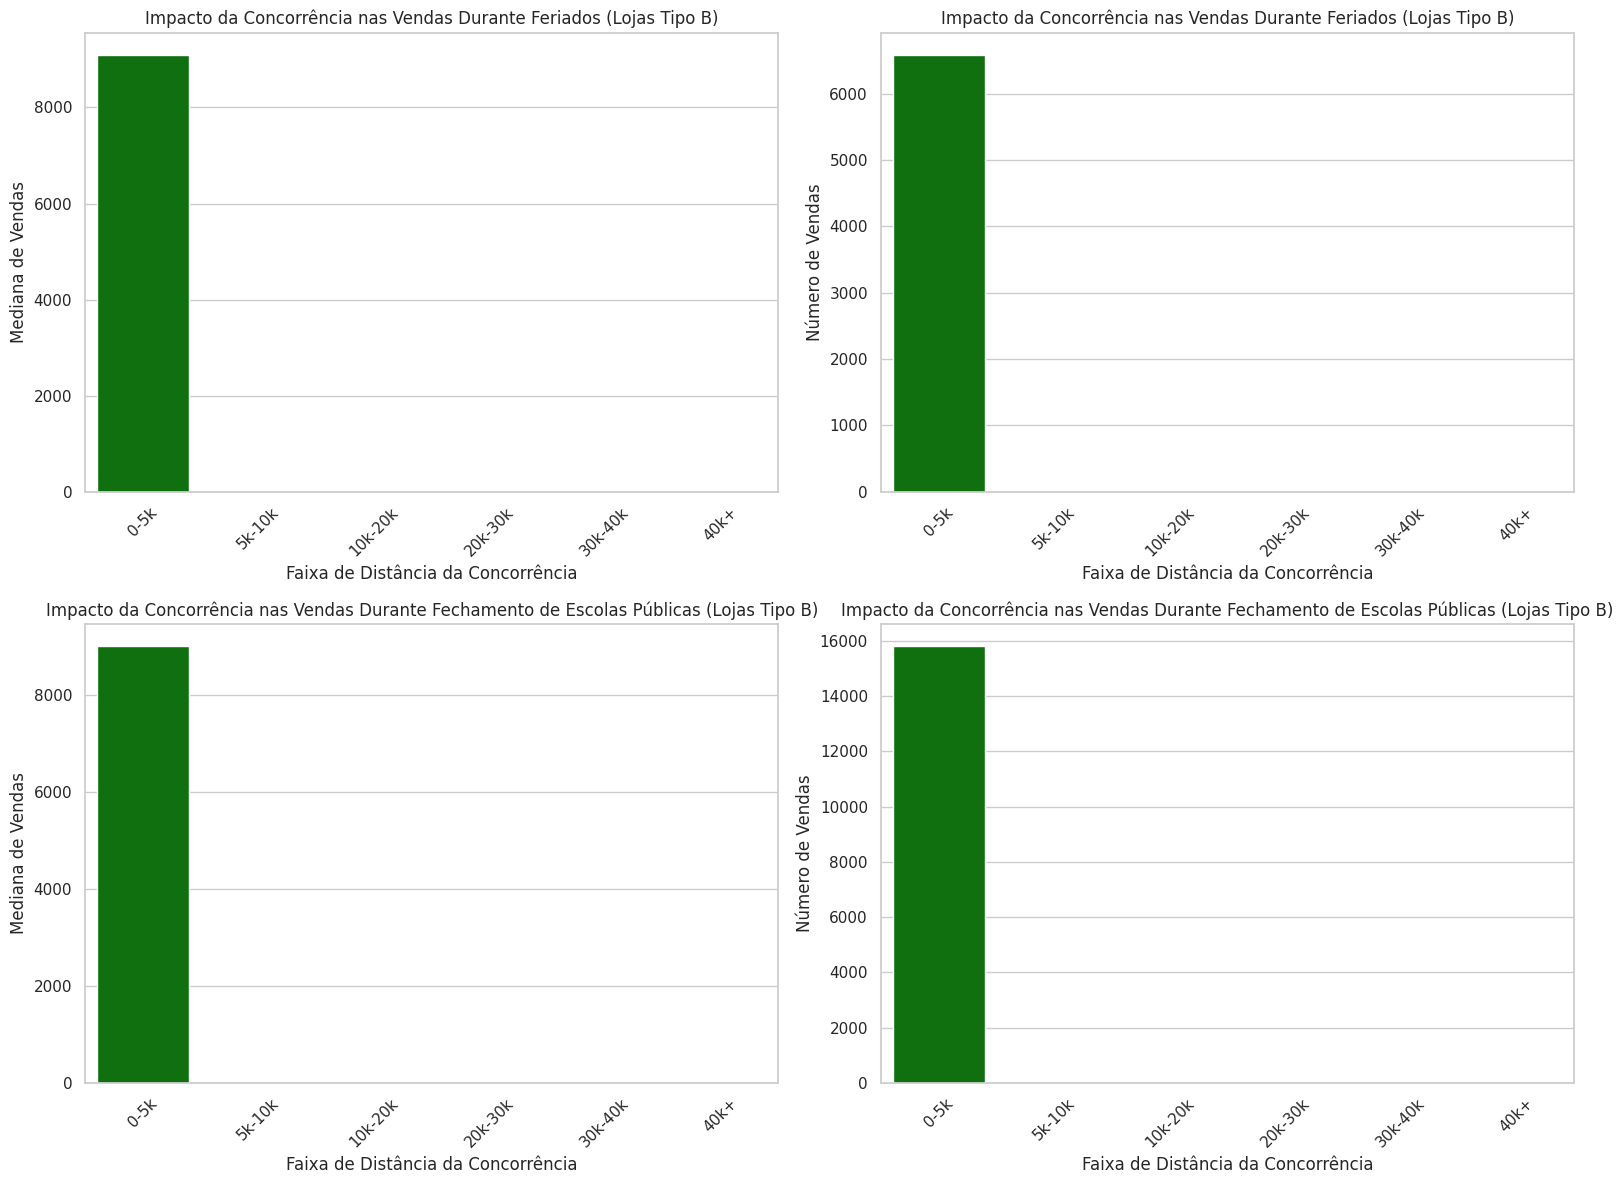

In [ ]:
# Filtra os dados apenas para lojas do tipo 'B' durante feriados estaduais e fechamento de escolas
store_type_b_holiday_state = base[(base['StoreType'] == 'b') & (base['StateHoliday'] != '0')]
store_type_b_holiday_school = base[(base['StoreType'] == 'b') & (base['SchoolHoliday'] != '0')]

# Cria faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, base['CompetitionDistance'].max()]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_b_holiday_state['DistanceGroup'] = pd.cut(store_type_b_holiday_state['CompetitionDistance'], bins=bins, labels=labels, right=False)
store_type_b_holiday_school['DistanceGroup'] = pd.cut(store_type_b_holiday_school['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Gráficos durante feriados estaduais
holiday_sales_state_mean_b = store_type_b_holiday_state.groupby('DistanceGroup', observed = False)['Sales'].median()
holiday_sales_state_count_b = store_type_b_holiday_state.groupby('DistanceGroup', observed = False)['Sales'].count()

# Gráficos durante fechamento de escolas públicas
holiday_sales_school_mean_b = store_type_b_holiday_school.groupby('DistanceGroup', observed = False)['Sales'].median()
holiday_sales_school_count_b = store_type_b_holiday_school.groupby('DistanceGroup', observed = False)['Sales'].count()

# Criação dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: mediana de Vendas durante feriados estaduais
sns.barplot(x=holiday_sales_state_mean_b.index, y=holiday_sales_state_mean_b.values, color='green', ax=axes[0, 0])
axes[0, 0].set_title("Impacto da Concorrência nas Vendas Durante Feriados (Lojas Tipo B)")
axes[0, 0].set_ylabel("Mediana de Vendas")
axes[0, 0].set_xlabel("Faixa de Distância da Concorrência")
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Vendas durante feriados estaduais
sns.barplot(x=holiday_sales_state_count_b.index, y=holiday_sales_state_count_b.values, color='green', ax=axes[0, 1])
axes[0, 1].set_title("Impacto da Concorrência nas Vendas Durante Feriados (Lojas Tipo B)")
axes[0, 1].set_ylabel("Número de Vendas")
axes[0, 1].set_xlabel("Faixa de Distância da Concorrência")
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: mediana de Vendas durante fechamento de escolas públicas
sns.barplot(x=holiday_sales_school_mean_b.index, y=holiday_sales_school_mean_b.values, color='green', ax=axes[1, 0])
axes[1, 0].set_title("Impacto da Concorrência nas Vendas Durante Fechamento de Escolas Públicas (Lojas Tipo B)")
axes[1, 0].set_ylabel("Mediana de Vendas")
axes[1, 0].set_xlabel("Faixa de Distância da Concorrência")
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Número de Vendas durante fechamento de escolas públicas
sns.barplot(x=holiday_sales_school_count_b.index, y=holiday_sales_school_count_b.values, color='green', ax=axes[1, 1])
axes[1, 1].set_title("Impacto da Concorrência nas Vendas Durante Fechamento de Escolas Públicas (Lojas Tipo B)")
axes[1, 1].set_ylabel("Número de Vendas")
axes[1, 1].set_xlabel("Faixa de Distância da Concorrência")
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()
plt.show()


**Conclusões**

   - Durante os feriados, as lojas na faixa de 0 a 5 km continuam sendo o principal local de vendas, com uma mediana relativamente estável em relação a períodos normais.

   - O fechamento das escolas públicas também não altera significativamente o padrão de concentração de vendas na faixa de 0 a 5 km.  

---

**Insights**

   - Eventos como feriados ou o fechamento de escolas públicas não alteram significativamente as vendas, indicando que esses fatores podem não ser determinantes no comportamento dos clientes.

   - Apesar do baixo impacto, as lojas podem explorar campanhas mais agressivas durante os feriados ou fechamentos de escolas, como promoções temáticas, para atrair um público adicional.

---



###**Análise da relação entre *concorrência*, *vendas* e *sortimento***

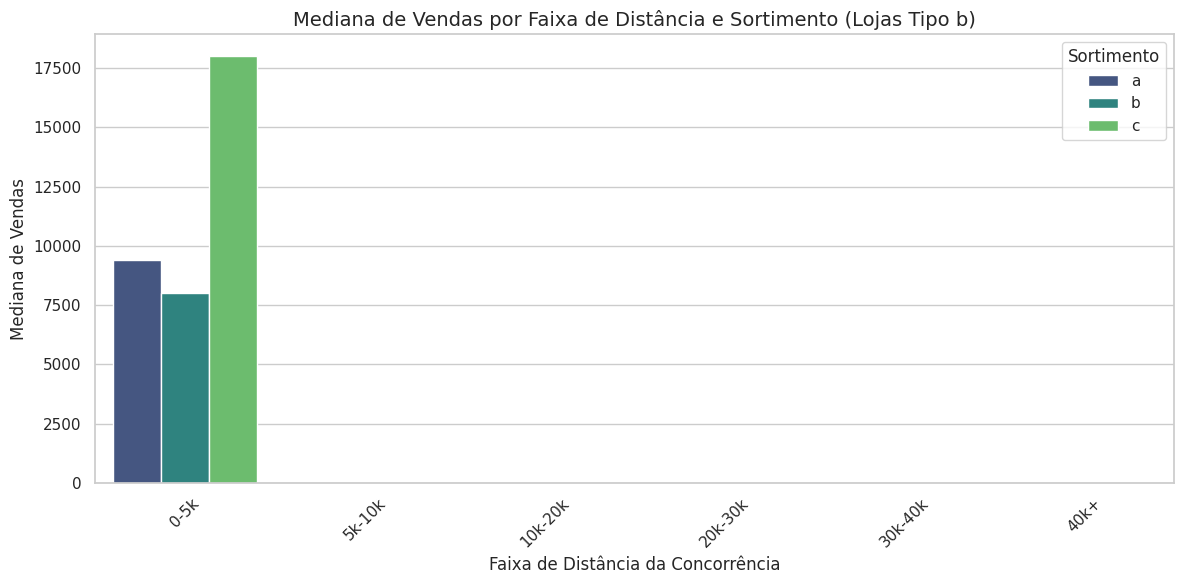

In [ ]:
# Agrupa os dados por faixas de distância e sortimento (Assortment)
distance_assortment_sales = store_type_b.groupby(['DistanceGroup', 'Assortment'], observed=False)['Sales'].median().reset_index()

# Configura os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de barras para a mediana de vendas por faixa de distância e sortimento
sns.barplot(
    data=distance_assortment_sales,
    x='DistanceGroup',
    y='Sales',
    hue='Assortment',
    palette='viridis'
)

# Personaliza o gráfico
plt.title('Mediana de Vendas por Faixa de Distância e Sortimento (Lojas Tipo b)', fontsize=14)
plt.xlabel('Faixa de Distância da Concorrência', fontsize=12)
plt.ylabel('Mediana de Vendas', fontsize=12)
plt.legend(title='Sortimento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()


**Conclusões**

- A proximidade com a concorrência pode ser um fator que atrai mais clientes, especialmente para o sortimento tipo C, que apresenta o maior desempenho.

- A mediana das vendas do sortimento tipo A posiciona-se entre os valores do tipo B e tipo C. Isso indica que o desempenho do tipo A é moderado, podendo ser uma escolha popular, mas não tão atrativa quanto o tipo C.

- Sortimento tipo B apresenta vendas na faixa 0-5k, mas sua mediana é a menor entre os três tipos, o que pode indicar uma baixa promoção ou visibilidade do sortimento tipo B em comparação aos outros ou até uma menor busca por esse tipo em comparação com os outros.

**Insights**

- O sortimento tipo C é o grande destaque, sugerindo que ele deve ser priorizado nas estratégias de marketing e gestão de sortimento e também deve-se considerar expandí-lo para outros locais ou focar nele como um diferencial competitivo.

- O desempenho moderado do sortimento tipo A sugere que ele tem potencial para crescer. Testar estratégias de promoção cruzada com o sortimento tipo C pode ajudar a impulsionar as vendas.

- O sortimento tipo B tem espaço para melhoria, seja por meio de ajustes na oferta ou estratégias para aumentar sua atratividade.




## **Loja C**

###**Análise da relação entre *concorrência* e *vendas***

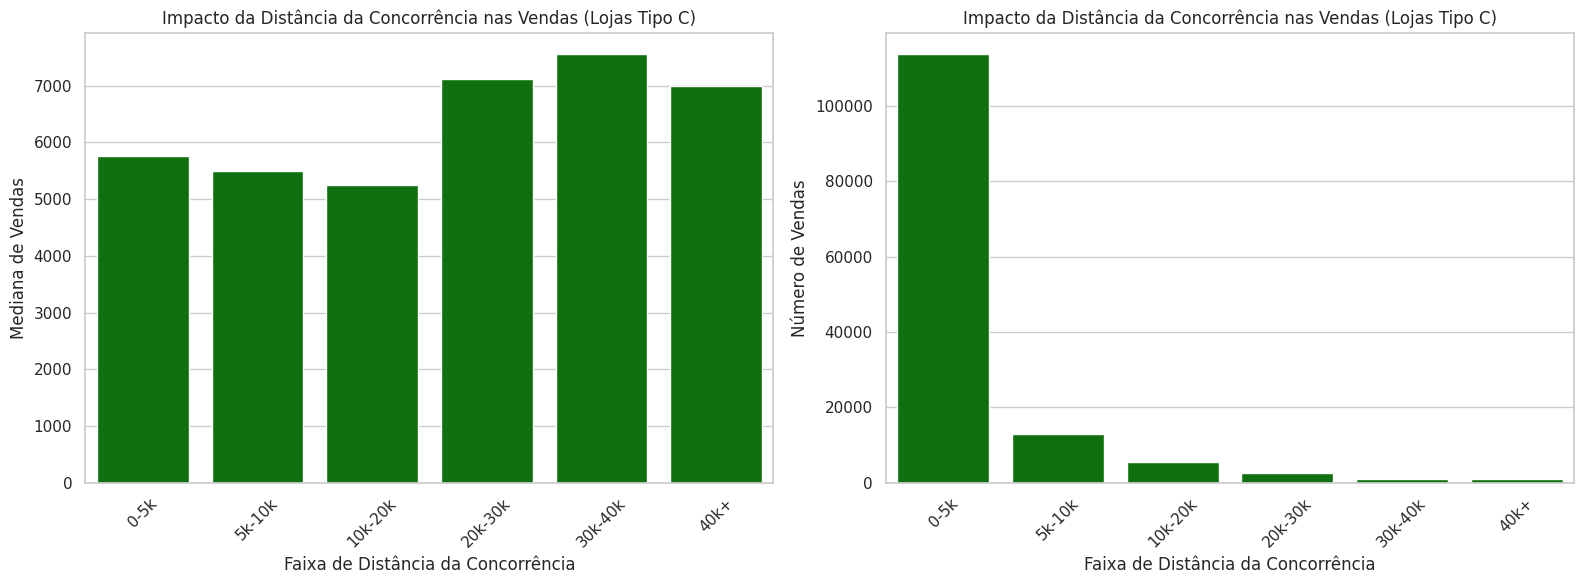

In [ ]:
# Filtra os dados apenas para lojas do tipo 'D'
store_type_c = base[base['StoreType'] == 'c'].copy()

# Exemplo para criar bins e calcular o impacto da distância
# Ensure bins are strictly increasing by adding a small value to the max
max_distance = store_type_c['CompetitionDistance'].max()

# Ajustando os valores dos bins para evitar duplicatas caso existam
bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
# Substitui max_distance + 1 por float('inf') para garantir que o último bin
# inclua todos os valores acima de 40k, evitando potenciais problemas se max_distance já estiver em um dos bins.

labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_c['DistanceGroup'] = pd.cut(store_type_c['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Calcula as métricas de vendas por faixa de distância
distance_sales_mean = store_type_c.groupby('DistanceGroup', observed=False)['Sales'].median()
distance_sales_count = store_type_c.groupby('DistanceGroup', observed=False)['Sales'].count()

# Criar os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: mediana de Vendas
sns.barplot(x=distance_sales_mean.index, y=distance_sales_mean.values, color='green', ax=axes[0])
axes[0].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo C)")
axes[0].set_ylabel("Mediana de Vendas")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Vendas
sns.barplot(x=distance_sales_count.index, y=distance_sales_count.values, color='green', ax=axes[1])
axes[1].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo C)")
axes[1].set_ylabel("Número de Vendas")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()
plt.show()


**Conclusões**

- A mediana de vendas parece aumentar significativamente à medida que a distância da concorrência cresce.  
   - As lojas com concorrência mais distante (30k-40k e 40k+) apresentam as maiores medianas de vendas.  
   - Isso sugere que, quanto mais afastadas estão da concorrência, as lojas do Tipo C têm um desempenho médio de vendas melhor.

- Baixa mediana de vendas em regiões próximas à concorrência (0-20k)
   - Lojas localizadas próximas à concorrência possuem a menor mediana de vendas, indicando que a proximidade com concorrentes afeta negativamente seu desempenho.

- Apesar da mediana de vendas ser mais baixa, o número total de vendas nas lojas próximas à concorrência (0-5k) é extremamente alto.  
   - Isso pode ser explicado pelo fato de que a maioria das lojas do Tipo C está concentrada nessa faixa de distância.

- Diminuição significativa no número de vendas conforme a distância aumenta
   - O número de vendas cai acentuadamente em faixas de distância maiores (5k-10k e superiores).  
   - Isso indica que há menos lojas localizadas nessas faixas, o que pode limitar a análise quantitativa dessas distâncias.

---

**Insights Gerais**

- Lojas em áreas sem concorrência próxima tendem a performar melhor em mediana, indicando uma possível oportunidade de expansão em locais menos saturados.

- A alta quantidade de vendas na faixa 0-5k sugere que muitas lojas do Tipo C competem diretamente, possivelmente devido à densidade populacional ou outras vantagens logísticas.

- Para lojas próximas à concorrência, pode ser necessário investir em diferenciação de produto, promoções ou estratégias de fidelização para aumentar as vendas medianas.



###**Análise da relação entre *concorrência*, *vendas* e *clientes***

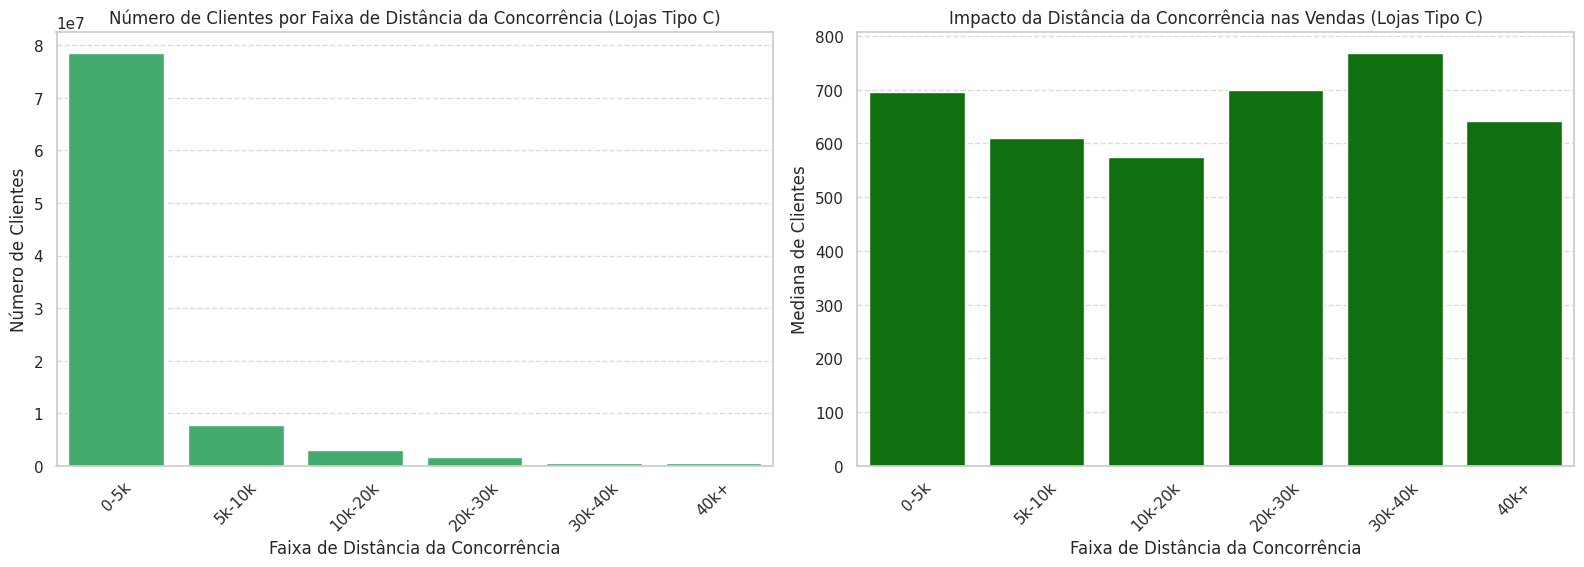

In [ ]:
# Calculando o número total de clientes por faixa de distância
distance_group_customers = store_type_c.groupby('DistanceGroup', observed=False)['Customers'].sum()

# Calcula a média de vendas por faixa de distância
sales_by_distance = store_type_c.groupby('DistanceGroup', observed=False)['Customers'].median()

# Criando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Gráfico 1: Número de Clientes por Faixa de Distância
sns.barplot(
    ax=axes[0],
    x=distance_group_customers.index,
    y=distance_group_customers.values,
    color="#31bc6a"  # Cor verde
)
axes[0].set_title("Número de Clientes por Faixa de Distância da Concorrência (Lojas Tipo C)")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].set_ylabel("Número de Clientes")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Impacto da Distância da Concorrência nas Vendas
sns.barplot(
    ax=axes[1],
    x=sales_by_distance.index,
    y=sales_by_distance.values,
    color='green'
)
axes[1].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo C)")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].set_ylabel("Mediana de Clientes")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustando o layout
plt.tight_layout()
plt.show()


**Conclusões**


- A maior concentração de clientes está em lojas localizadas a até 5 km da concorrência. Isso sugere que a proximidade com competidores pode ser um fator atrativo ou que essas áreas são mais densamente povoadas.

- Conforme a distância da concorrência aumenta, o número de clientes diminui drasticamente, indicando que áreas menos competitivas podem ter menor densidade populacional ou menos fluxo de consumidores.

- As lojas localizadas entre 30k-40k km da concorrência apresentam a maior mediana de vendas. Isso pode indicar que, em áreas com menos concorrência, os consumidores têm maior dependência dessas lojas, o que resulta em maior receita por unidade.

- Lojas muito próximas à concorrência (0-20k km) apresentam medianas de vendas menores, o que pode indicar impacto negativo da competição direta ou menor ticket médio.

**Insights**

- Proximidade com concorrentes pode gerar maior volume de clientes, mas não necessariamente maior receita. Isso pode estar relacionado à divisão de mercado ou à presença de várias opções disponíveis para os consumidores.

- Lojas em áreas menos competitivas (distâncias maiores) podem ser mais estratégicas para capturar consumidores exclusivos.



###**Análise da relação entre *concorrência*, *vendas* e *promoção***

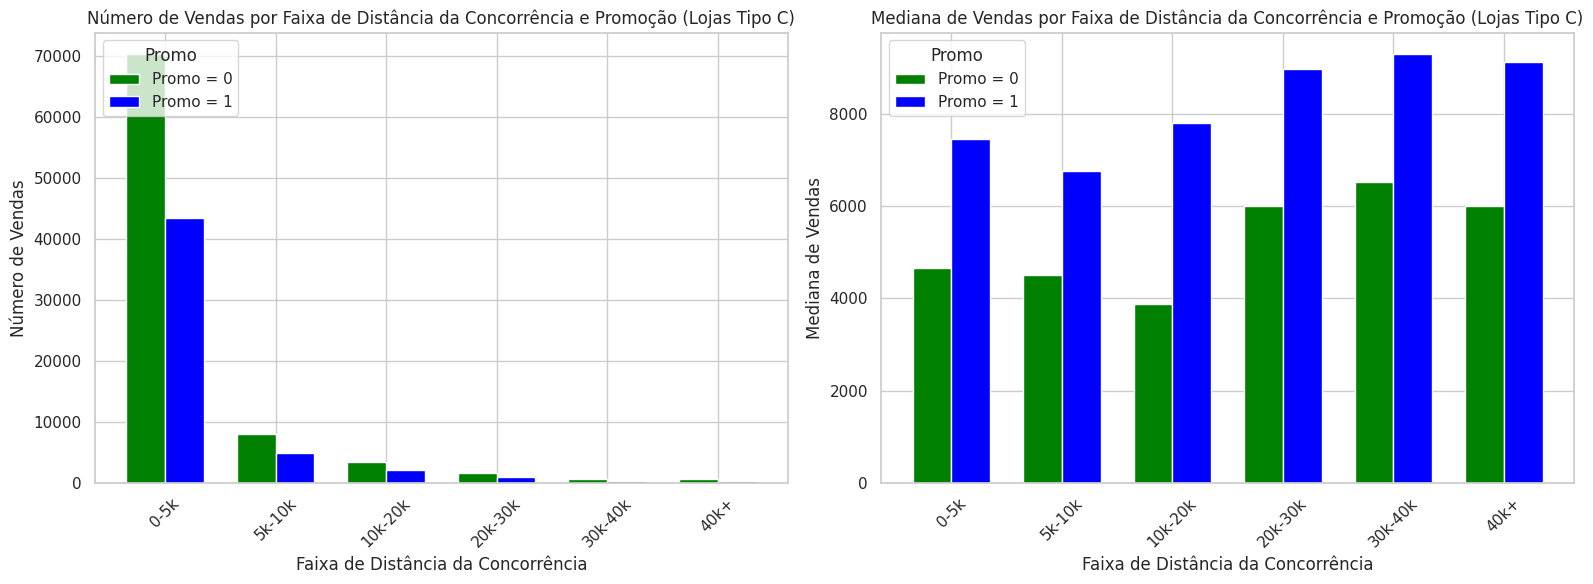

In [ ]:
# Filtra os dados para Promo = 0 e Promo = 1
store_type_c_promo_0 = store_type_c[store_type_c['Promo'] == 0]
store_type_c_promo_1 = store_type_c[store_type_c['Promo'] == 1]

# Contando o número de vendas por faixa de distância e promoção
sales_count_promo_0 = store_type_c_promo_0.groupby('DistanceGroup', observed=False)['Sales'].count()
sales_count_promo_1 = store_type_c_promo_1.groupby('DistanceGroup', observed=False)['Sales'].count()

# Calculando a mediana de vendas por faixa de distância e promoção
sales_mean_promo_0 = store_type_c_promo_0.groupby('DistanceGroup', observed=False)['Sales'].median()
sales_mean_promo_1 = store_type_c_promo_1.groupby('DistanceGroup', observed=False)['Sales'].median()

# Configuração para exibir gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
bar_width = 0.35  # Largura das barras
index = np.arange(len(sales_count_promo_0))

# Gráfico 1: Número de Vendas por Faixa de Distância
axes[0].bar(index, sales_count_promo_0.values, bar_width, label='Promo = 0', color='green')
axes[0].bar(index + bar_width, sales_count_promo_1.values, bar_width, label='Promo = 1', color='blue')
axes[0].set_title("Número de Vendas por Faixa de Distância da Concorrência e Promoção (Lojas Tipo C)")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].set_ylabel("Número de Vendas")
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(sales_count_promo_0.index, rotation=45)
axes[0].legend(title='Promo', loc='upper left')

# Gráfico 2: Média de Vendas por Faixa de Distância
axes[1].bar(index, sales_mean_promo_0.values, bar_width, label='Promo = 0', color='green')
axes[1].bar(index + bar_width, sales_mean_promo_1.values, bar_width, label='Promo = 1', color='blue')
axes[1].set_title("Mediana de Vendas por Faixa de Distância da Concorrência e Promoção (Lojas Tipo C)")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].set_ylabel("Mediana de Vendas")
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(sales_mean_promo_0.index, rotation=45)
axes[1].legend(title='Promo', loc='upper left')

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

**Conclusões**

- Maior volume de vendas ocorre sem promoções e em faixas mais próximas da concorrência (0-5k)
   - A maioria das vendas ocorre na faixa de distância 0-5k, com um volume maior de vendas quando não há promoções.
   - Isso pode indicar que, nas proximidades da concorrência, o tráfego natural ou outros fatores locais impulsionam as vendas e que as promoções podem não ser frequentes.
   
- O volume de vendas cai drasticamente conforme a distância da concorrência aumenta, tanto com promoções quanto sem.

- Promoções aumentam a mediana de vendas em todas as faixas de distância
   - Em todas as faixas de distância, a mediana de vendas é maior com promoções  do que sem promoções.
   - Promoções têm um impacto claro em aumentar o ticket médio por cliente, mesmo em áreas com alta concorrência.

-  Há um crescimento contínuo da mediana de vendas em regiões mais afastadas da concorrência
   - As medianas de vendas aumentam nas faixas de distância mais elevadas, especialmente com promoções, com destaque para as faixas 30k-40k e 40k+.
   - Isso reforça que, em locais com menor concorrência, promoções se tornam um diferencial ainda mais importante para maximizar vendas.

- Relativa baixa mediana de vendas sem promoções nas regiões próximas à concorrência (0-20km)
   - Apesar do alto número de vendas na faixa 0-5k sem promoções, a mediana de vendas é baixa, indicando um comportamento de compras de menor valor.

---

**Insights Gerais**

- Promoções são mais eficazes em regiões afastadas da concorrência
   - Lojas em áreas mais isoladas (30k+ de distância) se beneficiam mais de promoções, tanto em número quanto em mediana de vendas, tornando-as uma ferramenta essencial para atrair clientes.

- Estratégia específica por localização
   - Em regiões próximas da concorrência, o alto volume de vendas sem promoções pode indicar que os clientes já têm acesso fácil às lojas. Focar em promoções pode não ser tão crítico, mas estratégias de retenção ou diferenciação podem ser úteis.
   - Em regiões mais afastadas, promoções devem ser priorizadas para manter a competitividade e aumentar a base de clientes.
---


####**Análise da relação entre *concorrência*, *vendas*, *promo* e *promo2***

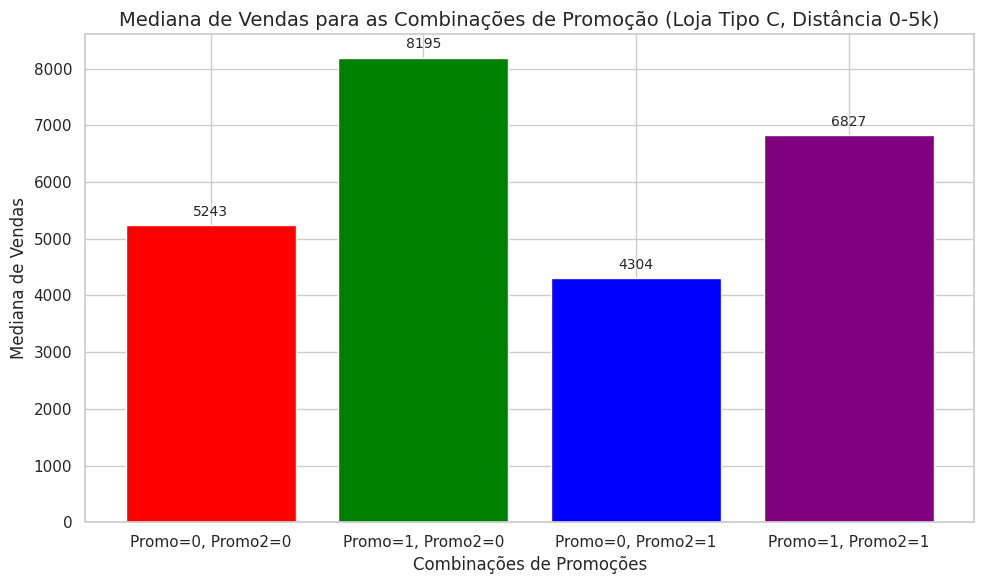

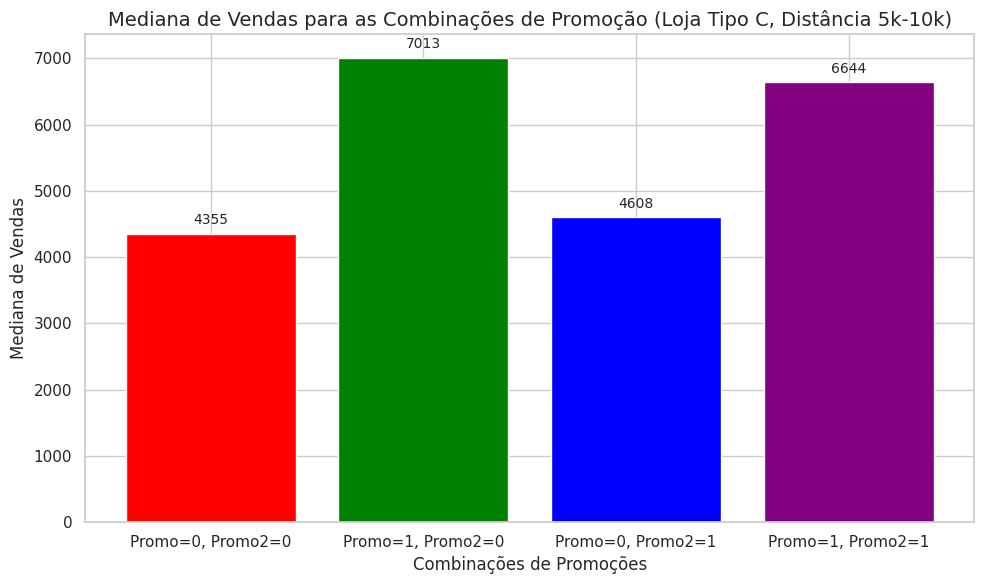

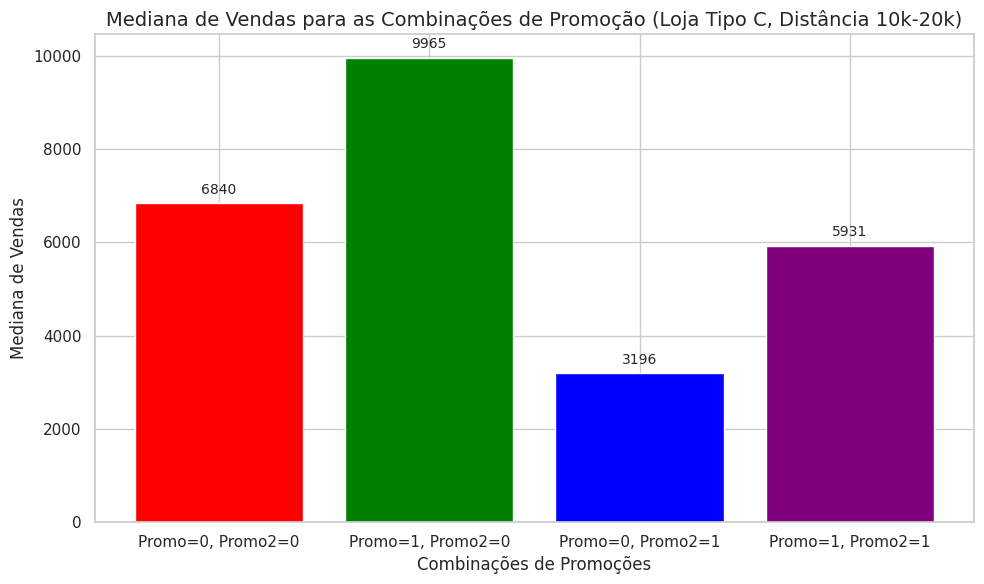

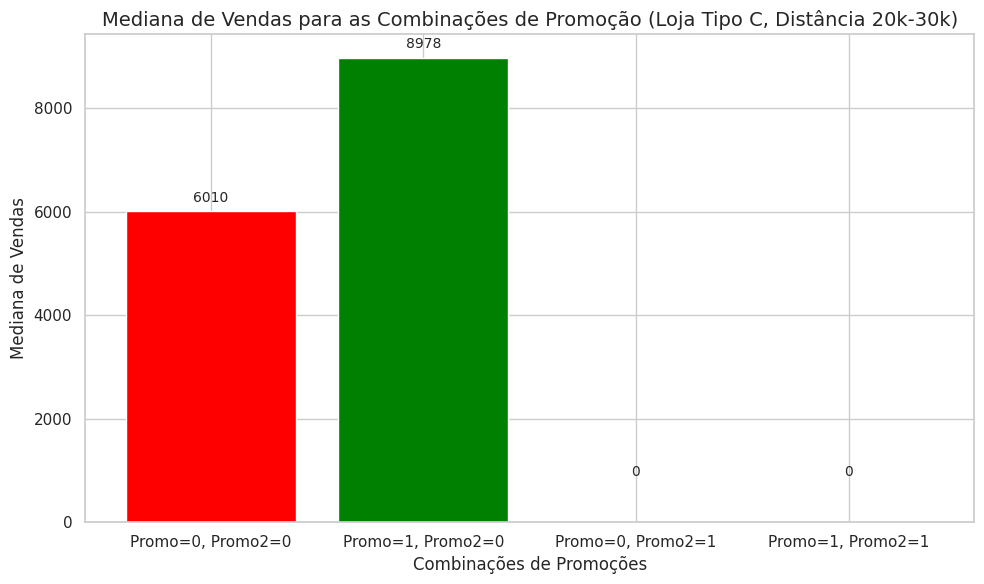

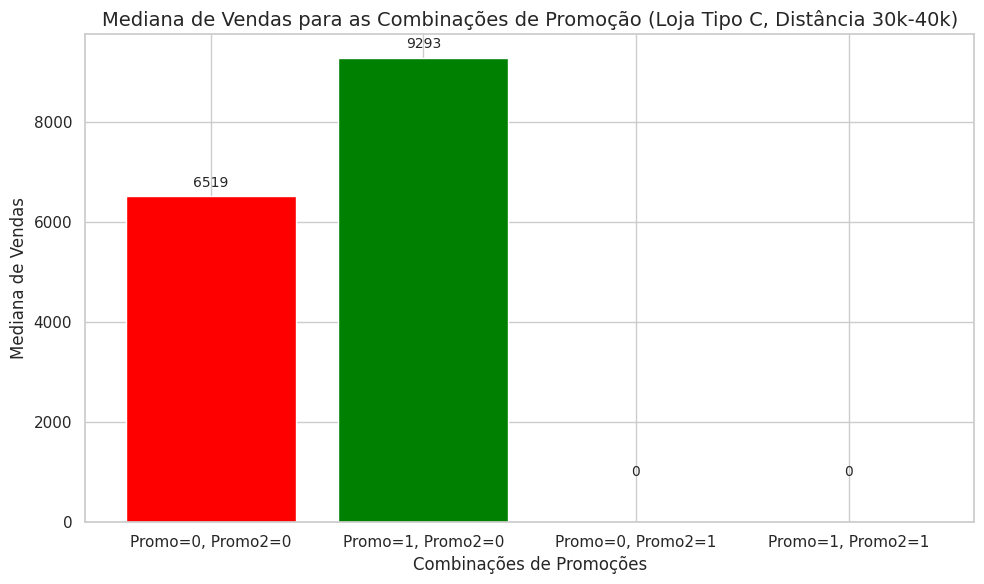

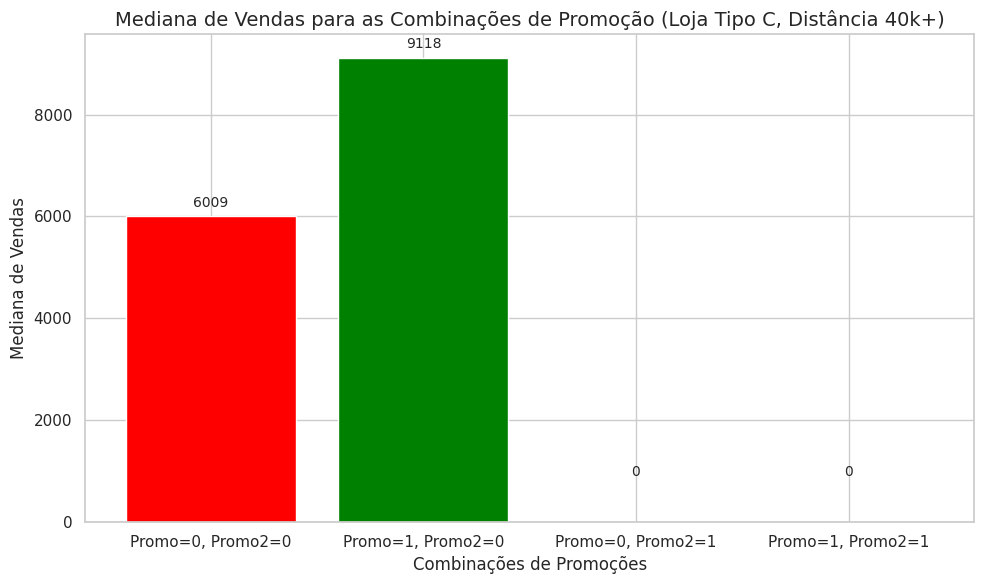

In [ ]:
# Definindo as faixas de distância e seus rótulos
bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

# Filtrando apenas para lojas do tipo A
store_type_a = base[base['StoreType'] == 'c']

# Iterando pelas faixas de distância para gerar gráficos
for distance_label in labels:
    # Filtrando os dados para a faixa de distância atual
    store_type_a_distance = store_type_a[store_type_a['DistanceGroup'] == distance_label]

    # Agrupar as vendas com base nas combinações de Promo e Promo2
    sales_promo_combinations = store_type_a_distance.groupby(['Promo', 'Promo2'])['Sales'].median().reset_index()

    # Garantindo que todas as combinações possíveis de Promo e Promo2 estejam presentes
    combinations = [(0, 0), (1, 0), (0, 1), (1, 1)]
    sales_values = []

    for promo, promo2 in combinations:
        sales_value = sales_promo_combinations[
            (sales_promo_combinations['Promo'] == promo) &
            (sales_promo_combinations['Promo2'] == promo2)
        ]['Sales'].sum()
        sales_values.append(sales_value)

    # Criando os rótulos para as barras
    promo_labels = ['Promo=0, Promo2=0', 'Promo=1, Promo2=0', 'Promo=0, Promo2=1', 'Promo=1, Promo2=1']

    # Gerando o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(promo_labels, sales_values, color=['red', 'green', 'blue', 'purple'])

    # Adicionando títulos e rótulos
    plt.title(f'Mediana de Vendas para as Combinações de Promoção (Loja Tipo C, Distância {distance_label})', fontsize=14)
    plt.xlabel('Combinações de Promoções', fontsize=12)
    plt.ylabel('Mediana de Vendas', fontsize=12)

    # Adicionando os valores acima das barras
    for i, value in enumerate(sales_values):
        plt.text(i, value + max(sales_values) * 0.02 if value > 0 else max(sales_values) * 0.1,
                 str(int(value)), ha='center', fontsize=10)

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

**Conclusões**

- Promo = 1 e Promo2 = 0 domina todas as faixas

- Há um efeito decrescente de Promo = 1 e Promo2 = 1 com aumento da distância (10-20k)

- Há uma certa estabilidade de Promo = 0 e Promo2 = 0 ou Promo = 0 e Promo2 = 1 (0-10k)

- Há ausência de combinações Promo = 0 e Promo2 = 1 ou Promo = 1 e Promo2 = 1 em faixas 20k+

**Insights**

- Promoções pontuais são consistentemente as mais eficazes para as lojas tipo C. Investir em campanhas de curta duração com ofertas agressivas pode maximizar o retorno.

- Promoções contínuas mostram eficácia limitada em áreas distantes (10-20k). Considerar ajustar ou eliminar essas campanhas em regiões mais afastadas para otimizar custos.

- Para lojas próximas à concorrência (0-10k), combinar promoções pontuais e contínuas (Promo = 1 e Promo2 = 1) pode ser vantajoso. Já em áreas distantes (10-20k ou 20k+), o foco deve ser exclusivamente em promoções pontuais.

-  Em áreas distantes dos concorrentes (30k+), promoções contínuas (Promo2 = 1) podem não ser uma boa estratégia. Em vez disso, foco em promoções pontuais. Ainda assim, talvez seja necessário redirecionar esforços para melhorar a experiência local para que as promoções contínuas gerem impacto significativo.


###**Análise da relação entre *concorrência*, *vendas* e *feriados/fechamento de escolas***

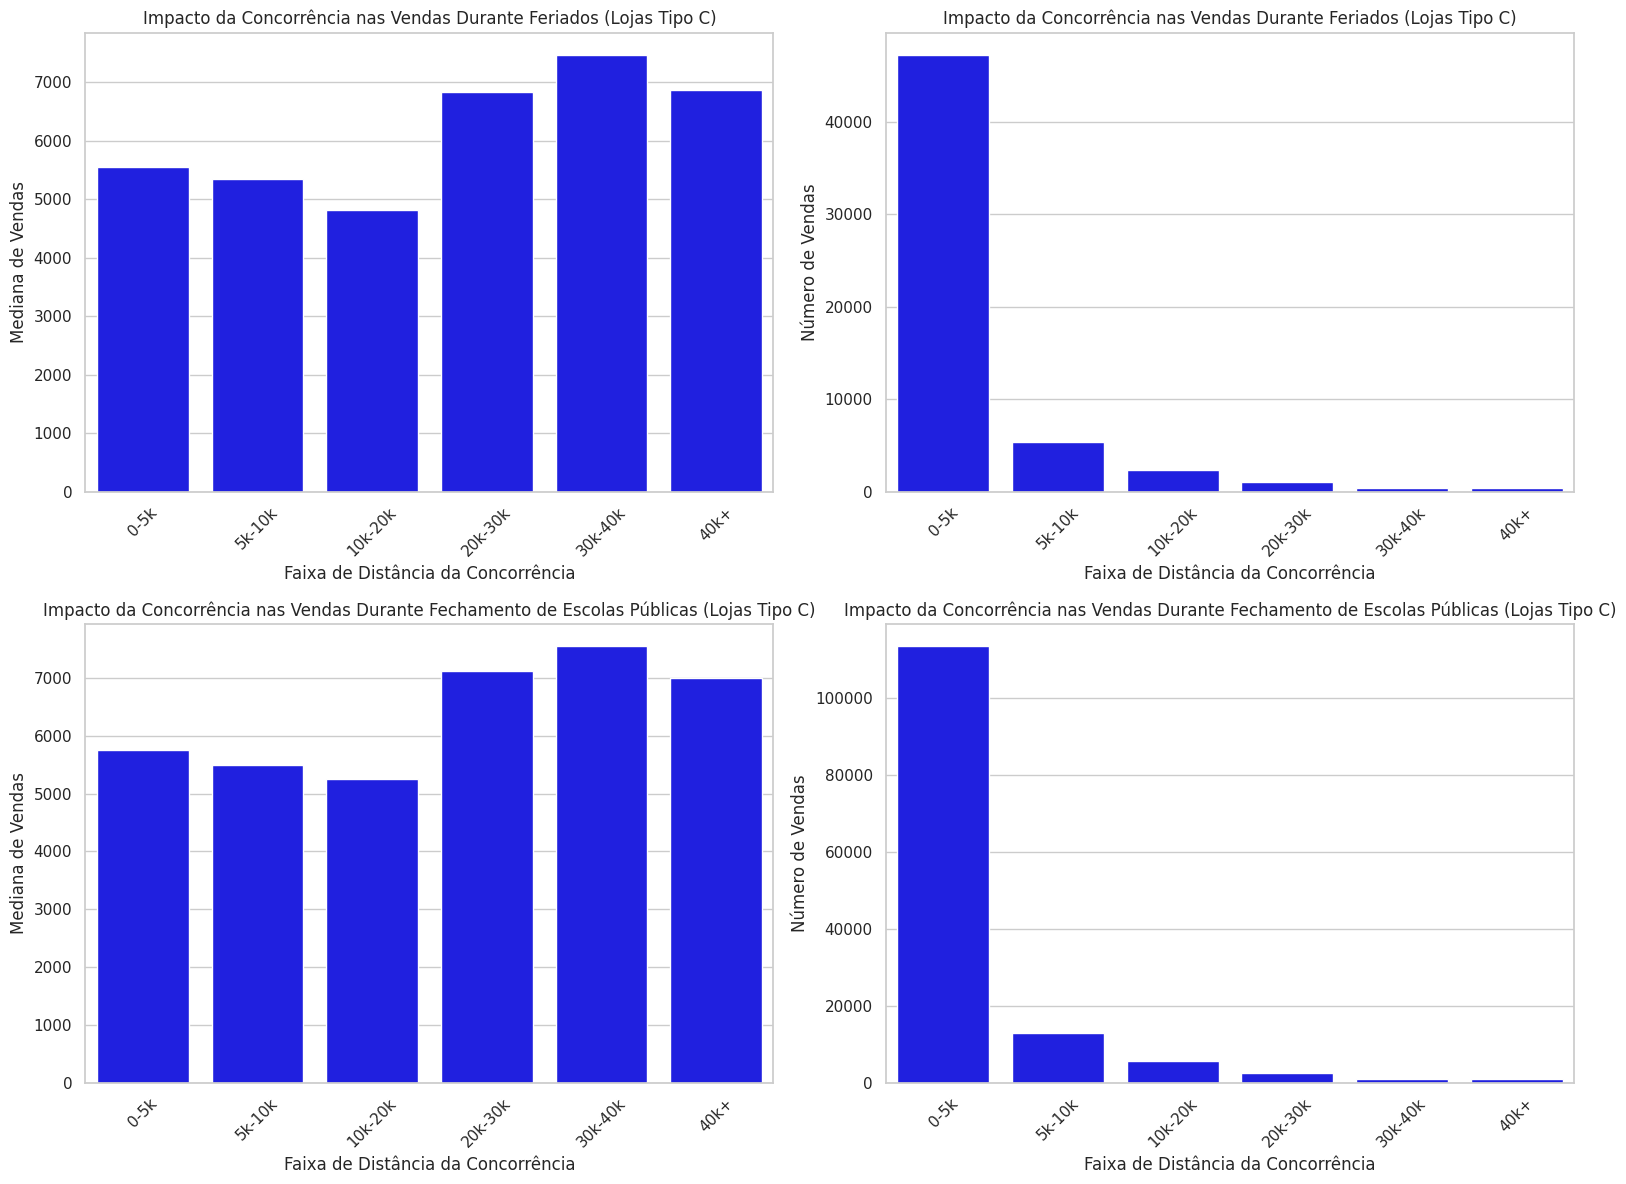

In [ ]:
# Filtra os dados apenas para lojas do tipo 'C' durante feriados estaduais e fechamento de escolas
store_type_c_holiday_state = base[(base['StoreType'] == 'c') & (base['StateHoliday'] != '0')]
store_type_c_holiday_school = base[(base['StoreType'] == 'c') & (base['SchoolHoliday'] != '0')]

# Cria faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, base['CompetitionDistance'].max()]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_c_holiday_state['DistanceGroup'] = pd.cut(store_type_c_holiday_state['CompetitionDistance'], bins=bins, labels=labels, right=False)
store_type_c_holiday_school['DistanceGroup'] = pd.cut(store_type_c_holiday_school['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Gráficos durante feriados estaduais
holiday_sales_state_mean = store_type_c_holiday_state.groupby('DistanceGroup', observed = False)['Sales'].median()
holiday_sales_state_count = store_type_c_holiday_state.groupby('DistanceGroup', observed = False)['Sales'].count()

# Gráficos durante fechamento de escolas públicas
holiday_sales_school_mean = store_type_c_holiday_school.groupby('DistanceGroup', observed = False)['Sales'].median()
holiday_sales_school_count = store_type_c_holiday_school.groupby('DistanceGroup', observed = False)['Sales'].count()

# Criação dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: mediana de Vendas durante feriados estaduais
sns.barplot(x=holiday_sales_state_mean.index, y=holiday_sales_state_mean.values, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Impacto da Concorrência nas Vendas Durante Feriados (Lojas Tipo C)")
axes[0, 0].set_ylabel("Mediana de Vendas")
axes[0, 0].set_xlabel("Faixa de Distância da Concorrência")
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Vendas durante feriados estaduais
sns.barplot(x=holiday_sales_state_count.index, y=holiday_sales_state_count.values, color='blue', ax=axes[0, 1])
axes[0, 1].set_title("Impacto da Concorrência nas Vendas Durante Feriados (Lojas Tipo C)")
axes[0, 1].set_ylabel("Número de Vendas")
axes[0, 1].set_xlabel("Faixa de Distância da Concorrência")
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: mediana de Vendas durante fechamento de escolas públicas
sns.barplot(x=holiday_sales_school_mean.index, y=holiday_sales_school_mean.values, color='blue', ax=axes[1, 0])
axes[1, 0].set_title("Impacto da Concorrência nas Vendas Durante Fechamento de Escolas Públicas (Lojas Tipo C)")
axes[1, 0].set_ylabel("Mediana de Vendas")
axes[1, 0].set_xlabel("Faixa de Distância da Concorrência")
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Número de Vendas durante fechamento de escolas públicas
sns.barplot(x=holiday_sales_school_count.index, y=holiday_sales_school_count.values, color='blue', ax=axes[1, 1])
axes[1, 1].set_title("Impacto da Concorrência nas Vendas Durante Fechamento de Escolas Públicas (Lojas Tipo C)")
axes[1, 1].set_ylabel("Número de Vendas")
axes[1, 1].set_xlabel("Faixa de Distância da Concorrência")
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()
plt.show()


**Conclusões**


- A maior concentração de vendas ocorre na faixa de 0-5k, indicando que lojas próximas à concorrência têm um maior fluxo de clientes durante feriados e fechamento de escolas.

- O número de vendas diminui drasticamente à medida que a distância da concorrência aumenta, destacando que a proximidade com outras lojas desempenha um papel importante no aumento do volume de vendas durante  feriados e fechamento de escolas.

- A mediana de vendas apresenta estabilidade ou leve crescimento em faixas mais distantes (20-40+ k), indicando que, em locais onde a concorrência é menos presente, as vendas por loja individual são maiores durante também feriados e fechamento de escolas. Isso sugere que lojas em áreas menos competitivas podem capturar um público mais fiel durante feriados.

---

**Insights**

- A proximidade com a concorrência (0-5 k) impulsiona o número total de vendas, tanto em feriados quanto durante o fechamento de escolas, evidenciando que áreas de alta densidade populacional concentram maior fluxo de consumidores.

- Em regiões distantes da concorrência (20-40+ k), as lojas conseguem capturar maior mediana de vendas por loja, reforçando a ideia de que há menos dispersão de clientes e maior fidelidade em locais com menos opções de compra.

- Ambos os períodos representam oportunidades significativas de vendas, sendo importante focar em estratégias específicas para maximizar os resultados em faixas mais próximas e mais distantes da concorrência, como:
   - Lojas próximas à concorrência devem aproveitar o alto fluxo de consumidores durante feriados com promoções e campanhas direcionadas.
   - Durante períodos de fechamento de escolas públicas, lojas devem considerar ações voltadas para as famílias, como descontos em itens essenciais ou ofertas para atrair o público local.

###**Análise da relação entre *concorrência*, *vendas* e *sortimento***

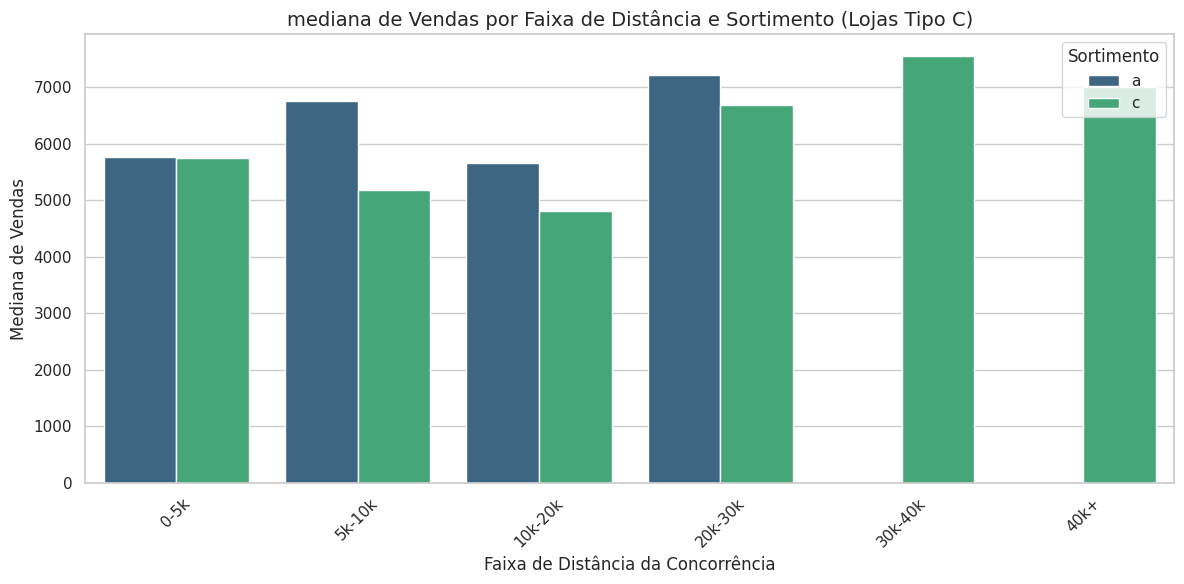

In [ ]:
# Agrupa os dados por faixas de distância e sortimento (Assortment)
distance_assortment_sales = store_type_c.groupby(['DistanceGroup', 'Assortment'], observed=False)['Sales'].median().reset_index()

# Configura os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de barras para a mediana de vendas por faixa de distância e sortimento
sns.barplot(
    data=distance_assortment_sales,
    x='DistanceGroup',
    y='Sales',
    hue='Assortment',
    palette='viridis'
)

# Personaliza o gráfico
plt.title('mediana de Vendas por Faixa de Distância e Sortimento (Lojas Tipo C)', fontsize=14)
plt.xlabel('Faixa de Distância da Concorrência', fontsize=12)
plt.ylabel('Mediana de Vendas', fontsize=12)
plt.legend(title='Sortimento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()


**Conclusões**

- O sortimento tipo A apresenta bom desempenho em faixas mais próximas (0-20k) e atinge um pico em 20k-30k, mas não tem alcance em áreas distantes (30k+).

- O sortimento tipo C é um diferencial em faixas mais distantes, com picos de vendas nas faixas 30k-40k e bom desempenho mesmo em áreas mais próximas.

- A ausência de vendas do tipo B sugere que ele pode ser descontinuado ou reformulado para atender melhor às necessidades do público-alvo.

**Insights**

- Avaliar a possibilidade de expandir o alcance logístico para faixas mais distantes, caso o sortimento tipo A seja uma prioridade estratégica, e focar em melhorar a oferta ou a experiência do cliente na faixa 20k-30k, onde as vendas atingem o pico.

- A faixa de distância 20k-40k é uma oportunidade estratégica que deve ser explorada, com potencial para alavancar vendas tanto do tipo A quanto do tipo C, já que o sortimento tipo A atinge seu pico na faixa 20k-30k e o sortimento tipo C cresce na faixa 20k-30k e atinge seu pico na faixa 30k-40k.

- Avaliar a necessidade de oferecer o sortimento tipo B na loja C, considerando sua baixa atratividade (ou não comercialização) nessa loja.




## **Loja D**

###**Análise da relação entre *concorrência* e *vendas***

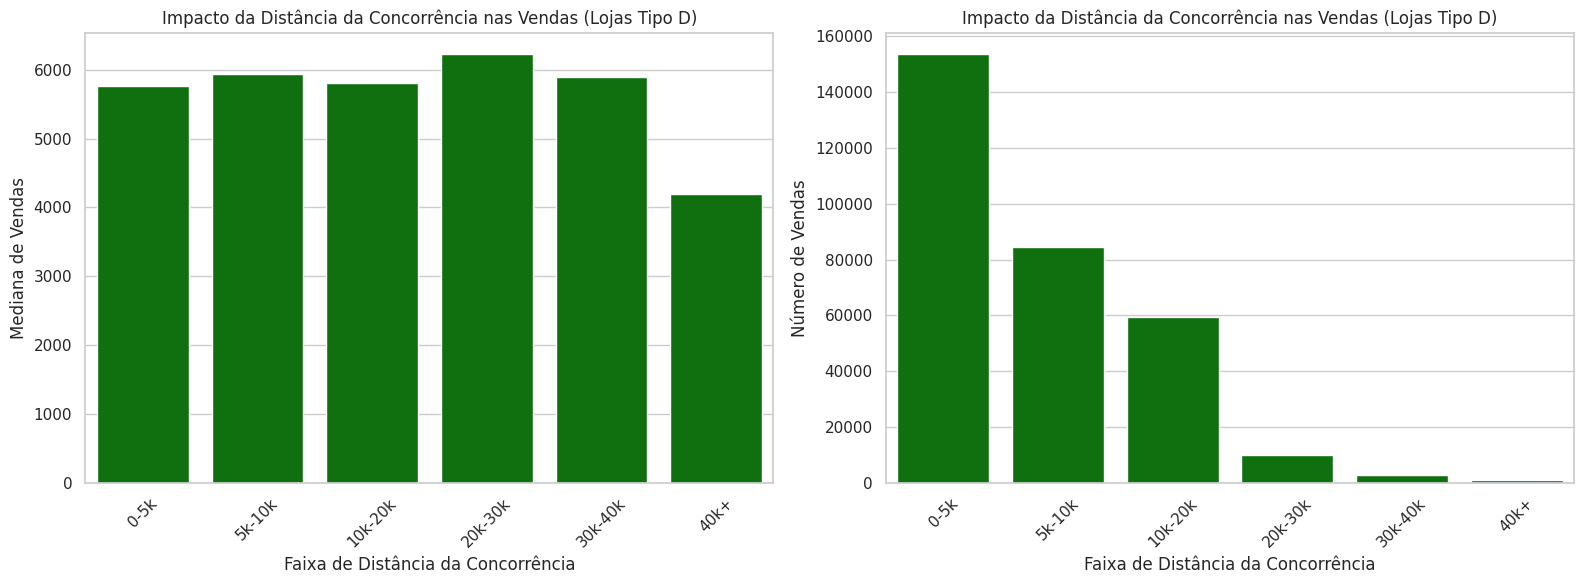

In [ ]:
# Filtra os dados apenas para lojas do tipo 'D'
store_type_d = base[base['StoreType'] == 'd'].copy()

# Exemplo para criar bins e calcular o impacto da distância
# Ensure bins are strictly increasing by adding a small value to the max
max_distance = store_type_d['CompetitionDistance'].max()

# Ajustando os valores dos bins para evitar duplicatas caso existam
bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
# Substitui max_distance + 1 por float('inf') para garantir que o último bin
# inclua todos os valores acima de 40k, evitando potenciais problemas se max_distance já estiver em um dos bins.

labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_d['DistanceGroup'] = pd.cut(store_type_d['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Calcula as métricas de vendas por faixa de distância
distance_sales_mean = store_type_d.groupby('DistanceGroup', observed=False)['Sales'].median()
distance_sales_count = store_type_d.groupby('DistanceGroup', observed=False)['Sales'].count()

# Criar os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: mediana de Vendas
sns.barplot(x=distance_sales_mean.index, y=distance_sales_mean.values, color='green', ax=axes[0])
axes[0].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo D)")
axes[0].set_ylabel("Mediana de Vendas")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Vendas
sns.barplot(x=distance_sales_count.index, y=distance_sales_count.values, color='green', ax=axes[1])
axes[1].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo D)")
axes[1].set_ylabel("Número de Vendas")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()
plt.show()


**Conclusões**

- Lojas com uma concorrência mais próxima (faixa de distância de 0-5k) apresentam maior número de vendas em comparação com as lojas em áreas onde os concorrentes estão mais distantes (40k+).

- Isso pode indicar que a proximidade da concorrência aumenta a atração de clientes para a região, promovendo mais fluxo de pessoas e potencialmente mais vendas.

- A queda acentuada nas vendas em regiões com concorrentes muito distantes (20k+ metros) sugere que a presença de concorrentes pode influenciar negativamente o desempenho das lojas.

- A mediana de vendas (gráfico superior) é relativamente estável nas faixas de distância até 30k metros, mas cai significativamente na faixa de 40k+ metros.

**Insights**

- Para lojas tipo D, as estratégias de localização podem considerar proximidade a concorrentes em áreas de alto fluxo para capitalizar no movimento gerado por outras lojas.

- Adicionalmente, ações promocionais e marketing podem ser intensificadas em regiões onde a concorrência é menor para atrair clientes.

###**Análise da relação entre *concorrência*, *vendas* e *clientes***

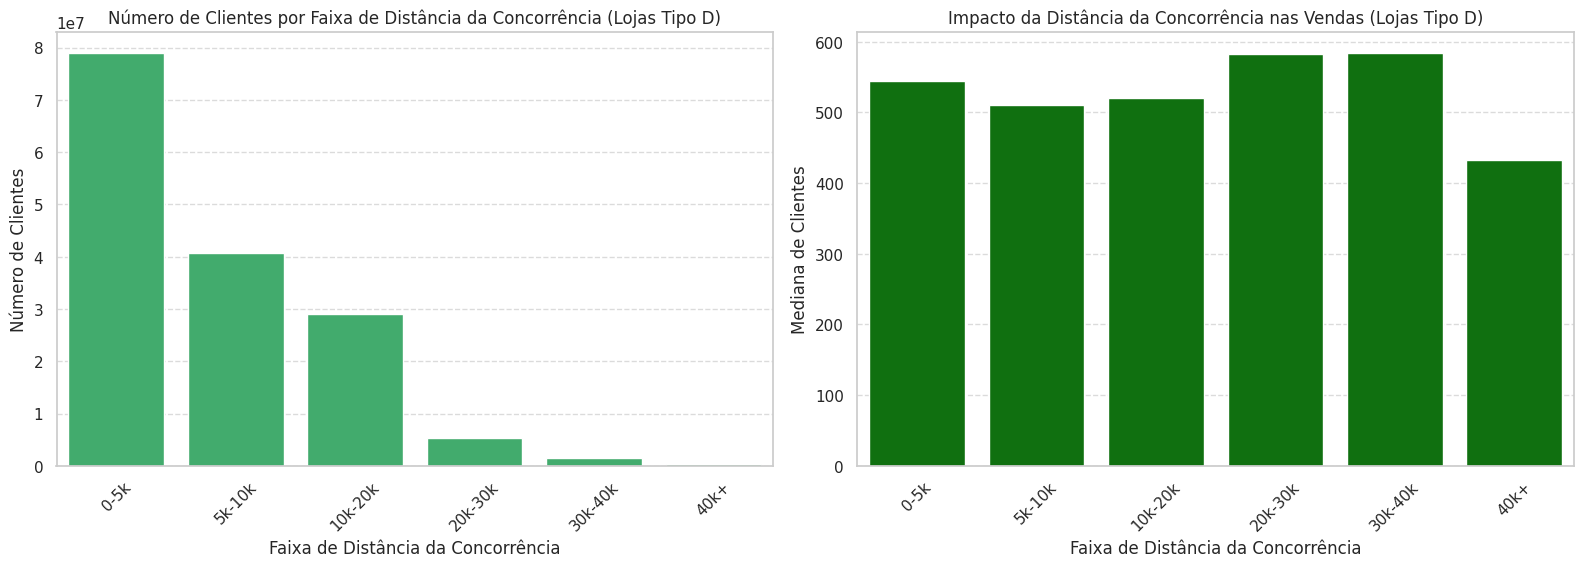

In [ ]:
# Dados simulados para representar 'store_type_d' e 'DistanceGroup'
# Substitua 'store_type_d' pelos seus dados reais
distance_group_customers = store_type_d.groupby('DistanceGroup', observed=False)['Customers'].sum()
sales_by_distance = store_type_d.groupby('DistanceGroup', observed=False)['Customers'].median()

# Criando a figura para dois gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Número total de clientes por faixa de distância
sns.barplot(
    x=distance_group_customers.index,
    y=distance_group_customers.values,
    color="#31bc6a",  # Cor verde
    ax=axes[0]
)
axes[0].set_title("Número de Clientes por Faixa de Distância da Concorrência (Lojas Tipo D)")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].set_ylabel("Número de Clientes")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: mediana de vendas por faixa de distância
sns.barplot(
    x=sales_by_distance.index,
    y=sales_by_distance.values,
    color="green",
    ax=axes[1]
)
axes[1].set_title("Impacto da Distância da Concorrência nas Vendas (Lojas Tipo D)")
axes[1].set_ylabel("Mediana de Clientes")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustando o layout
plt.tight_layout()
plt.show()


**Conclusões**

- A maior concentração de clientes está em lojas localizadas a até 5k da concorrência. Isso sugere que a proximidade com competidores pode ser um fator atrativo ou que essas áreas são mais densamente povoadas.

- Conforme a distância da concorrência aumenta, o número de clientes diminui drasticamente, indicando que áreas menos competitivas podem ter menor densidade populacional ou menos fluxo de consumidores.

- As lojas localizadas entre **30k-40k km** da concorrência apresentam a maior mediana de vendas. Isso pode indicar que, em áreas com menos concorrência, os consumidores têm maior dependência dessas lojas, o que resulta em maior receita por unidade.

- Lojas muito próximas à concorrência (0-5k) apresentam medianas de vendas menores, o que pode indicar impacto negativo da competição direta ou menor ticket médio.

**Insights**

- Proximidade com concorrentes pode gerar maior volume de clientes, mas não necessariamente maior receita, o que pode estar relacionado à divisão de mercado ou à presença de várias opções disponíveis para os consumidores.

- Lojas em áreas menos competitivas (distâncias maiores) podem ser mais estratégicas para capturar consumidores exclusivos.



###**Análise da relação entre *concorrência*, *vendas* e *promoção***

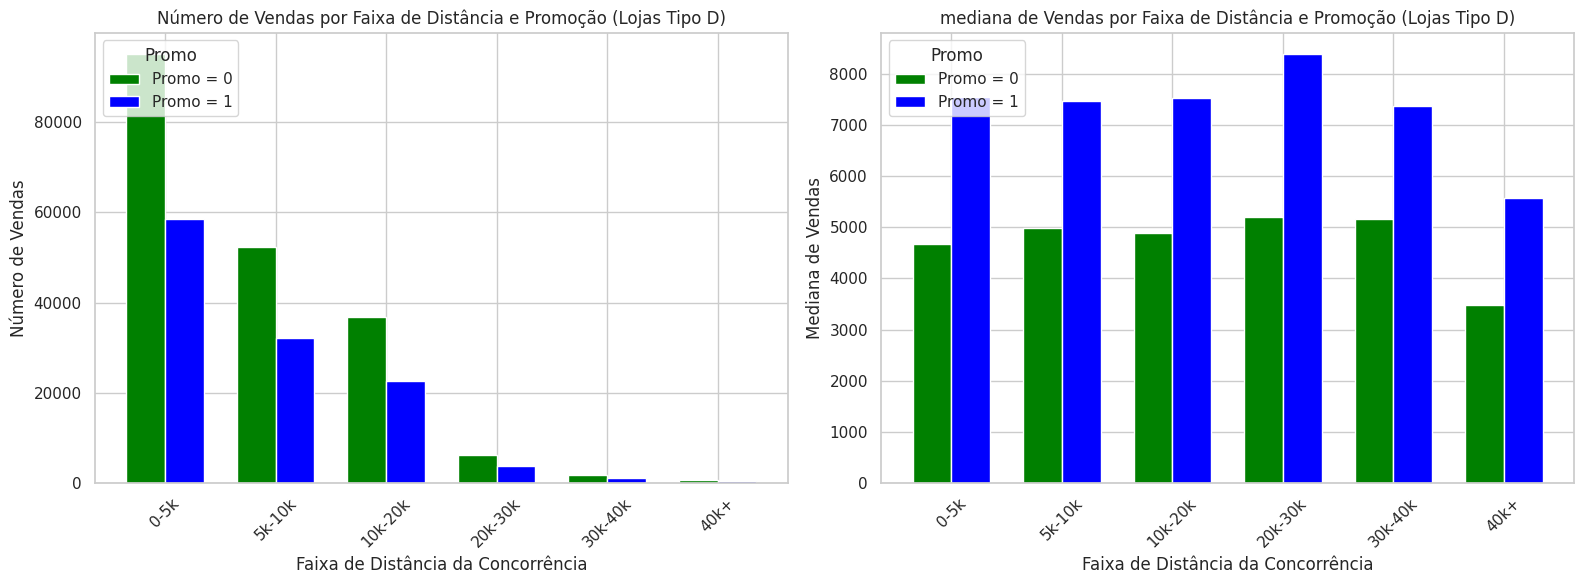

In [ ]:
# Filtra os dados para Promo = 0 e Promo = 1
store_type_d_promo_0 = store_type_d[store_type_d['Promo'] == 0]
store_type_d_promo_1 = store_type_d[store_type_d['Promo'] == 1]

# Contando o número de vendas por faixa de distância e promoção
sales_count_promo_0 = store_type_d_promo_0.groupby('DistanceGroup', observed=False)['Sales'].count()
sales_count_promo_1 = store_type_d_promo_1.groupby('DistanceGroup', observed=False)['Sales'].count()

# Calculando a mediana de vendas por faixa de distância e promoção
sales_mean_promo_0 = store_type_d_promo_0.groupby('DistanceGroup', observed=False)['Sales'].median()
sales_mean_promo_1 = store_type_d_promo_1.groupby('DistanceGroup', observed=False)['Sales'].median()

# Criando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Gráfico 1: Número de vendas
axes[0].bar(range(len(sales_count_promo_0)), sales_count_promo_0.values, width=0.35, label='Promo = 0', color='green')
axes[0].bar([i + 0.35 for i in range(len(sales_count_promo_0))], sales_count_promo_1.values, width=0.35, label='Promo = 1', color='blue')
axes[0].set_title("Número de Vendas por Faixa de Distância e Promoção (Lojas Tipo D)")
axes[0].set_xlabel("Faixa de Distância da Concorrência")
axes[0].set_ylabel("Número de Vendas")
axes[0].set_xticks([i + 0.175 for i in range(len(sales_count_promo_0))])
axes[0].set_xticklabels(sales_count_promo_0.index, rotation=45)
axes[0].legend(title='Promo', loc='upper left')

# Gráfico 2: Média de vendas
axes[1].bar(range(len(sales_mean_promo_0)), sales_mean_promo_0.values, width=0.35, label='Promo = 0', color='green')
axes[1].bar([i + 0.35 for i in range(len(sales_mean_promo_0))], sales_mean_promo_1.values, width=0.35, label='Promo = 1', color='blue')
axes[1].set_title("mediana de Vendas por Faixa de Distância e Promoção (Lojas Tipo D)")
axes[1].set_xlabel("Faixa de Distância da Concorrência")
axes[1].set_ylabel("Mediana de Vendas")
axes[1].set_xticks([i + 0.175 for i in range(len(sales_mean_promo_0))])
axes[1].set_xticklabels(sales_mean_promo_0.index, rotation=45)
axes[1].legend(title='Promo', loc='upper left')

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()

**Conclusões**

- Para lojas próximas à concorrência (0-5 k), o número de vendas é significativamente maior quando há promoções em comparação com as outras lojas em outras faixas de distâncias. Isso destaca a importância das promoções em áreas de alta competitividade para atrair clientes.
  
- Para lojas em distâncias intermediárias (5k-20k) O impacto das promoções ainda é positivo, mas o número absoluto de vendas é menor do que em faixas mais próximas à concorrência. Isso pode indicar menor densidade populacional ou menor fluxo de consumidores nessas áreas, evidenciado na análise passada.

- O número de vendas cai drasticamente, independentemente da promoção, sugerindo que a localização tem um papel mais crítico do que o efeito das promoções em regiões remotas.

- As lojas que oferecem promoções apresentam uma mediana de vendas quase duas vezes maior do que as lojas sem promoções, independentemente da distância da concorrência.
  
- Lojas distantes da concorrência apresentam um aumento considerável na mediana de vendas durante promoções. Isso pode ser atribuído à falta de opções competitivas nas proximidades.

---

**Insights**

- Promoções são importantes em áreas de alta competitividade (0-5 k):

- As promoções têm impacto positivo em todas as distâncias, destacando sua eficácia para impulsionar vendas, mesmo em áreas de menor densidade populacional.

-Estratégias diferentes para distâncias diferentes:
   - Áreas competitivas: Promoções devem ser uma prioridade.
   - Áreas menos competitivas: Promoções ainda são eficazes, mas talvez sejam necessárias menos frequentemente, dependendo da demanda local.

---


####**Análise da relação entre *concorrência*, *vendas*, *promo* e *promo2***

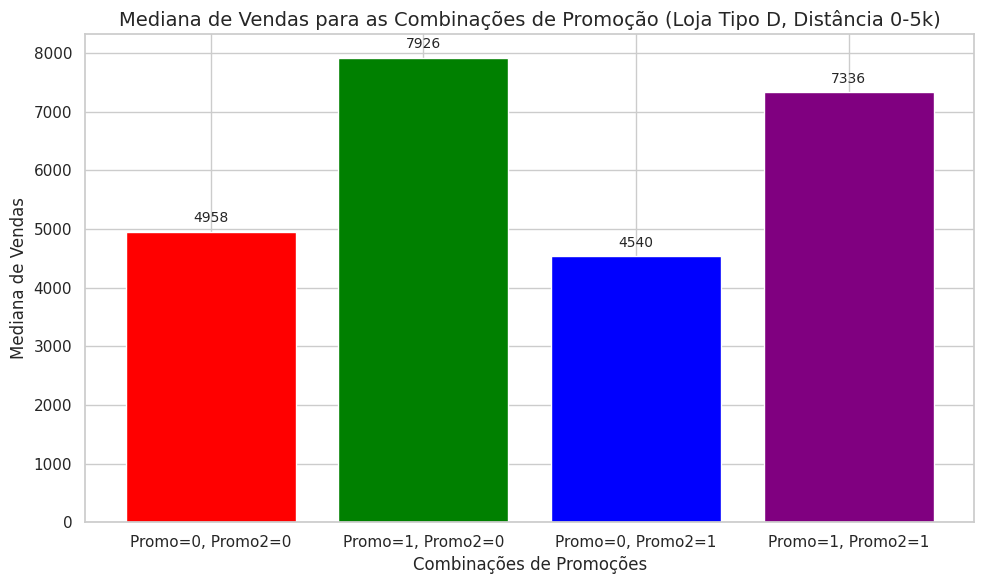

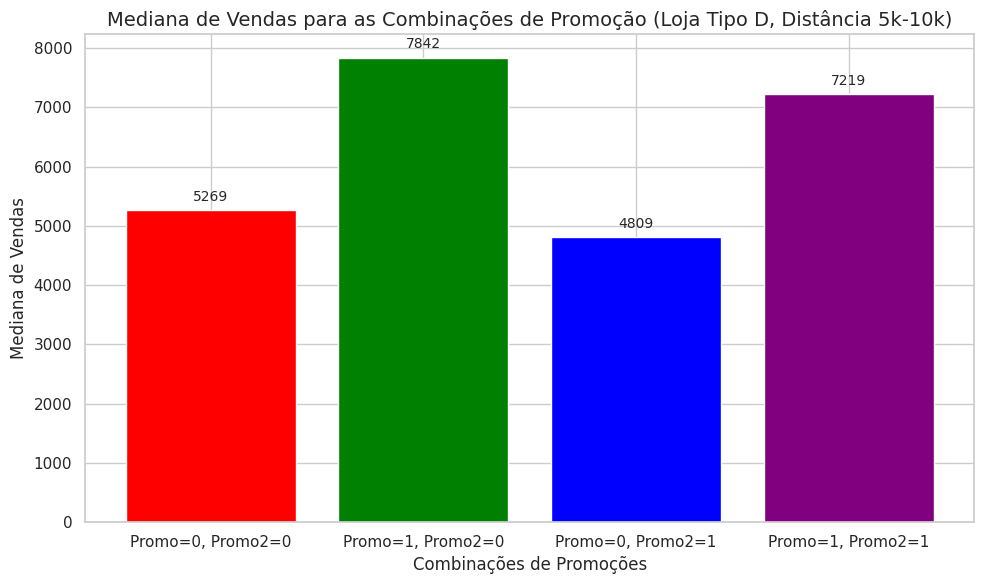

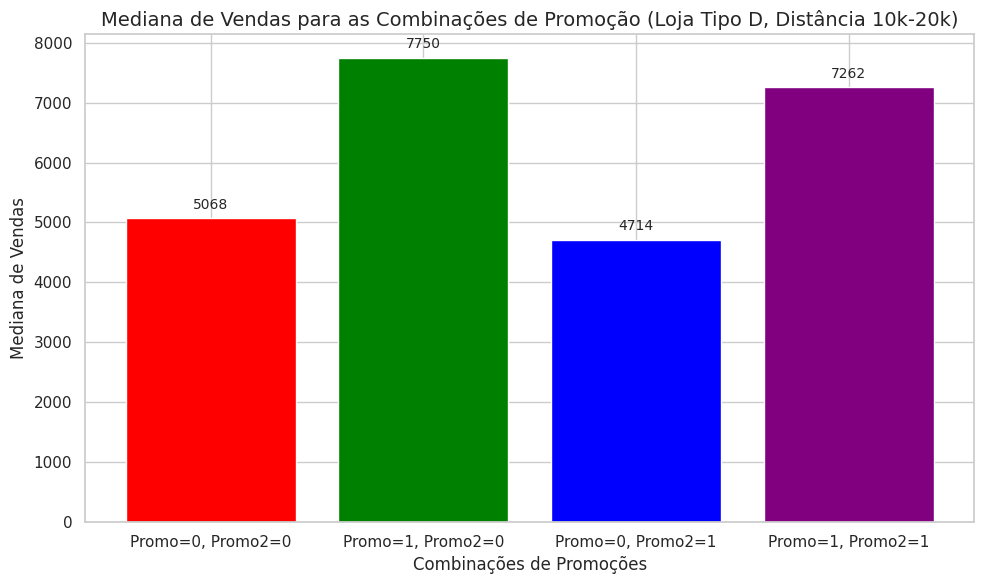

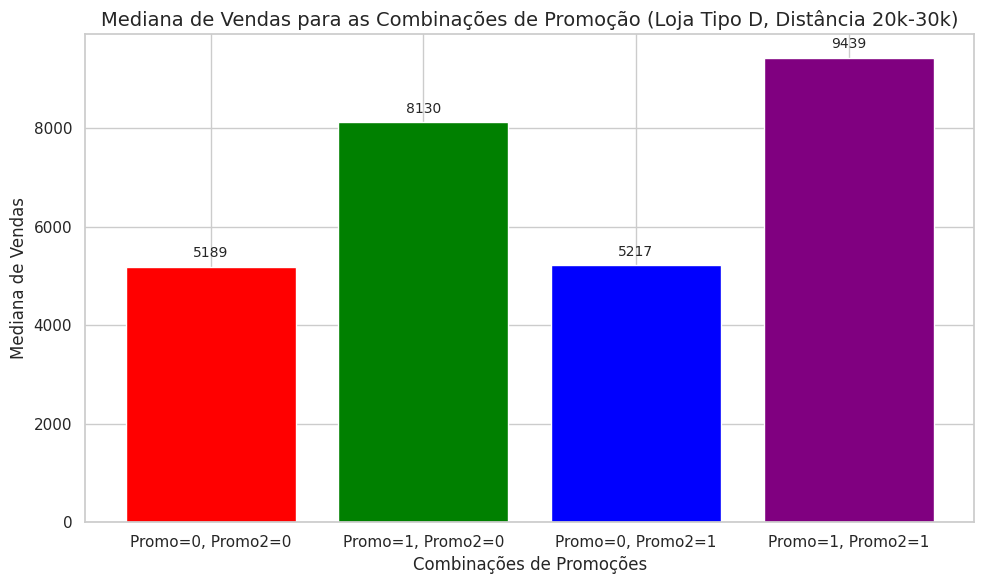

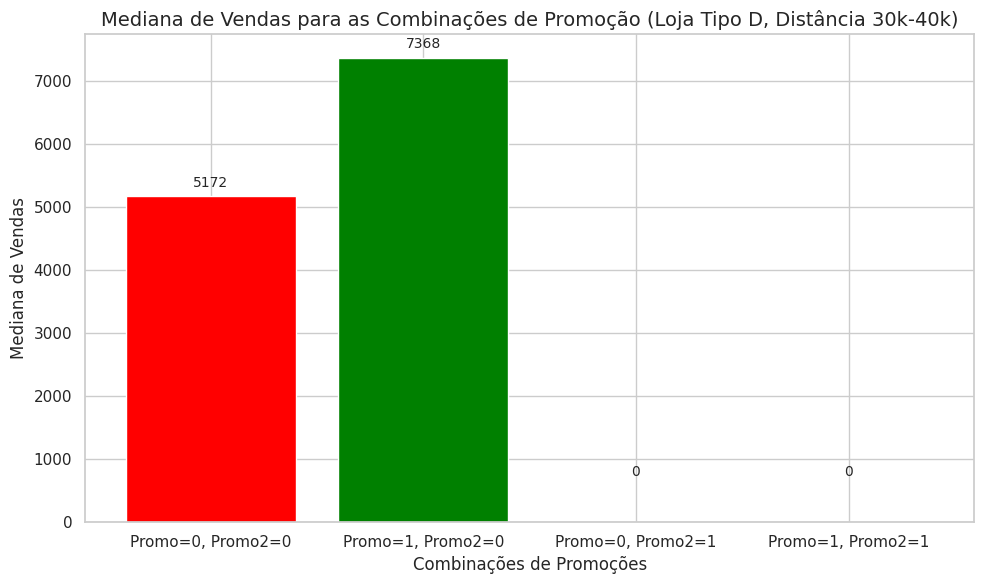

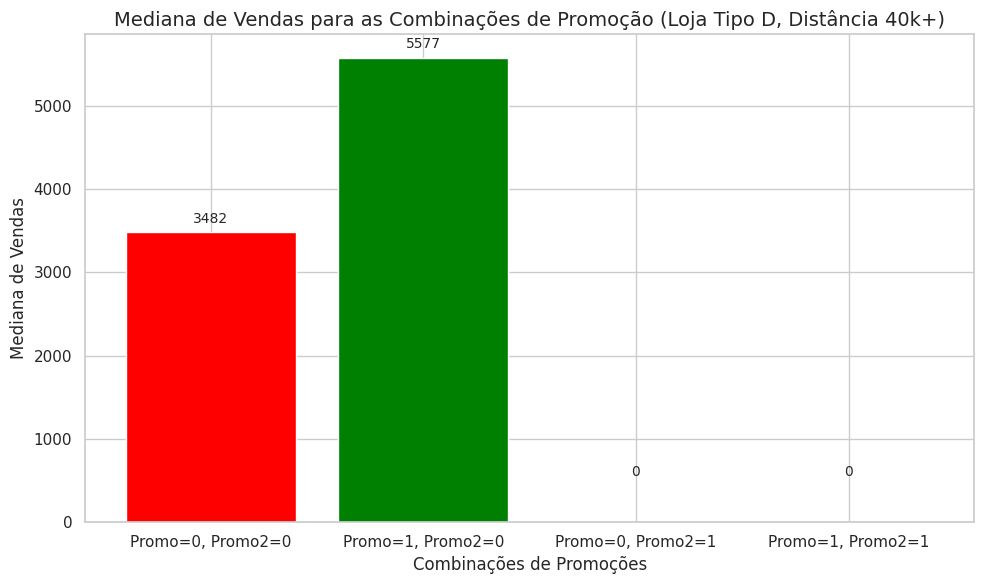

In [ ]:
# Definindo as faixas de distância e seus rótulos
bins = [0, 5000, 10000, 20000, 30000, 40000, float('inf')]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

# Filtrando apenas para lojas do tipo A
store_type_a = base[base['StoreType'] == 'd']

# Iterando pelas faixas de distância para gerar gráficos
for distance_label in labels:
    # Filtrando os dados para a faixa de distância atual
    store_type_a_distance = store_type_a[store_type_a['DistanceGroup'] == distance_label]

    # Agrupar as vendas com base nas combinações de Promo e Promo2
    sales_promo_combinations = store_type_a_distance.groupby(['Promo', 'Promo2'])['Sales'].median().reset_index()

    # Garantindo que todas as combinações possíveis de Promo e Promo2 estejam presentes
    combinations = [(0, 0), (1, 0), (0, 1), (1, 1)]
    sales_values = []

    for promo, promo2 in combinations:
        sales_value = sales_promo_combinations[
            (sales_promo_combinations['Promo'] == promo) &
            (sales_promo_combinations['Promo2'] == promo2)
        ]['Sales'].sum()
        sales_values.append(sales_value)

    # Criando os rótulos para as barras
    promo_labels = ['Promo=0, Promo2=0', 'Promo=1, Promo2=0', 'Promo=0, Promo2=1', 'Promo=1, Promo2=1']

    # Gerando o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(promo_labels, sales_values, color=['red', 'green', 'blue', 'purple'])

    # Adicionando títulos e rótulos
    plt.title(f'Mediana de Vendas para as Combinações de Promoção (Loja Tipo D, Distância {distance_label})', fontsize=14)
    plt.xlabel('Combinações de Promoções', fontsize=12)
    plt.ylabel('Mediana de Vendas', fontsize=12)

    # Adicionando os valores acima das barras
    for i, value in enumerate(sales_values):
        plt.text(i, value + max(sales_values) * 0.02 if value > 0 else max(sales_values) * 0.1,
                 str(int(value)), ha='center', fontsize=10)

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

**Conclusões**

- Promo = 1 e Promo2 = 0 domina faixas próximas (0-20k)

- Promo = 1 e Promo2 = 1 ganha destaque na faixa 20-30k

- Sem promoções não gera impacto significativo (Promo = 0)

- Há ausência de Promo = 0 e Promo2 = 1 ou Promo = 1 e Promo2 = 1 em faixas 30k+

**Insights**

- Nas faixas de 0-20k, priorizar promoções pontuais (Promo = 1) para maximizar o retorno.

- Aproveitar a eficácia da combinação Promo = 1 e Promo = 1 na faixa de 20-30k reforçando promoções contínuas com campanhas pontuais para gerar impacto maior.

- As combinações sem promoções pontuais (Promo = 0) têm impacto muito limitado. Reduzir o investimento nessas campanhas ou concentrar esforços nas outras estratégias.

- Em áreas distantes dos concorrentes (30k+), promoções contínuas (Promo2 = 1) podem não ser uma boa estratégia. Em vez disso, foco em promoções pontuais. Ainda assim, talvez seja necessário redirecionar esforços para melhorar a experiência local para que as promoções contínuas gerem impacto significativo.


###**Análise da relação entre *concorrência*, *vendas* e *feriados/fechamento de escolas***

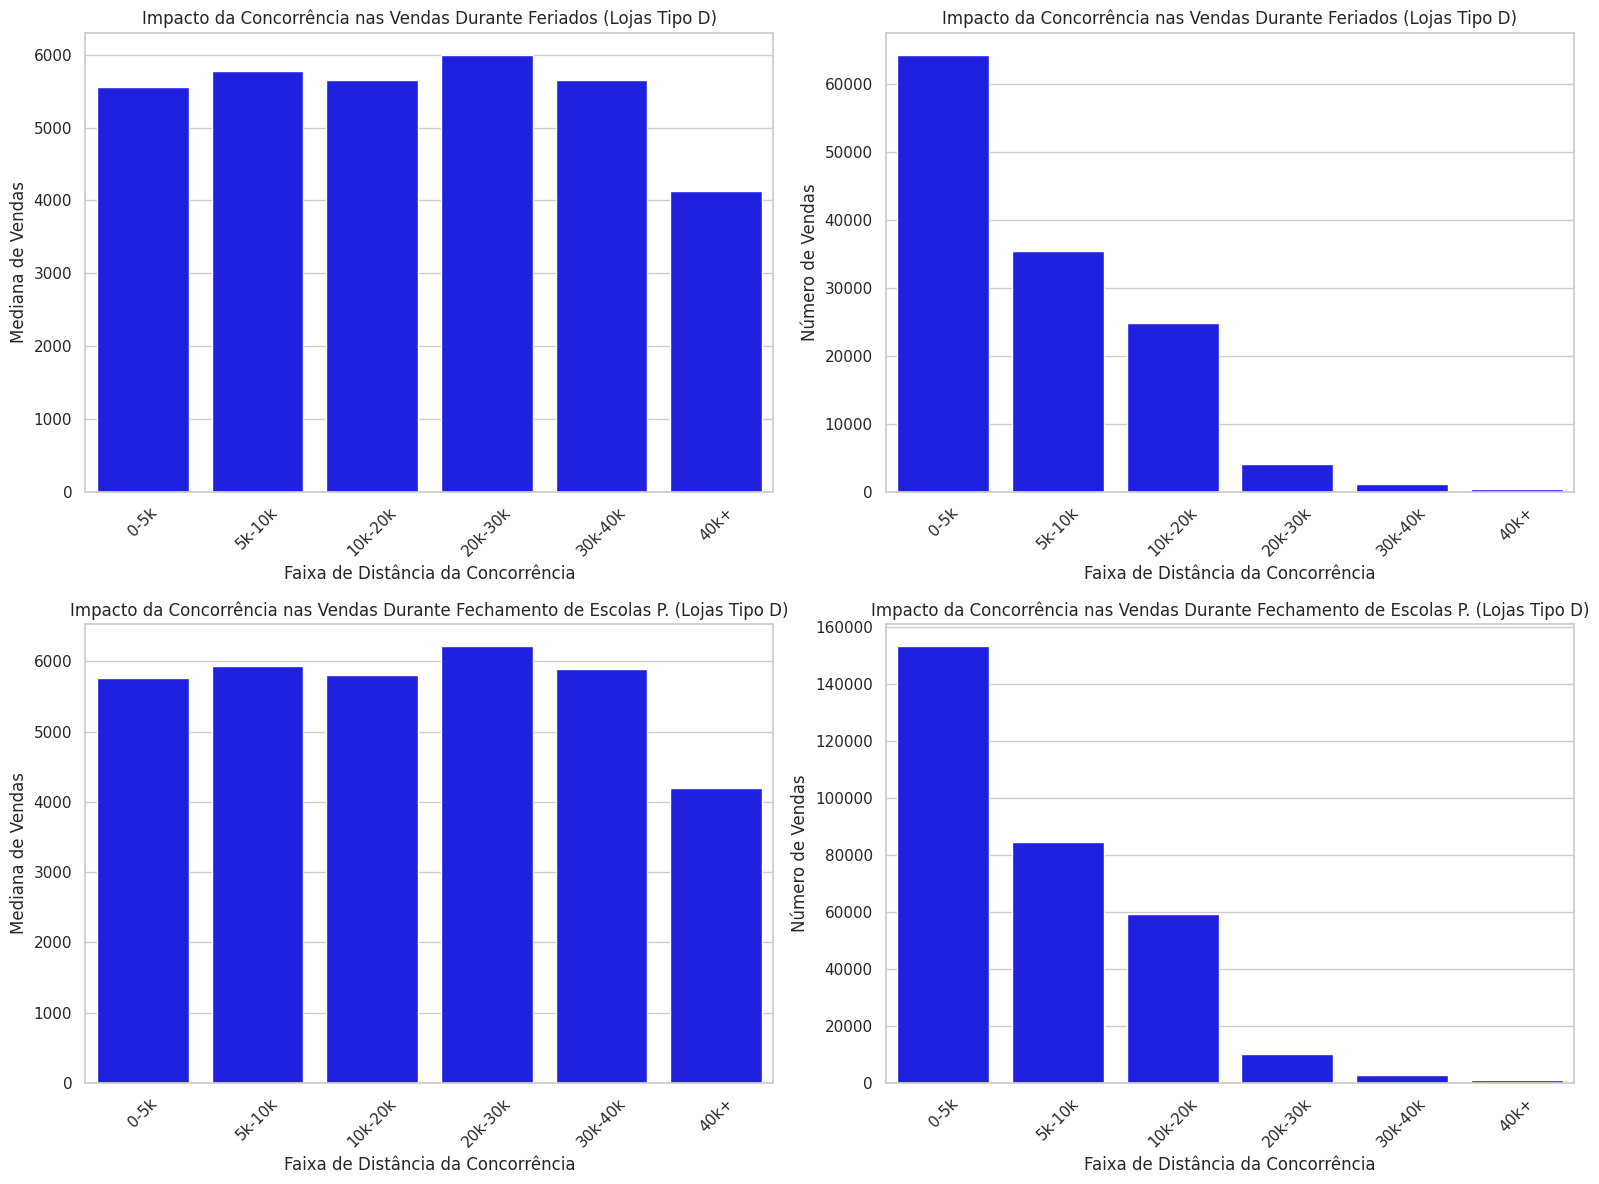

In [ ]:
# Filtra os dados apenas para lojas do tipo 'D' durante feriados estaduais e fechamento de escolas
store_type_d_holiday_state = base[(base['StoreType'] == 'd') & (base['StateHoliday'] != '0')]
store_type_d_holiday_school = base[(base['StoreType'] == 'd') & (base['SchoolHoliday'] != '0')]

# Cria faixas de distância da concorrência
bins = [0, 5000, 10000, 20000, 30000, 40000, base['CompetitionDistance'].max()]
labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

store_type_d_holiday_state['DistanceGroup'] = pd.cut(store_type_d_holiday_state['CompetitionDistance'], bins=bins, labels=labels, right=False)
store_type_d_holiday_school['DistanceGroup'] = pd.cut(store_type_d_holiday_school['CompetitionDistance'], bins=bins, labels=labels, right=False)

# Gráficos durante feriados estaduais
holiday_sales_state_mean = store_type_d_holiday_state.groupby('DistanceGroup', observed=False)['Sales'].median()
holiday_sales_state_count = store_type_d_holiday_state.groupby('DistanceGroup', observed=False)['Sales'].count()

# Gráficos durante fechamento de escolas públicas
holiday_sales_school_mean = store_type_d_holiday_school.groupby('DistanceGroup', observed=False)['Sales'].median()
holiday_sales_school_count = store_type_d_holiday_school.groupby('DistanceGroup', observed=False)['Sales'].count()

# Criação dos subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Média de Vendas durante feriados estaduais
sns.barplot(x=holiday_sales_state_mean.index, y=holiday_sales_state_mean.values, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Impacto da Concorrência nas Vendas Durante Feriados (Lojas Tipo D)")
axes[0, 0].set_ylabel("Mediana de Vendas")
axes[0, 0].set_xlabel("Faixa de Distância da Concorrência")
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Número de Vendas durante feriados estaduais
sns.barplot(x=holiday_sales_state_count.index, y=holiday_sales_state_count.values, color='blue', ax=axes[0, 1])
axes[0, 1].set_title("Impacto da Concorrência nas Vendas Durante Feriados (Lojas Tipo D)")
axes[0, 1].set_ylabel("Número de Vendas")
axes[0, 1].set_xlabel("Faixa de Distância da Concorrência")
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: mediana de Vendas durante fechamento de escolas públicas
sns.barplot(x=holiday_sales_school_mean.index, y=holiday_sales_school_mean.values, color='blue', ax=axes[1, 0])
axes[1, 0].set_title("Impacto da Concorrência nas Vendas Durante Fechamento de Escolas P. (Lojas Tipo D)")
axes[1, 0].set_ylabel("Mediana de Vendas")
axes[1, 0].set_xlabel("Faixa de Distância da Concorrência")
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Número de Vendas durante fechamento de escolas públicas
sns.barplot(x=holiday_sales_school_count.index, y=holiday_sales_school_count.values, color='blue', ax=axes[1, 1])
axes[1, 1].set_title("Impacto da Concorrência nas Vendas Durante Fechamento de Escolas P. (Lojas Tipo D)")
axes[1, 1].set_ylabel("Número de Vendas")
axes[1, 1].set_xlabel("Faixa de Distância da Concorrência")
axes[1, 1].tick_params(axis='x', rotation=45)

# Ajusta o layout
plt.tight_layout()
plt.show()


**Conclusões**


- A maior concentração de vendas ocorre na faixa de 0-5k, indicando que lojas próximas à concorrência têm um maior fluxo de clientes durante feriados e fechamento de escolas.

- O número de vendas diminui relativamente para lojas em faixas de 5-20k e drasticamente à medida que a distância da concorrência aumenta mais (20+), reforçando que a proximidade com outras lojas desempenha um papel importante no aumento do volume de vendas durante feriados e fechamento de escolas.

- A mediana de vendas apresenta estabilidade e até leve crescimento em faixas mais distantes (20-40k), indicando que, em locais onde a concorrência é menos presente, as vendas por loja individual são maiores durante também feriados e fechamento de escolas. Isso sugere que lojas em áreas menos competitivas podem capturar um público mais fiel durante feriados.

---

**Insights**

- A proximidade com a concorrência (0-5 k) impulsiona o número total de vendas, tanto em feriados quanto durante o fechamento de escolas, evidenciando que áreas de alta densidade populacional concentram maior fluxo de consumidores.

- Em regiões distantes da concorrência (20-40 k), as lojas conseguem capturar maior mediana de vendas por loja, reforçando a ideia de que há menos dispersão de clientes e maior fidelidade em locais com menos opções de compra.

- Ambos os períodos representam oportunidades significativas de vendas, sendo importante focar em estratégias específicas para maximizar os resultados em faixas mais próximas e mais distantes da concorrência, como:
   - Lojas próximas à concorrência devem aproveitar o alto fluxo de consumidores durante feriados com promoções e campanhas direcionadas.
   - Durante períodos de fechamento de escolas públicas, lojas devem considerar ações voltadas para as famílias, como descontos em itens essenciais ou ofertas para atrair o público local.
   - Lojas distantes, apesar de haver menor concorrência, o volume de vendas é reduzido. Investimentos em marketing direcionado ou melhorias logísticas podem ser necessários para maximizar o potencial dessas lojas também durante feriados/fechamento de escolas.

###**Análise da relação entre *concorrência*, *vendas* e *sortimento***

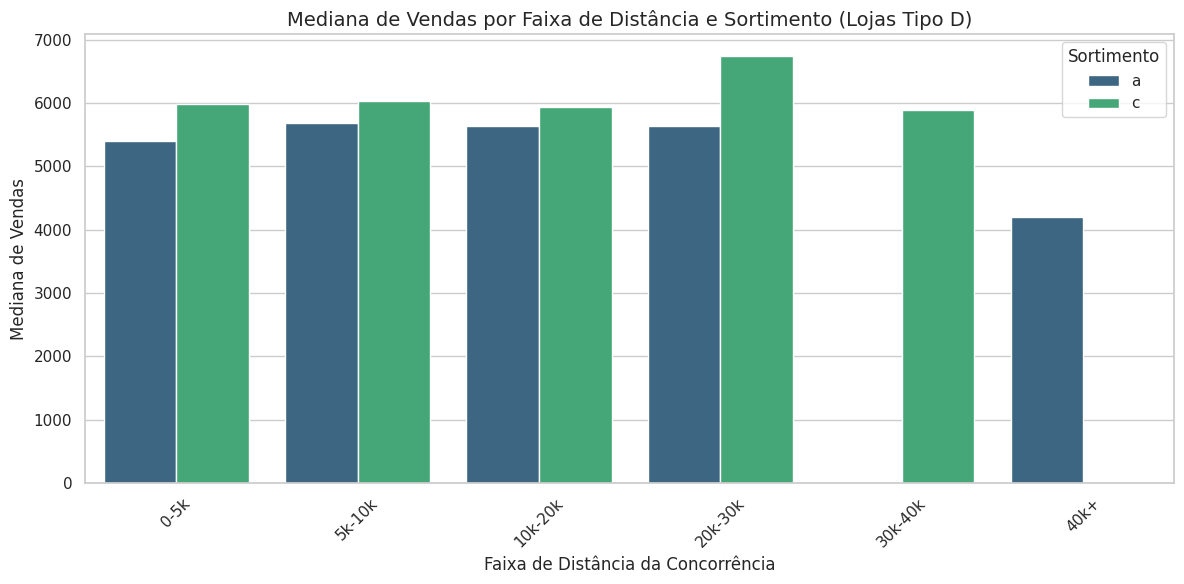

In [ ]:
# Agrupa os dados por faixas de distância e sortimento (Assortment)
distance_assortment_sales = store_type_d.groupby(['DistanceGroup', 'Assortment'], observed=False)['Sales'].median().reset_index()

# Configura os gráficos
plt.figure(figsize=(12, 6))

# Gráfico de barras para a média de vendas por faixa de distância e sortimento
sns.barplot(
    data=distance_assortment_sales,
    x='DistanceGroup',
    y='Sales',
    hue='Assortment',
    palette='viridis'
)

# Personaliza o gráfico
plt.title('Mediana de Vendas por Faixa de Distância e Sortimento (Lojas Tipo D)', fontsize=14)
plt.xlabel('Faixa de Distância da Concorrência', fontsize=12)
plt.ylabel('Mediana de Vendas', fontsize=12)
plt.legend(title='Sortimento', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()


**Conclusões**

- O sortimento tipo A tem um desempenho estável nas faixas 0-30k, mas apresenta lacunas na faixa 20k-30k (pode ser devido à falta de presença ou baixa atratividade do sortimento nessa área) e uma redução acentuada na faixa 40k+ (pode indicar limitações logísticas ou menor interesse dos consumidores nessa região).

- O sortimento tipo C é um diferencial estratégico, com um pico de vendas na faixa 20k-30k e desempenho estável nas faixas próximas (0-20k). Sua ausência na faixa 40k+ é um ponto de atenção (pode estar relacionada a fatores logísticos ou menor interesse do público nessa região).

- A ausência de vendas do tipo B sugere que ele pode ser descontinuado ou reformulado.

**Insights**

- Melhorar a atratividade do sortimento tipo A para áreas distantes (40k+) com estratégias como promoções ou maior divulgação.

- Explorar estratégias para aumentar o alcance do sortimento tipo C na faixa 40k+, como promoções ou parcerias locais para reduzir barreiras de logística.

- Avaliar a necessidade de oferecer o sortimento tipo B na loja C, considerando sua baixa atratividade (ou não comercialização) nessa loja.




#**Relatório Final**

Com base em uma análise aprofundada dos dados de vendas, este relatório apresenta recomendações estratégicas para impulsionar os resultados da CerreiraFosta Ltda. Abordamos fatores críticos como o desempenho das vendas, o comportamento dos clientes, os tipos de lojas e as tendências de mercado ao longo do tempo. Nosso objetivo principal é aumentar a conversão de vendas e elevar a receita, aproveitando os pontos fortes da empresa, diminuindo as oportunidades perdidas e otimizando a eficiência das prospecções.

Para isso, iremos avaliar o desempenho comercial da empresa, definindo perfis estratégicos de vendas e segmentos de mercado prioritários. Essas ações permitirão um direcionamento mais assertivo nos esforços de vendas e atendimento, garantindo crescimento sustentável e fortalecendo a posição da CerreiraFosta como uma líder competitiva e inovadora no mercado de produtos para o lar.

## **Características relacionadas ao sucesso das vendas**



**Insight:**

- A análise conduzida pela equipe PigData revelou que os principais fatores associados ao sucesso das vendas incluem promoções estratégicas, localização em relação à concorrência, comportamento dos clientes, tipo de loja e datas especiais, como feriados.

**Como Influencia?**

- **Promoções Pontuais (Promo1):** Este tipo de promoção demonstrou ser o principal motor de aumento nas vendas, gerando uma alta movimentação de clientes, especialmente aqueles localizados em áreas com menor proximidade de concorrentes. Essa estratégia não apenas eleva o volume de vendas, mas também amplia a visibilidade da loja na região.

- **Feriados:** Foi identificado que os feriados escolares têm um impacto positivo nas vendas para a maioria das lojas, refletindo uma oportunidade de atrair famílias e consumidores que aproveitam esses períodos para compras. No entanto, apenas a loja B apresenta um aumento significativo de vendas em feriados estaduais, sugerindo que este padrão está associado às características específicas da região em que opera.

- **Final de Semana:** A loja B, que opera aos domingos, apresentou o segundo maior volume de vendas nesse dia, destacando uma demanda significativa que não está sendo aproveitada pelas demais lojas.




###O que pode ser feito para otimizar as vendas?

- **Aprimorar Promoções:** Focar na expansão das promoções pontuais (Promo1) em vez das contínuas (Promo2), devido à sua maior eficácia em atrair clientes e impulsionar vendas. Além disso, recomenda-se ampliar a aplicação dessas promoções para incluir finais de semana, maximizando o alcance e o impacto.
- **Operação nos Feriados Escolares:** Priorizar a abertura das lojas durante feriados escolares, dada a oportunidade de captar o aumento de vendas nesses períodos. Para feriados estaduais, recomenda-se uma análise regional detalhada para identificar se outras lojas podem replicar o desempenho positivo observado na loja B.

- **Explorar Diferenciação Geográfica:** Adotar estratégias personalizadas com base na localização e proximidade de concorrentes, reforçando a presença da marca em áreas estratégicas e criando um diferencial competitivo.

## **Fatores que indicam que uma oportunidade tem maior chance de ser fechada**

- **Proximidade à Concorrência:**  

  A presença de concorrentes diretos pode atrair consumidores adicionais, criando um fluxo compartilhado que aumenta as chances de conversão. Nessas áreas, promoções eficazes são cruciais para capturar a atenção dos clientes e destacar o valor agregado da loja.

- **Menor Concorrência em Regiões Afastadas:**  

  Regiões com baixa densidade de concorrentes apresentam uma oportunidade estratégica para fidelizar clientes e capturar uma fatia consistente do mercado. Promoções direcionadas e um mix de produtos ajustado às necessidades locais tornam essas áreas ainda mais atrativas, mesmo com menor fluxo populacional.

- **Ajuste no Sortimento:**  

  Personalizar o sortimento de produtos com base no perfil do consumidor local é um diferencial essencial. Itens do tipo C demonstraram forte demanda e potencial para impulsionar vendas em áreas específicas, evidenciando que um portfólio adaptado é chave para o sucesso.

- **Promoções:**  
  - **Promoções Tradicionais (Promo = 1):**
     Estas geram um impacto significativo, especialmente em áreas próximas à concorrência (0-5 km), onde os consumidores tendem a ser mais sensíveis ao preço, e em regiões remotas (>40 km), onde promoções atraem e fidelizam os clientes.  
  - **Promoções Combinadas (Promo + Promo2):**
    Mostram-se mais eficazes em áreas intermediárias (10-30 km), onde o tráfego é moderado, mas o impacto dos incentivos é maximizado, potencializando o volume de vendas.  
  - **Promoções Sazonais:**
    Aproveitar datas como feriados e períodos de alta demanda é essencial para captar oportunidades de consumo. Em regiões com maior concentração populacional, ações sazonais podem se tornar um fator decisivo para aumentar o tráfego e melhorar o desempenho.

Essas estratégias, alinhadas a uma análise contínua do mercado, possibilitam decisões mais assertivas e um impacto positivo no fechamento de oportunidades.

##**Como a concorrência interfere no desempenho da empresa?**







###Lojas tipo A

1. **Impacto geral da concorrência:**

  - A concorrência tem impacto variável nas vendas das lojas tipo A, dependendo da distância. Áreas próximas à concorrência (0-5 km) mostram maior densidade de clientes e vendas, enquanto áreas mais distantes (30-40 km) apresentam quedas, mas há recuperação em distâncias superiores a 40 km.

  - Em faixas próximas à concorrência (até 30 km), as vendas e a mediana de clientes são relativamente consistentes, sugerindo fidelidade ou atratividade das lojas nessas áreas.

2. **Importância das promoções:**

  - Promoções têm impacto significativo em todas as faixas de distância, especialmente em regiões competitivas próximas (0-5 km) e em áreas mais remotas (>40 km).

  - Promoções combinadas (Promo = 1, Promo2 = 1) são mais eficazes em distâncias intermediárias (10-30 km), enquanto promoções tradicionais (Promo = 1) performam melhor em distâncias menores ou maiores.

3. **Influência de feriados e fechamento de escolas:**

  - Durante feriados ou fechamento de escolas, as lojas próximas à concorrência (0-5 km) mantêm um desempenho elevado, com altos volumes de vendas e medianas consistentes.

  - Em distâncias intermediárias (5-30 km), as lojas têm medianas estáveis, indicando um tráfego moderado de clientes. Porém, em faixas mais distantes (30-40 km), há desafios, enquanto em 40+ km as medianas de vendas recuperam, sugerindo exclusividade de mercado.

4. **Desempenho por sortimento:**

  - **Sortimento tipo A:** Apresenta vendas estáveis em distâncias próximas e intermediárias (até 30 km), mas sofre queda acima dessa faixa, sugerindo impacto da concorrência ou logística.

  - **Sortimento tipo C:** Demonstra maior demanda que o tipo A em todas as faixas de distância. O pico de vendas ocorre em 20-30 km, possivelmente devido a baixa concorrência direta ou público-alvo alinhado. A recuperação em 40+ km reflete exclusividade em áreas isoladas.

  - **Sortimento tipo B:** Não houve vendas registradas para o tipo B, indicando que pode não estar disponível ou não ser relevante para o público das lojas tipo A.






####**O que pode ser feito para otimizar as vendas?**

1. **Aproveitar promoções em faixas estratégicas:**

  - Em áreas próximas à concorrência (0-5 km), intensifique promoções tradicionais para atrair consumidores e se destacar no mercado competitivo.
Utilize promoções combinadas (Promo + Promo2) em regiões intermediárias (10-30 km), maximizando o alcance em áreas com densidade populacional moderada e tráfego consistente.

  - Em regiões mais remotas (>40 km), priorize promoções tradicionais para sustentar a exclusividade e manter altos níveis de vendas.

2. **Fortalecer presença em áreas estratégicas:**

  - Investir em diferenciação e fidelização nas faixas 30-40 km, onde a mediana de vendas é a mais baixa, promovendo ofertas específicas ou melhorando a atratividade local.

  - Capitalizar em faixas >40 km, destacando-se como a principal opção para consumidores em áreas isoladas ou com pouca concorrência.

  - Avaliar oportunidades em áreas de 30-40 km para melhorar a performance, considerando investimentos em infraestrutura logística, publicidade ou parcerias locais para aumentar a atratividade

3. **Ajustar estratégias de sortimento:**

  - Expandir o sortimento tipo C em todas as faixas de distância, especialmente nas regiões onde ele tem forte desempenho (20-30 km e >40 km).

  - Avaliar a relevância do sortimento tipo B e considerar eliminá-lo ou reformulá-lo para melhor atender à demanda do público-alvo.

4. **Aproveitar Sazonalidade (Feriados e Escolas):**

  - Intensificar campanhas promocionais e ações de marketing em períodos de feriados ou fechamento de escolas, especialmente em lojas próximas à concorrência (0-5 km), onde o fluxo de clientes já é elevado.
  
  - Utilizar esses períodos para atrair novos clientes e fortalecer a fidelidade em faixas intermediárias (5-30 km).

###Lojas tipo B

1. **Impacto geral da concorrência**

  - A loja tipo B tem um desempenho significativamente melhor quando localizada próxima aos concorrentes, especialmente na faixa de 0-5 km, com uma concentração de vendas e clientes nessa região.
  
  - As demais faixas de distância (5-10 km, 10-20 km) têm vendas e clientes quase inexistentes, sugerindo que a concorrência direta tem um efeito positivo no desempenho da loja.

  - A ausência de vendas nas faixas de distância superiores (5 km ou mais) sugere que a loja tipo B depende fortemente da proximidade com os concorrentes para atrair clientes, e sua capacidade de captar vendas em regiões mais distantes é limitada.

2. **Importância das promoções:**

  - As promoções pontuais (Promo = 1 e Promo2 = 0) são mais eficazes em termos de vendas para a loja tipo B próxima aos concorrentes. Isso sugere que promoções de curto prazo, que geram urgência ou chamam atenção imediata, são mais bem-sucedidas do que promoções contínuas.
  
  - As promoções contínuas (Promo2 = 1) não têm um impacto significativo nas vendas, indicando que o público da loja tipo B pode não ser tão sensível a promoções prolongadas.

  - Mesmo sem promoções, a loja tipo B próxima aos concorrentes tem uma base de clientes relativamente estável, com uma mediana de vendas próxima à de períodos promocionais. Isso sugere que a loja tem um fluxo de clientes constante, talvez devido à proximidade com concorrentes ou por já ter uma boa visibilidade na área.

3. **Influência de feriados e fechamento de Escolas:**

  - Durante os feriados e o fechamento das escolas, a loja tipo B na faixa de 0-5 km continua a concentrar a maioria das vendas, com padrões de vendas relativamente estáveis em relação aos dias normais. Isso sugere que fatores como feriados ou o fechamento de escolas não alteram significativamente o comportamento de compra na região próxima aos concorrentes.

4. **Desempenho por sortimento:**

  - O sortimento tipo C apresenta o melhor desempenho na faixa de 0-5 km, superando os outros dois tipos de sortimento em termos de mediana de vendas. Isso indica que a loja tipo B deve investir mais no sortimento tipo C, especialmente em áreas próximas à concorrência, para maximizar seu potencial de vendas.

  - O sortimento tipo B tem um desempenho inferior, com a menor mediana de vendas entre os três tipos, o que pode ser um indicativo de baixa promoção ou visibilidade em comparação aos outros sortimentos. A loja tipo B pode precisar melhorar a promoção ou a exposição do sortimento tipo B para torná-lo mais atraente aos clientes.

  - O sortimento tipo A tem um desempenho moderado, posicionando-se entre o C e o B, o que sugere que ele tem potencial para crescer. Testar estratégias de promoção cruzada com o sortimento tipo C pode ajudar a impulsionar as vendas.


####**O que pode ser feito para otimizar as vendas?**

1. **Aproximar-se ainda mais dos concorrentes:**

  - Como a proximidade com a concorrência (0-5 km) é um fator importante para atrair clientes, a loja tipo B pode explorar estratégias de marketing e merchandising mais focadas em locais próximos a concorrentes diretos. Isso pode incluir promoções locais ou campanhas direcionadas.

2. **Focar em promoções pontuais:**

  - A loja tipo B deve priorizar promoções pontuais em vez de contínuas, já que as promoções de curto prazo demonstram ter um impacto mais significativo no aumento das vendas. Essas promoções podem ser planejadas para criar urgência e atrair mais clientes, especialmente em períodos de alta concorrência.

3. **Investimento estratégico dos sortimentos:**

  - O sortimento tipo C tem o melhor desempenho e pode ser um foco estratégico para aumentar as vendas na área de alta concorrência. A loja pode promover mais ativamente o sortimento tipo C e aumentar sua visibilidade para atrair mais clientes. Além disso, pode-se impulsionar as vendas do sortimento tipo A em uma promoção cruzada com o sortimento tipo C.

  - Considerando que o sortimento tipo B tem um desempenho inferior, a loja deve buscar maneiras de melhorar a promoção e a visibilidade desse sortimento. Estratégias como promoções específicas para esse sortimento, maior exposição ou reavaliação do apelo do produto podem ajudar a melhorar suas vendas.

4. **Aproveitar a base de clientes estável:**

  - Mesmo sem promoções, a loja tipo B tem uma base de clientes estável próxima aos concorrentes. A loja deve continuar mantendo uma presença forte nessa área e, ao mesmo tempo, tentar atrair clientes de áreas mais distantes por meio de estratégias de marketing digital ou ofertas online.

###Lojas tipo C

1. **Impacto geral da concorrência:**

  - As lojas tipo C apresentam as maiores medianas de vendas nas faixas de distância mais afastadas da concorrência (30k-40k e 40k+). Isso indica que, em locais com menos concorrência direta, as lojas se tornam mais atraentes e capazes de gerar vendas maiores por unidade, possivelmente devido à maior dependência dos consumidores dessas lojas.

  - Lojas muito próximas à concorrência (0-20k km) possuem as menores medianas de vendas. A proximidade com concorrentes diretos parece afetar negativamente o desempenho, possivelmente devido à saturação do mercado ou competição direta, o que reduz o ticket médio ou as vendas individuais.

  - Embora a mediana de vendas seja mais baixa em áreas próximas à concorrência, o número total de vendas é muito alto na faixa de 0-5 km. Isso pode ser explicado pelo grande volume de clientes em áreas densamente povoadas ou pelo tráfego natural gerado pela concorrência.
  

2. **Importância das promoções:**

  - As promoções aumentam consistentemente a mediana de vendas em todas as faixas de distância. Isso sugere que, embora a proximidade com concorrentes afete as vendas, as promoções ajudam a aumentar o ticket médio, mesmo em regiões mais competitivas.

  - Em regiões mais afastadas da concorrência (30k-40k e 40k+), as promoções têm um impacto ainda maior, resultando em picos de vendas. Nessas áreas, onde a competição é menor, as promoções se tornam um diferencial competitivo importante.

  - Nas áreas mais próximas à concorrência, as promoções não têm um grande impacto nas vendas, provavelmente devido à saturação do mercado ou à preferência por outras vantagens competitivas, como preços ou conveniência.
  

3. **Influência de feriados e fechamento de Escolas:**

  - Durante feriados e o fechamento das escolas, a maior concentração de vendas ocorre na faixa de 0-5 km. Isso indica que as lojas próximas à concorrência podem se beneficiar de um tráfego maior durante esses períodos, talvez devido ao fluxo de consumidores que já estão na área ou à maior densidade populacional.

  - Em áreas mais distantes da concorrência (20-40k+), as lojas apresentam maior mediana de vendas durante feriados, indicando que consumidores nessas regiões podem ser mais fiéis e menos influenciados pela competição direta. As promoções podem ter um impacto ainda maior nessas regiões, aumentando as vendas durante períodos de maior demanda.
  

4. **Desempenho por sortimento:**

  - O sortimento tipo A tem bom desempenho nas faixas mais próximas à concorrência (0-20k) e atinge um pico de vendas nas faixas 20k-30k. No entanto, seu desempenho diminui nas áreas mais distantes (30k+), sugerindo que ele é mais adequado para regiões com maior competição.

  - O sortimento tipo C apresenta picos de vendas nas faixas de distância mais longas (30k-40k), tornando-o um diferencial importante para as lojas tipo C em áreas com menor concorrência. Ele também tem bom desempenho em áreas próximas à concorrência, destacando sua versatilidade e apelo em diferentes regiões.

  - A ausência de vendas do sortimento tipo B sugere que ele não atende às necessidades do público-alvo ou que não está bem posicionado em relação à concorrência. Este sortimento pode precisar ser reformulado ou descontinuado.
  


####**O que pode ser feito para otimizar as vendas?**

1. **Explorar Áreas Menos Competitivas:**

  - A loja tipo C deve focar suas estratégias de expansão e marketing em áreas mais afastadas da concorrência (30k-40k e 40k+), onde o desempenho de vendas e a eficácia das promoções são mais altos. Nessas regiões, os consumidores parecem depender mais das lojas tipo C, tornando a loja um ponto de venda dominante.

2. **Fortalecer as Promoções em Regiões Menos Competitivas:**

  - Em áreas distantes da concorrência, as promoções têm um impacto significativo nas vendas. A loja deve investir em campanhas promocionais mais agressivas nessas regiões para maximizar o crescimento das vendas e aumentar a fidelidade do cliente.

3. **Reavaliar estratégias de sortimento:**

  - O sortimento tipo A deve ser mantido, especialmente em áreas próximas à concorrência, mas pode ser necessário ajustar a oferta para aumentar sua atratividade nas faixas de distância mais longas. A loja pode considerar a adaptação do sortimento para atender melhor a uma base de clientes mais fiel.

  - A ausência de vendas do sortimento tipo B sugere que ele não está atendendo às expectativas ou necessidades do público. A loja deve considerar descontinuar ou reformular esse sortimento, focando em produtos mais alinhados com as preferências do consumidor ou explorando novas opções que sejam mais competitivas no mercado.

4. **Maximizar o Desempenho nas Áreas Próximas à Concorrência Durante Feriados:**

  - A loja tipo C pode aproveitar os feriados e períodos de fechamento de escolas para maximizar as vendas nas áreas próximas à concorrência (0-5 km). Estratégias de marketing e promoções específicas para esses períodos podem gerar um tráfego significativo de consumidores.

###Lojas tipo D

1. **Impacto geral da concorrência:**

  - As lojas localizadas a até 5 km da concorrência têm o maior número de vendas, o que sugere que a proximidade com a concorrência atrai mais consumidores. Isso pode ocorrer devido a um fluxo maior de pessoas na região, gerado pela presença de outras lojas similares. No entanto, a mediana de vendas nas lojas próximas à concorrência tende a ser menor, possivelmente devido a uma competição direta ou a um ticket médio mais baixo.

  - As lojas em regiões mais distantes da concorrência (acima de 20k metros) apresentam uma queda acentuada nas vendas, o que sugere que a presença de concorrentes diretos pode ser um fator positivo, gerando mais tráfego e aumentando as vendas. Quando os concorrentes estão muito distantes, as lojas tipo D podem enfrentar desafios, como menor fluxo de consumidores e falta de alternativas para os clientes.

  - A mediana de vendas nas faixas de até 30k metros é relativamente estável, mas cai significativamente a partir de 40k metros, reforçando a importância da proximidade com os concorrentes para manter o volume de vendas.
  

2. **Importância das promoções:**

  - As promoções são altamente eficazes em áreas próximas à concorrência, resultando em um aumento significativo no número de vendas. Isso destaca a importância das promoções para atrair consumidores em regiões altamente competitivas, onde o preço pode ser um fator de decisão importante.

  - Embora as promoções ainda sejam eficazes nessas áreas, o impacto nas vendas é menor em comparação com as regiões mais próximas à concorrência. Isso pode indicar que a densidade populacional ou o fluxo de consumidores é menor, diminuindo o alcance das promoções.

  - As promoções têm um impacto significativo nas vendas em áreas mais distantes da concorrência (acima de 30k), possivelmente devido à falta de opções competitivas nas proximidades. Nesse caso, as promoções ajudam a atrair mais consumidores que, de outra forma, poderiam não considerar a loja.

  - A combinação de promoções (Promo = 1 e Promo2 = 1) se destaca nas faixas de distância intermediária (20k-30k), sugerindo que promoções mais agressivas podem ser um diferencial importante em regiões com menor concorrência, mas onde ainda é necessário estimular o tráfego de consumidores.

3. **Influência de feriados e fechamento de Escolas:**

  - Durante feriados e períodos de fechamento de escolas, as lojas próximas à concorrência (0-5 km) apresentam o maior fluxo de clientes. Isso pode ser explicado pelo aumento do tráfego gerado pela concorrência ou pela concentração populacional nessas áreas.

  - Lojas em áreas mais distantes da concorrência (20-40k) tendem a ter um desempenho melhor durante feriados, com maior mediana de vendas por unidade. Isso sugere que, em locais com menor concorrência, os consumidores tendem a ser mais fiéis, e as lojas podem capturar uma clientela mais estável durante esses períodos.
  

4. **Desempenho por sortimento:**

  - O sortimento tipo A apresenta um desempenho estável nas faixas de até 30k metros, mas enfrenta lacunas nas faixas de 20k-30k. A redução acentuada nas faixas acima de 40k sugere que a logística ou o interesse do consumidor pode ser um desafio em regiões mais distantes.

  - O sortimento tipo C é um diferencial estratégico, com um pico de vendas nas faixas 20k-30k e bom desempenho nas faixas de até 20k. A ausência de vendas nas faixas 40k+ pode indicar a necessidade de ajustes logísticos ou de marketing para atender melhor esses mercados.

  - A ausência de vendas do sortimento tipo B sugere que ele não está atendendo às necessidades do público ou que não é competitivo em relação às ofertas disponíveis. A loja deve considerar descontinuar ou reformular esse sortimento.
  

####**O que pode ser feito para otimizar as vendas?**

**1. Focar em Promoções nas Áreas Próximas à Concorrência:**

  - As promoções devem ser intensificadas nas regiões de 0-5k metros, onde a competição é mais acirrada, para atrair consumidores sensíveis a preço e aumentar o fluxo de clientes nas lojas. Isso pode ajudar a melhorar o ticket médio e aumentar o volume de vendas nessas áreas altamente competitivas.

2. **Aproveitar a Falta de Concorrência em Áreas Distantes:**

  - Em regiões mais distantes (acima de 20k), onde a concorrência é menor, a loja deve investir em promoções mais agressivas para atrair consumidores e aumentar o volume de vendas. Como a falta de opções competitivas pode tornar essas lojas mais atraentes, promover ofertas especiais nessas áreas pode gerar um crescimento substancial nas vendas.

3. **Reavaliar as estratégias de sortimento:**

  - O sortimento tipo C deve ser promovido estrategicamente nas faixas de distância intermediárias (20k-30k), onde apresenta um desempenho forte. A loja pode considerar ajustar sua logística e oferta de produtos nessas áreas para aumentar ainda mais sua competitividade.

  - A loja deve considerar descontinuar o sortimento tipo B, já que ele não gerou vendas, ou reformulá-lo para atender melhor às preferências do público-alvo.

4. **Aproveitar Feriados para Aumentar as Vendas nas Áreas Menos Competitivas:**

  - Durante feriados e o fechamento das escolas, as lojas em áreas distantes da concorrência podem ter um desempenho ainda melhor. A loja deve aproveitar esses períodos para promover ofertas especiais, estimulando a fidelidade do cliente e aproveitando a demanda crescente.


## **Quais sinais apontam para uma maior chance de uma loja fechar?**




*  O projeto desenvolvido pela equipe encontrou causas que podem indicar possíveis  fatores que para encerramento de uma de suas filiais, esses fatores contém o número de clientes, as vendas e até mesmo a concorrência.

**Como Influencia?**

*   **Desempenho Durante Feriados**: Lojas que não conseguem aproveitar os feriados para aumentar suas vendas podem estar em risco. Por exemplo, lojas tipo C em áreas mais distantes da concorrência (20-40 km) tendem a ter um desempenho melhor durante feriados, mas se isso não ocorrer, pode ser um sinal de problemas.

*   **Sortimento**: A ausência de vendas de certos tipos de sortimento, como o tipo B, sugere que ele não atende às necessidades do público, estando presente somente no tipo de loja B, presente ainda em um espaço demográfico muito curto. Lojas que não conseguem ajustar seu sortimento para atender à demanda podem estar em risco.


**Estratégia Recomendada:**

*   **Campanhas Promocionais Específicas para Feriados**: Trabalhar campanhas promocionais específicas para feriados que ofereçam descontos atrativos, pacotes especiais e eventos temáticos. Isso pode atrair mais clientes e aumentar as vendas durante esses períodos.

*   **Aprimorar a Experiência do Cliente**: Oferecer uma experiência de compra diferenciada durante os feriados, como decoração temática, música ao vivo, atividades para crianças e brindes. Isso pode incentivar os clientes a visitar a loja e fazer compras.







